# Co-binding Motif Analysis

In [1]:
### header ###
__author__ = "Jenhan Tao"
__license__ = "BSD"
__email__ = "jenhantao@gmail.com"

### imports ###
import sys
import os
import pandas as pd
import numpy as np
import argparse
import matplotlib
import itertools
import scipy
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
import scipy
import pickle
from sklearn import preprocessing
import sklearn
from sklearn import decomposition
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import svm, datasets
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc
from sklearn import ensemble
from sklearn import neighbors
import networkx as nx
import matplotlib_venn
from sklearn.cross_validation import train_test_split
from random import shuffle

### notebook specific configuration ###
%matplotlib inline
sys.path.append("/home/jenhan/code/seq_merge_pipe/")
matplotlib.pylab.rcParams['savefig.dpi'] = 200
sys.setrecursionlimit(3000)
os.chdir('/home/jenhan/analysis/cobinding_motif_analysis/')
sns.set_context('notebook')
%load_ext autoreload
%autoreload 2


/home/jenhan/.local/lib/python3.4/site-packages/sklearn/externals/joblib/_multiprocessing_helpers.py:29: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


## Generate Score Files

### Convert motif files

In [5]:
# # convert MEME motif database text file into individual motifs
# converted_motifs_dir = '/home/jenhan/analysis/cobinding_motif_analysis/fimo_motifs/'
# currentLines = []
# with open('JASPAR_CORE_2016_vertebrates.meme') as f:
#     data = f.readlines()
    
# currentLines = [data[9]]
# for line in data[9:]:
#     if 'MOTIF' in line:
#         motifName = currentLines[0].strip().split()[-1]
#         outFile = open(converted_motifs_dir + '/' + motifName + '.fimo', 'w')
#         outFile.write('MEME version 4.4\n\nALPHABET= ACGT\n\nstrands: + -\n\nBackground letter frequencies (from uniform background):\nA 0.25000 C 0.25000 G 0.25000 T 0.25000 ')
#         for cl in currentLines:
#             outFile.write(cl)
#         outFile.close()
#         currentLines = [line]
#     else:
#         currentLines.append(line)

In [76]:
# convert MEME motif file to homer compatible format
outFile = open('jaspar.motif', 'w')


currentLines = []
with open('JASPAR_CORE_2016_vertebrates.meme') as f:
    data = f.readlines()
    
currentLines = []
for line in data[9:]:
    if 'MOTIF' in line and len(currentLines) > 0:
        motifName = currentLines[0].strip().split()[-1]
        outFile.write('>' + motifName + '\t' + motifName + '\n')
        for cl in currentLines[3:]:
            if not 'URL' in cl:
                outFile.write('\t'.join(cl.strip().split()) + '\n')
        currentLines = [line]
    else:
        currentLines.append(line)
        
outFile.close()



In [77]:
### convert homer motif files into a MEME compatible format
# homer motifs should come from the Homer motif database
homerMotifDir = '/home/jenhan/analysis/cobinding_motif_analysis/jaspar_2016_curated_homerFormat'
outDir = '/home/jenhan/analysis/cobinding_motif_analysis/homer_motifs_converted'


for f in os.listdir(homerMotifDir):
    if os.path.isfile(homerMotifDir + '/' +f):
        out_file = open(outDir + '/' + f.replace('motif','fimo'), 'w')
        with open(homerMotifDir + '/' + f) as i:
            data = i.readlines()
        out_file.write('MEME version 4.4\n\nALPHABET= ACGT\n\nstrands: + -\n\n' +
                       'Background letter frequencies (from uniform background):\nA 0.25000 C 0.25000 G 0.25000 T 0.25000\n' +
                       'MOTIF '+ f.split('.')[0] + ' ' +data[0].split()[1] + '\n')
        out_file.write('letter-probability matrix: nsites= 20 alength= 4 w= '+str(len(data)-1)+' E= 0 \n')
        for line in data[1:]:
            out_file.write('  ' + line)
        out_file.write('\n')
        out_file.close()
    

### Create group summary file

In [6]:
%%capture
# create group summary file
# !bash /home/jenhan/code/seq_merge_pipe/makeSummaryFile.sh /home/jenhan/analysis/cobinding_motif_analysis/peak_files/* > /home/jenhan/analysis/cobinding_motif_analysis/group_summary.tsv
# ! mv merged.tsv /home/jenhan/analysis/cobinding_motif_analysis/group/merged_peaks.tsv
! mergePeaks -d given -venn venn.txt ./peak_files/* > ./merged_peaks.tsv



In [8]:
# remove peaks that are on random and unknown chromosomes
with open('./merged_peaks.tsv') as f:
    data = f.readlines()
outFile = open('./merged_peaks_filtered.tsv', 'w')
outFile.write(data[0])
for line in data[1:]:
    tokens = line.split('\t')
    chromosome = tokens[1]
    if not 'Un' in chromosome and not 'random' in chromosome and not 'chrY' in chromosome and not 'chrM' in chromosome:
        outFile.write(line)

    

In [9]:
! makeSummaryFile.py ./merged_peaks_filtered.tsv ./group_summary.tsv ./peak_files/*

Finished reading merged peak file...
Integrating scores for balbc_cjun_kla
Integrating scores for balbc_cjun_veh
Integrating scores for balbc_fos_kla
Integrating scores for balbc_fos_veh
Integrating scores for balbc_junb_kla
Integrating scores for balbc_junb_veh
Integrating scores for balbc_jund_kla
Integrating scores for balbc_jund_veh
Integrating scores for balbc_pu1_kla
Integrating scores for balbc_pu1_veh
Integrating scores for c57bl6_atac_kla
Integrating scores for c57bl6_atac_veh
Integrating scores for c57bl6_atf3_kla
Integrating scores for c57bl6_atf3_veh
Integrating scores for c57bl6_cebpa_kla
Integrating scores for c57bl6_cebpa_veh
Integrating scores for c57bl6_cjun_kla
Integrating scores for c57bl6_cjun_veh
Integrating scores for c57bl6_fos_kla
Integrating scores for c57bl6_fos_veh
Integrating scores for c57bl6_fra1_kla
Integrating scores for c57bl6_fra1_veh
Integrating scores for c57bl6_fra2_kla
Integrating scores for c57bl6_fra2_veh
Integrating scores for c57bl6_jdp2_kla
In

### Annotate with Enhancer Marks

In [10]:
%%bash
annotatePeaks.pl ./merged_peaks_filtered.tsv mm10 -size 1000 -strand + -d ./tag_directories_enhancerMarks/* > merged_annotated_peaks_sense.tsv &
annotatePeaks.pl ./merged_peaks_filtered.tsv mm10 -size 1000 -strand - -d ./tag_directories_enhancerMarks/* > merged_annotated_peaks_antisense.tsv &
annotatePeaks.pl ./merged_peaks_filtered.tsv mm10 -hist 20 -size 1000 -strand both -d ./tag_directories_enhancerMarks/* > hist.tsv &




	Peak file = ./merged_peaks_filtered.tsv
	Genome = mm10
	Organism = mouse
	-----------------------------------------------------
	Histogram mode activated (bin size = 20 bp)
	-----------------------------------------------------
	Peak Region set to 1000
	Will count tags on strand: both
	Tag Directories:
		./tag_directories_enhancerMarks/C57Bl6_Thiomac_5GRO_KLA_12-03-09
		./tag_directories_enhancerMarks/C57Bl6_Thiomac_5GRO_Veh_12-03-09
		./tag_directories_enhancerMarks/C57Bl6_Thiomac_Gro_KLA_mk_11-06-08
		./tag_directories_enhancerMarks/C57Bl6_Thiomac_Gro_KLA_mk_11-08-26
		./tag_directories_enhancerMarks/C57Bl6_Thiomac_Gro_Veh_mk_11-06-08
		./tag_directories_enhancerMarks/C57Bl6_Thiomac_Gro_Veh_mk_11-08-26
		./tag_directories_enhancerMarks/C57Bl6_Thiomac_H3K27Ac_KLA_CR_12-07-06
		./tag_directories_enhancerMarks/C57Bl6_Thiomac_H3K27Ac_KLA_DGO_14-08-18
		./tag_directories_enhancerMarks/C57Bl6_Thiomac_H3K27Ac_Veh_CR_12-07-06
		./tag_directories_enhancerMarks/C57Bl6_Thiomac_H3K27Ac_Veh_DGO

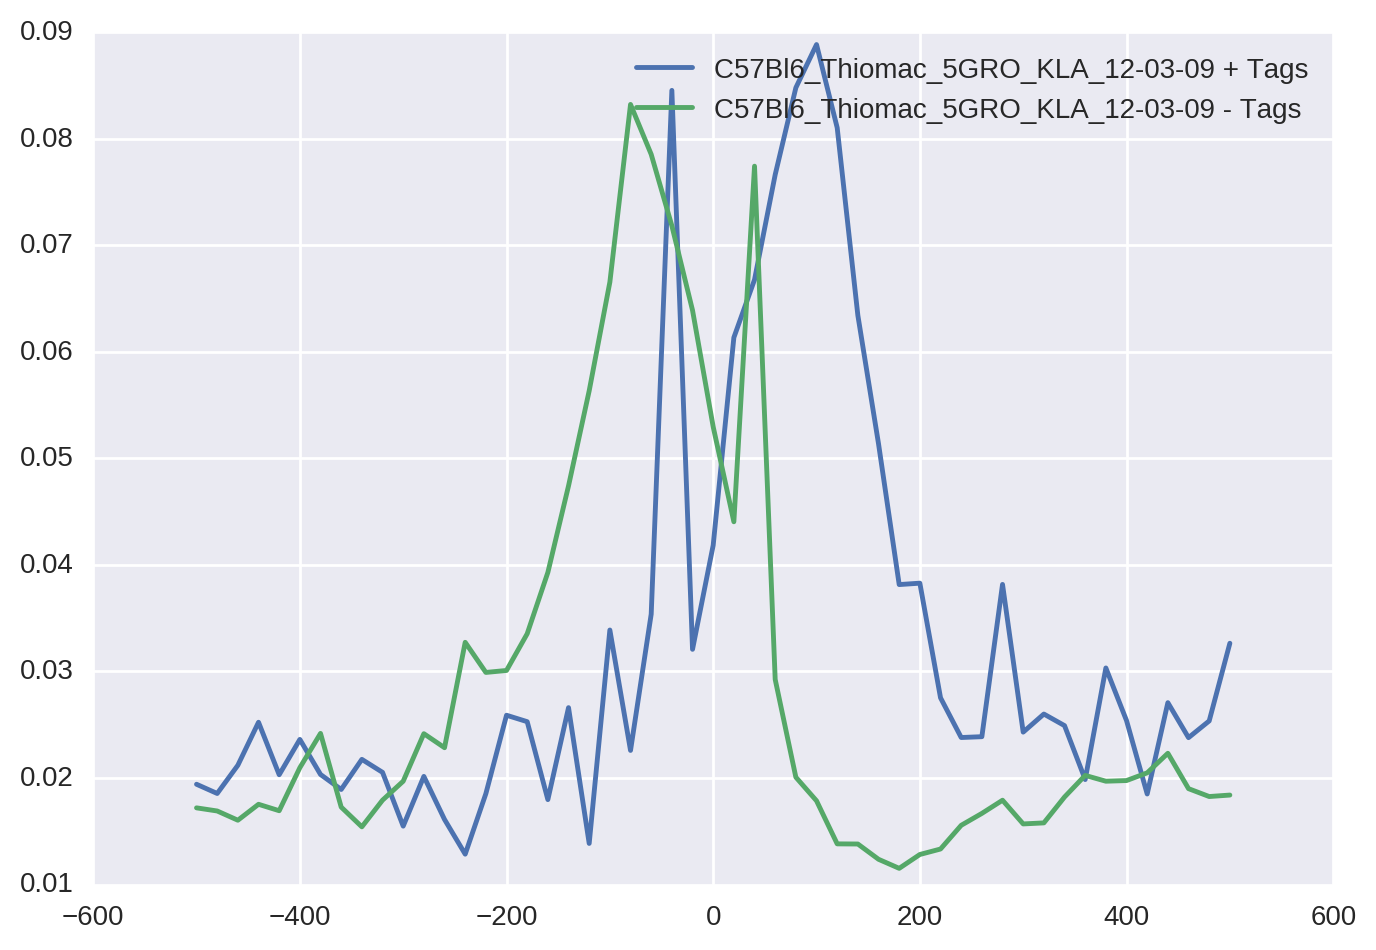

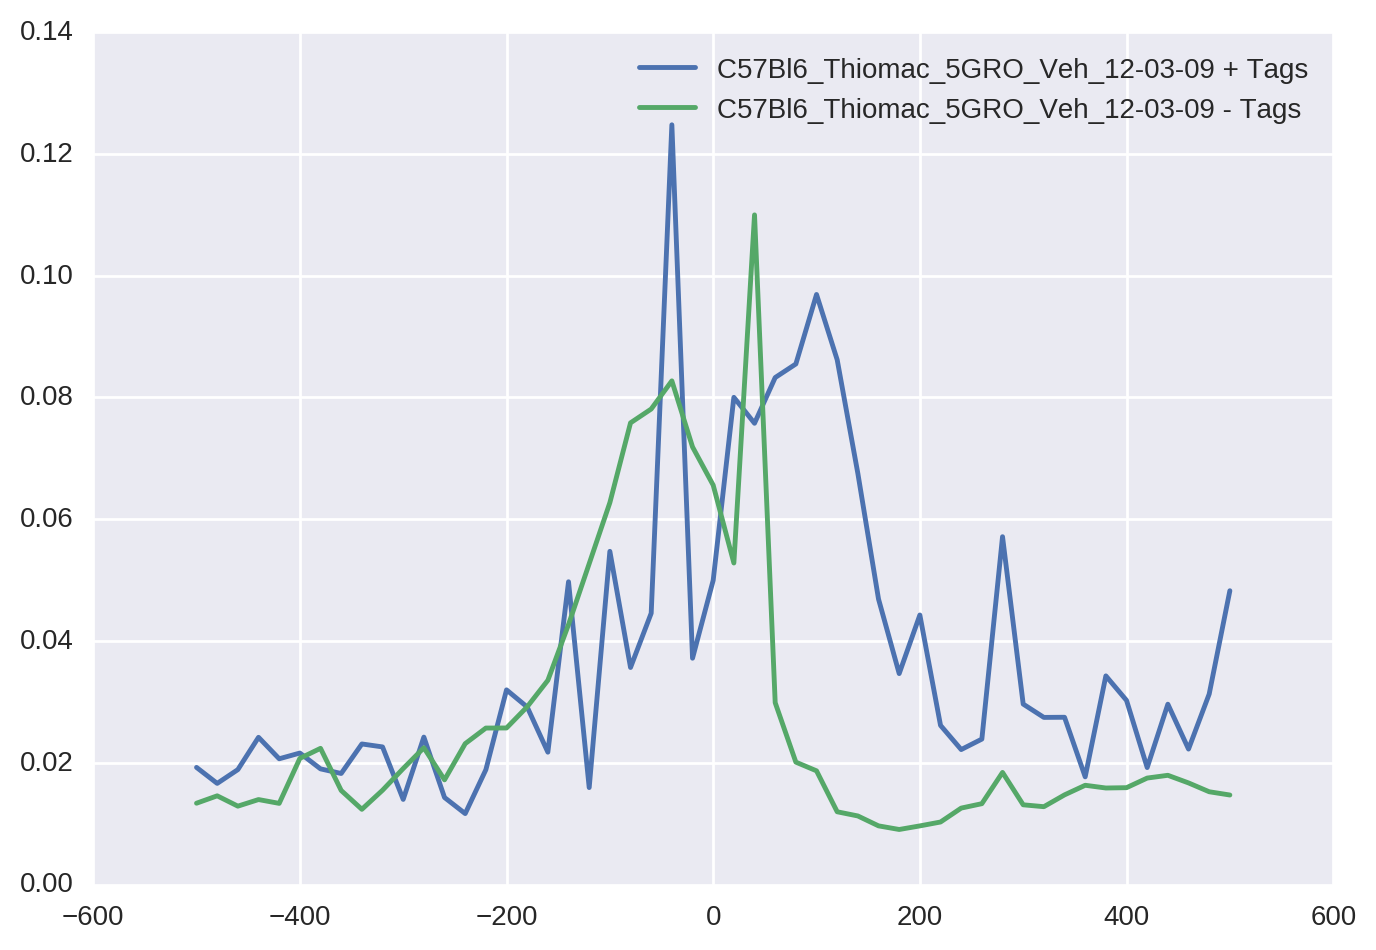

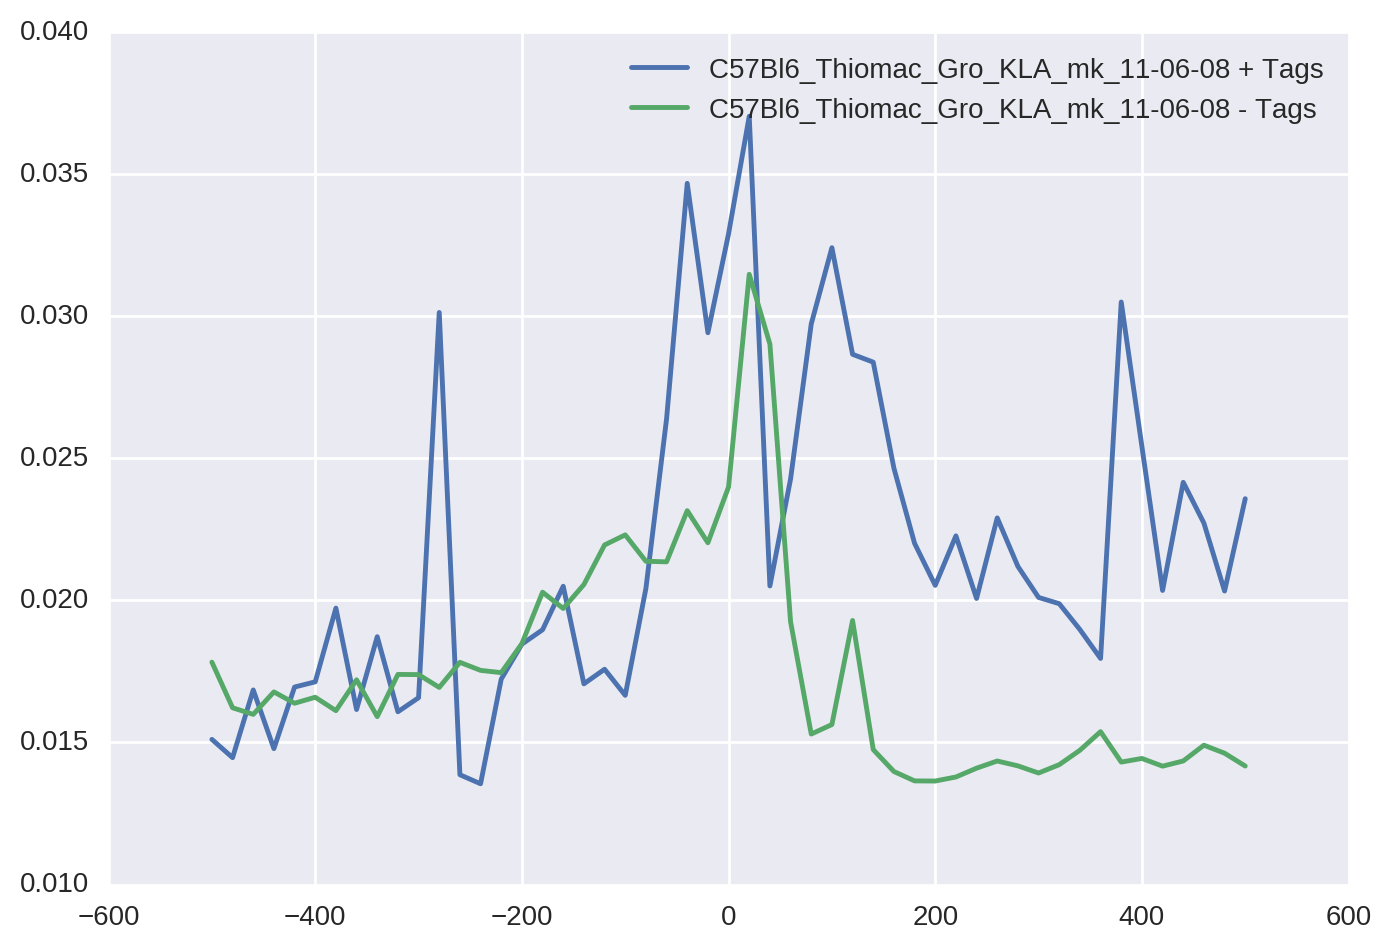

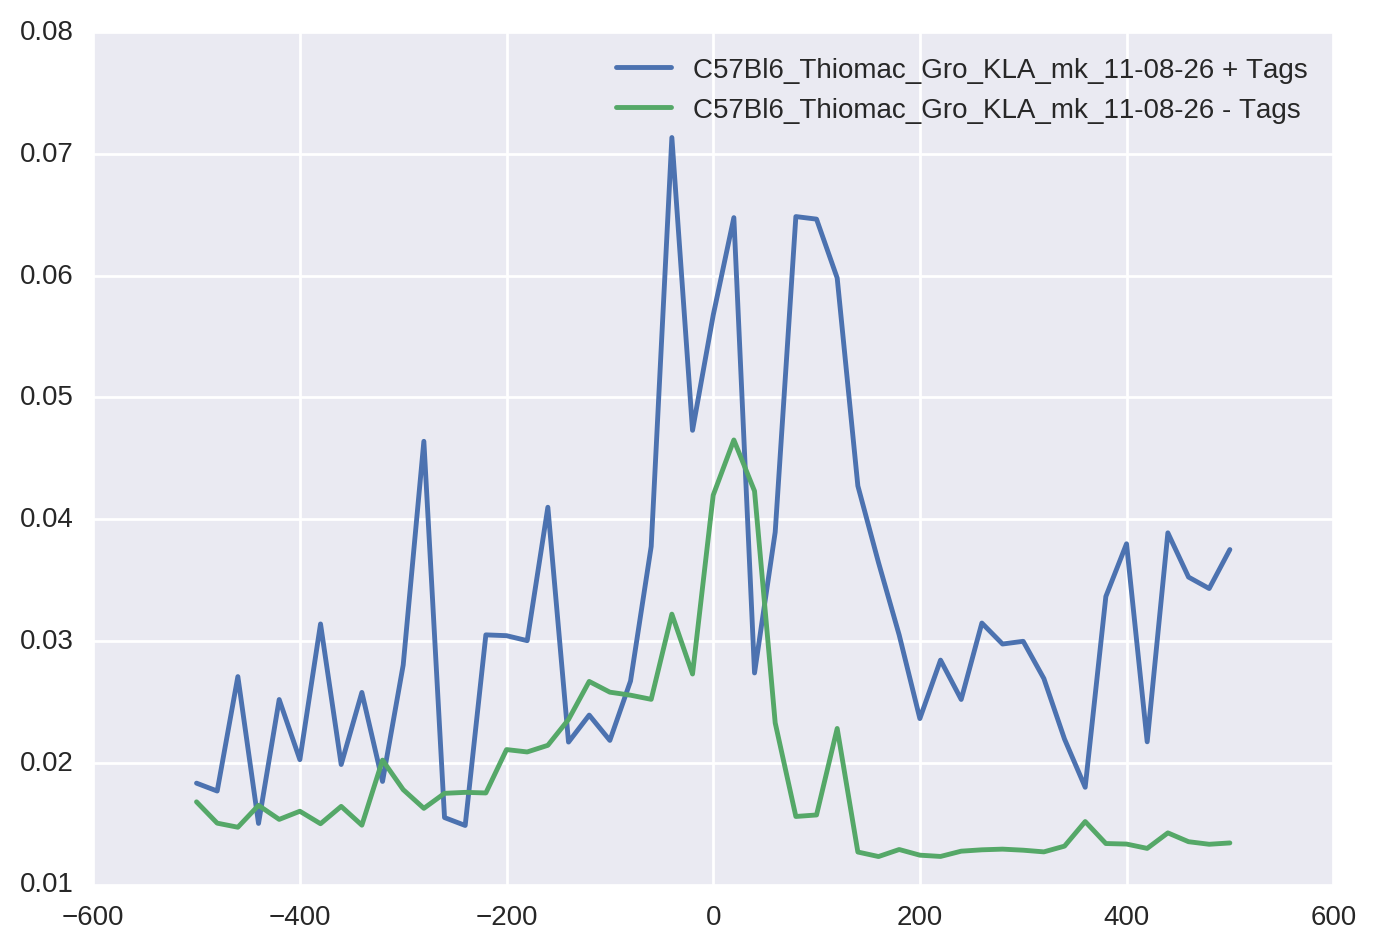

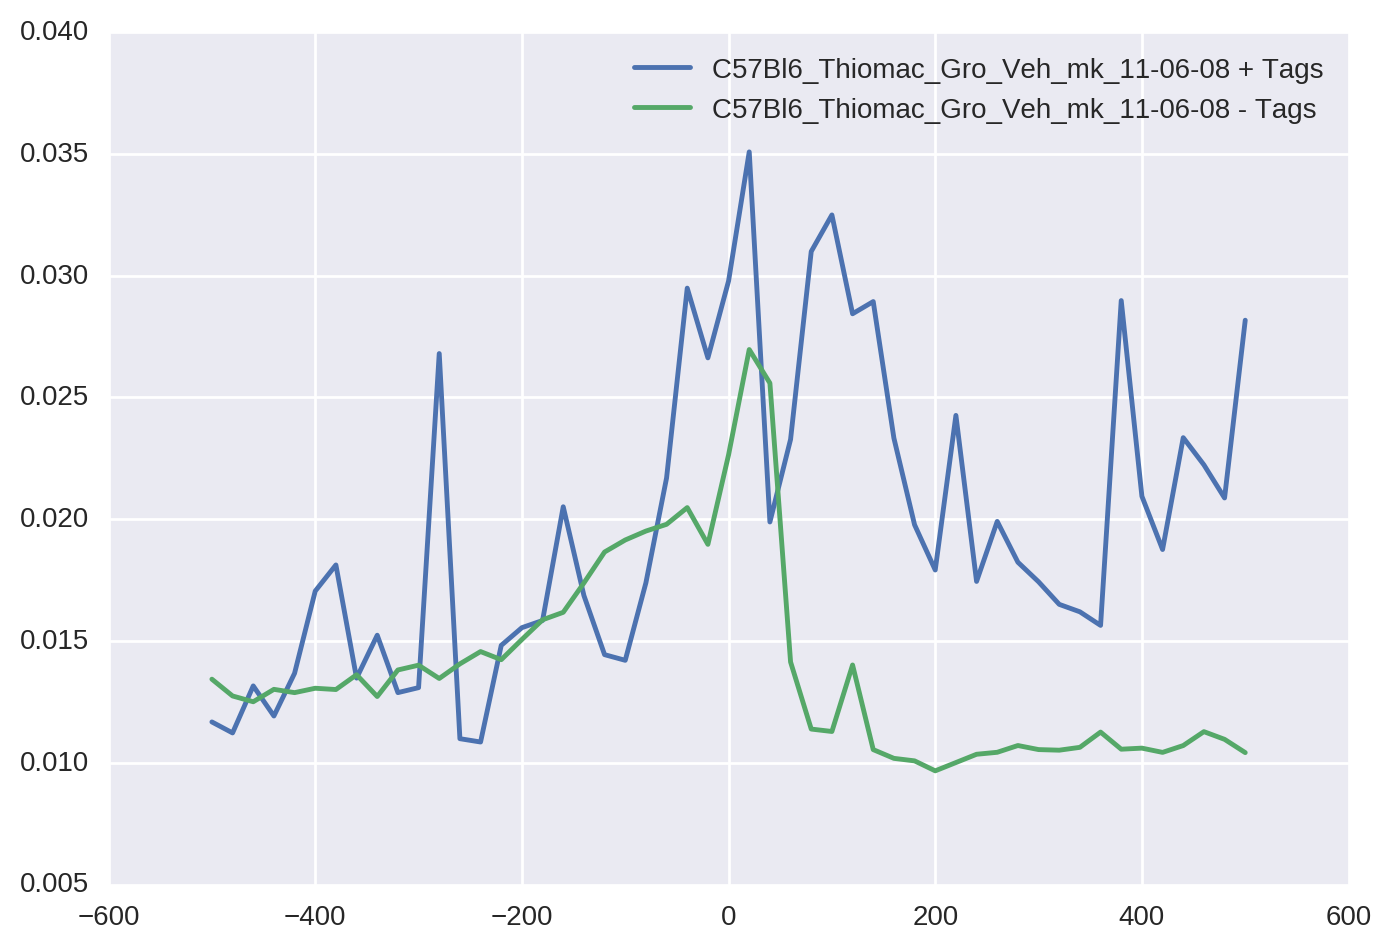

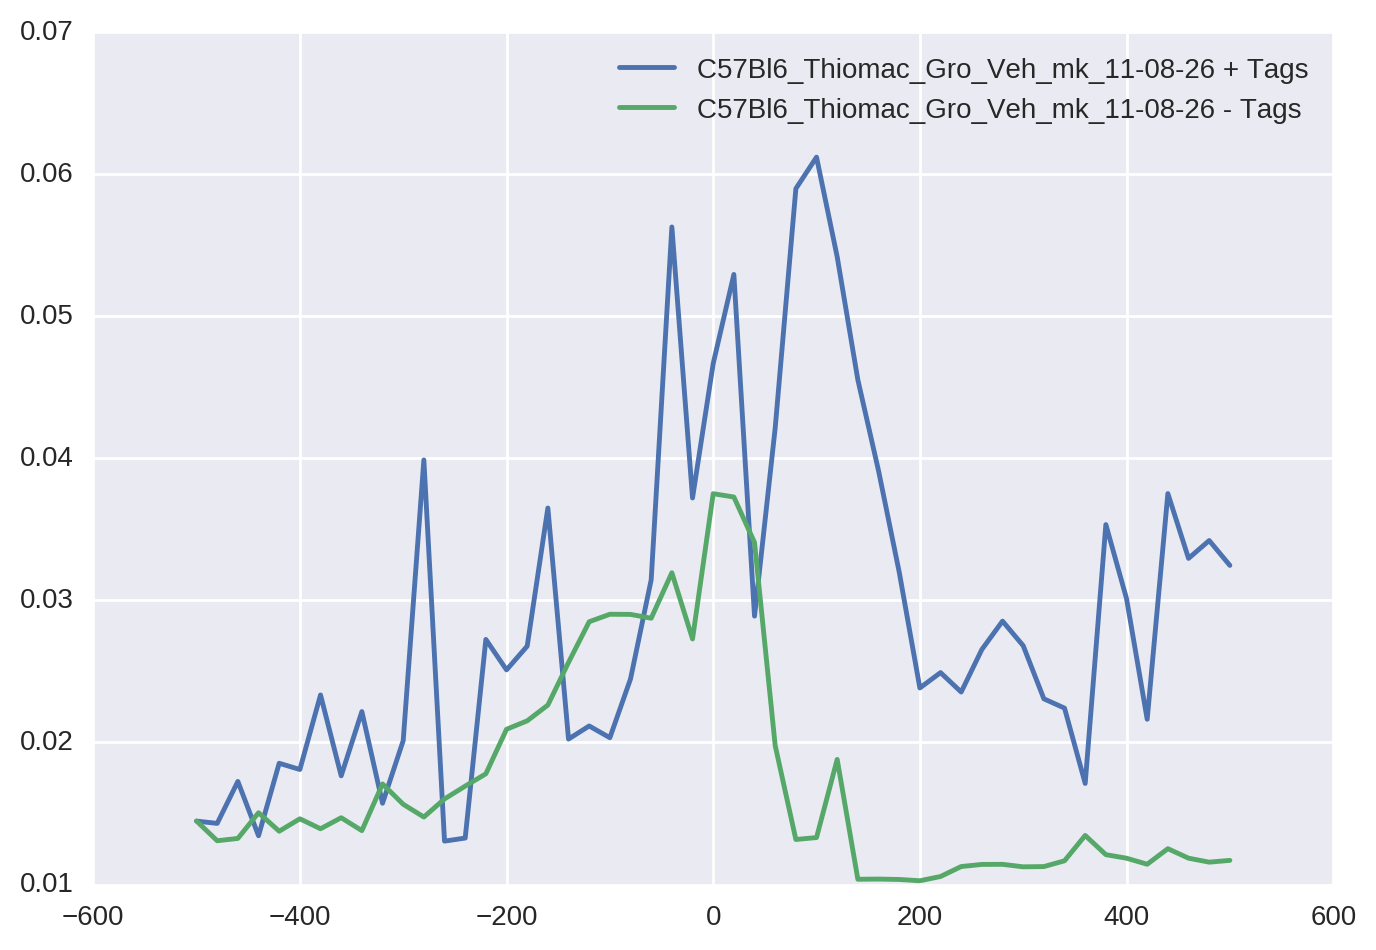

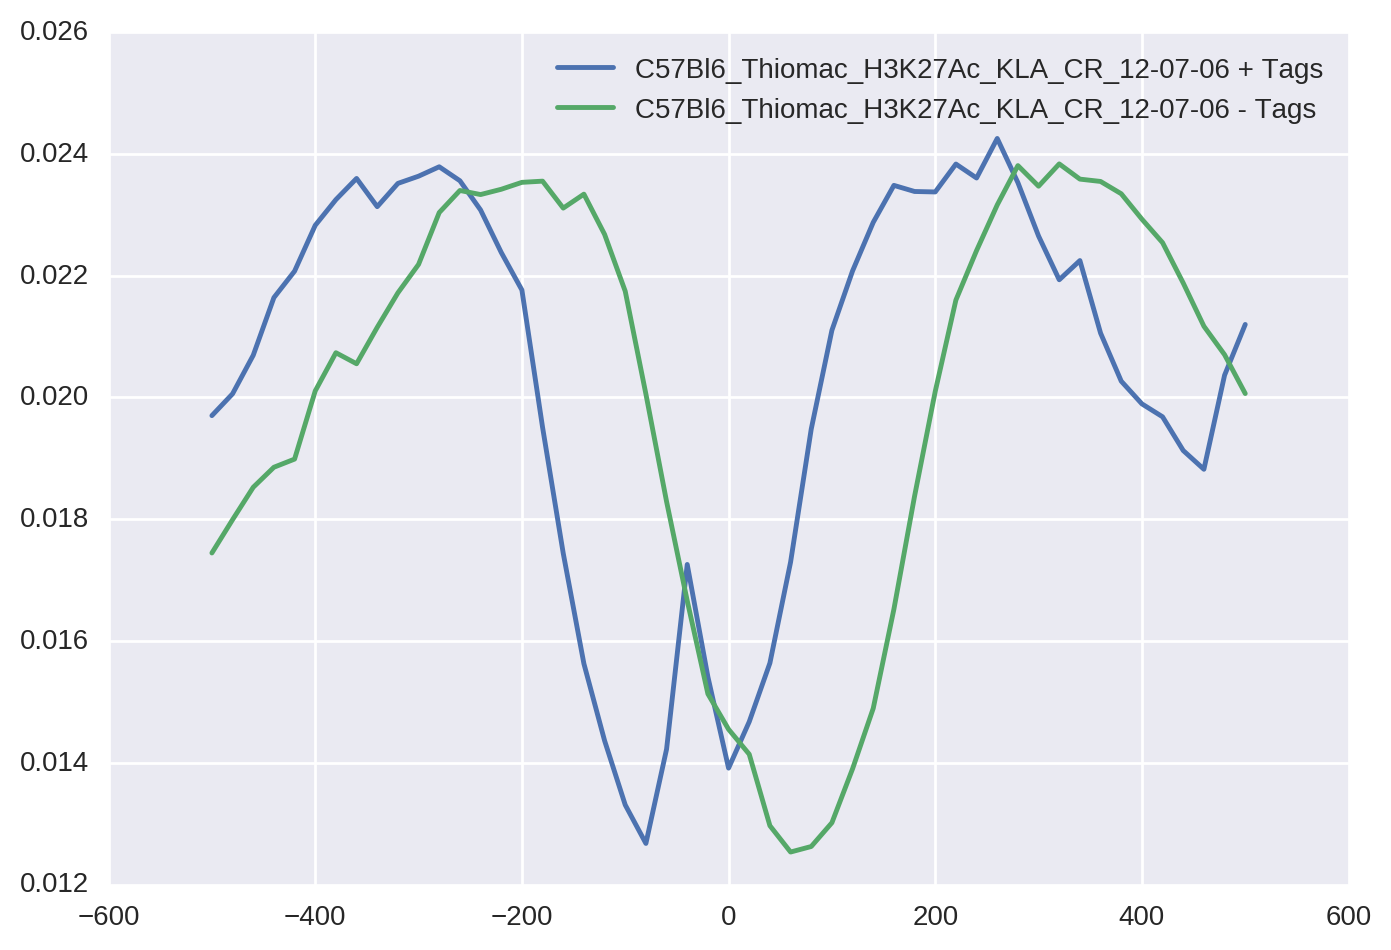

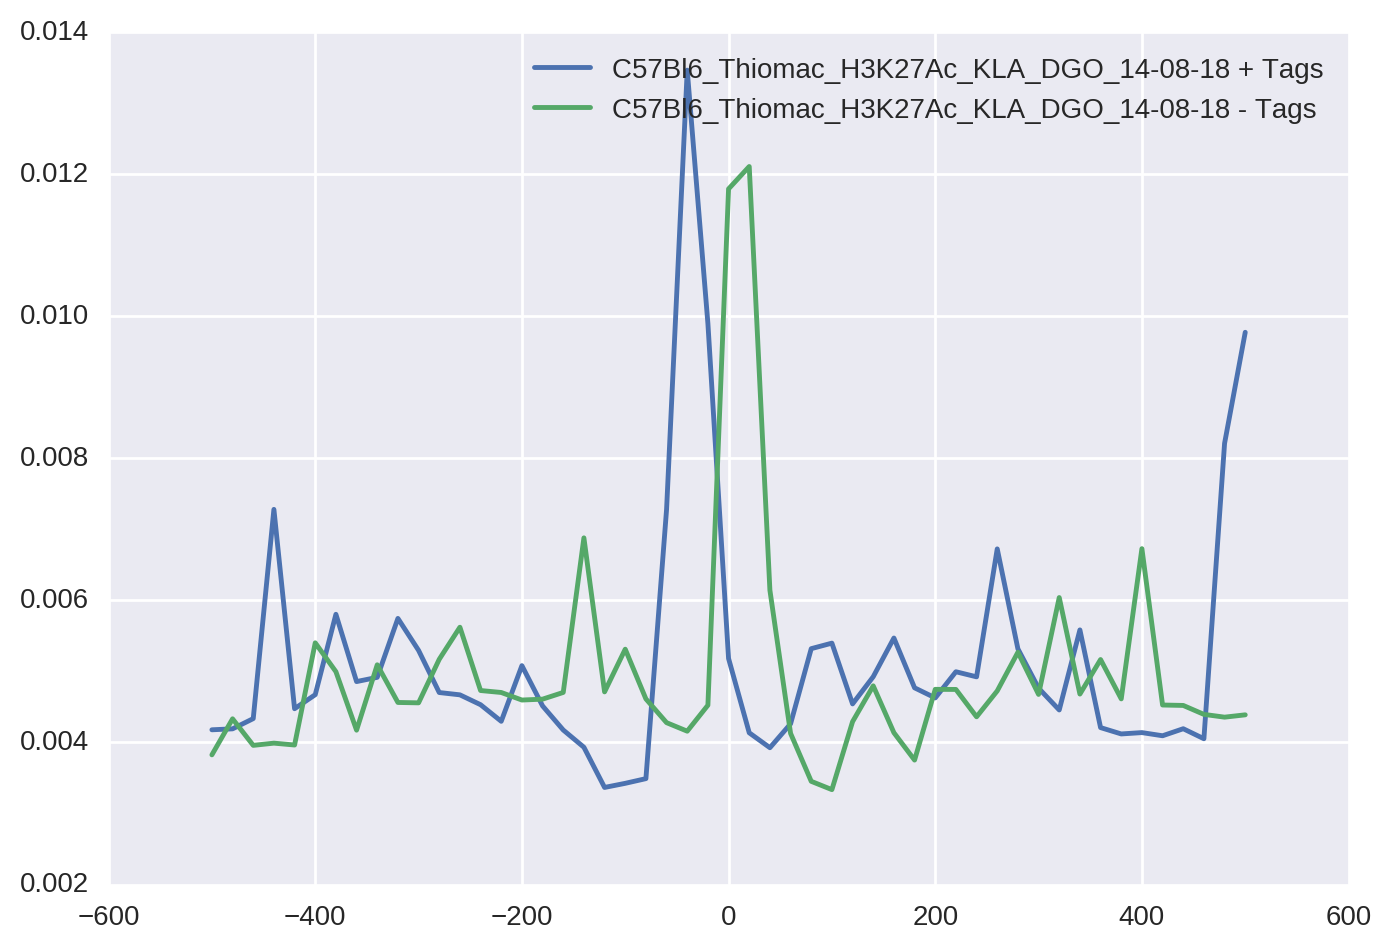

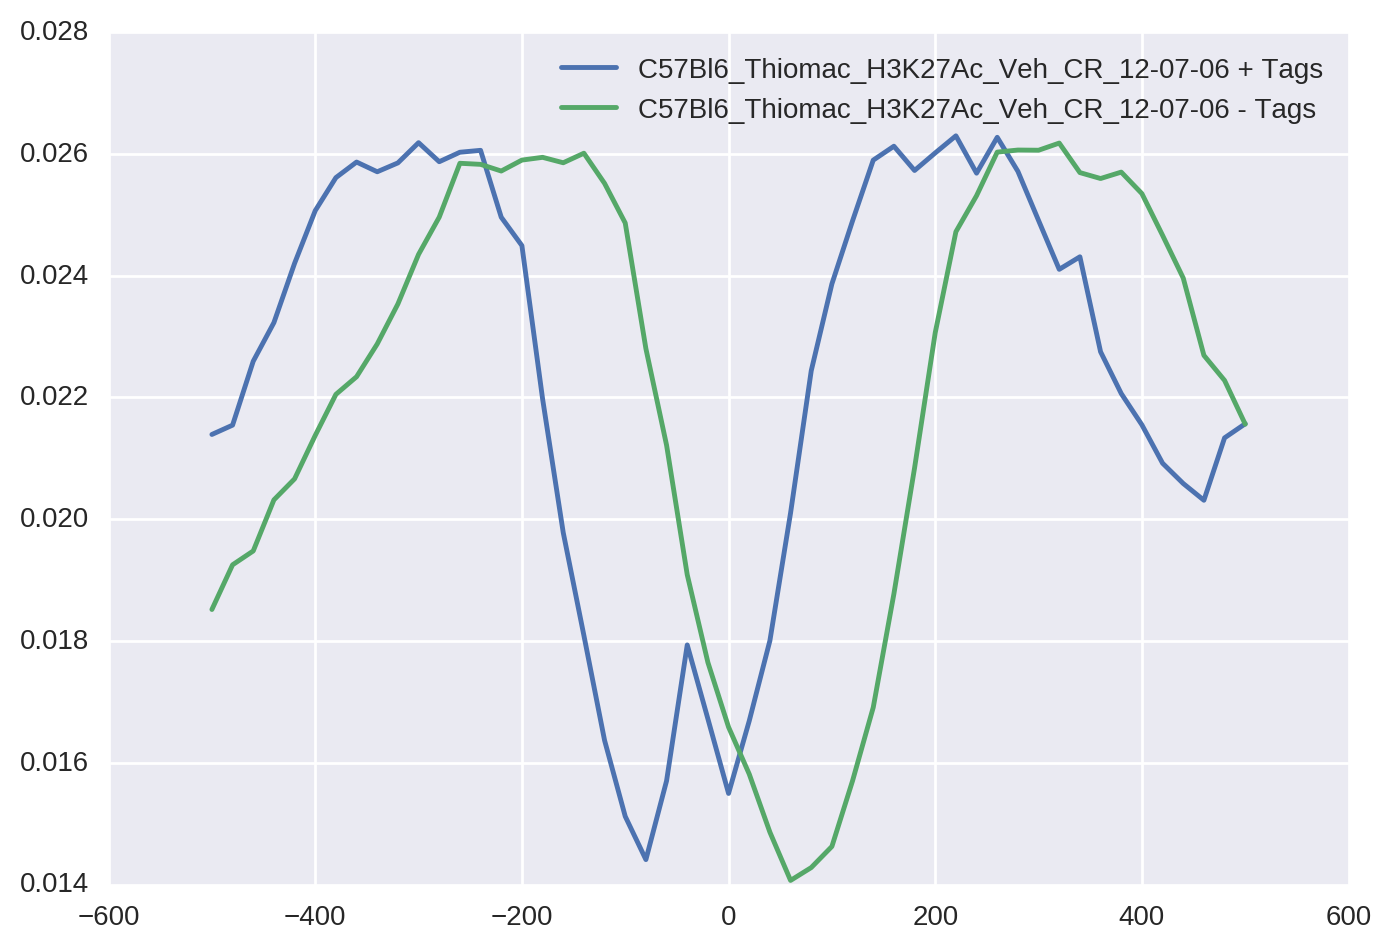

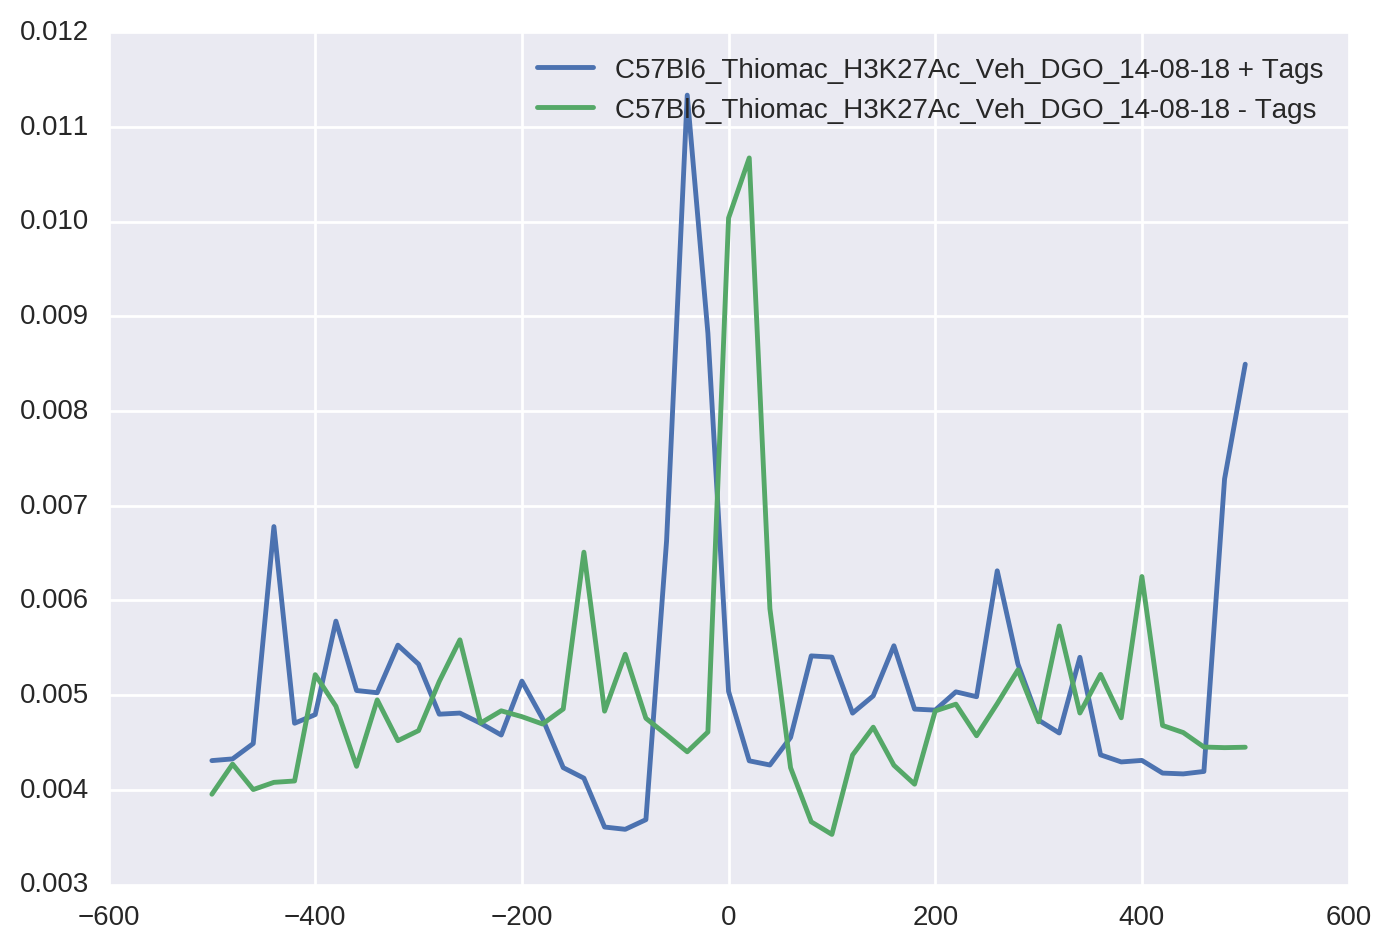

In [11]:
frame =pd.read_csv('hist.tsv',sep='\t')
columns = frame.columns.values
for i in range(int((frame.shape[1]-1)/3)):
    plt.plot(frame.ix[:,0],frame[columns[3*i+2]])
    plt.plot(frame.ix[:,0],frame[columns[3*i+3]])
    plt.legend([columns[3*i+2].split('/')[-1], columns[3*i+3].split('/')[-1]])
    plt.show()

### Retrieve sequences under peaks for finding motifs

In [12]:
%%bash
if [ ! -d ./peak_sequences ] ;
    then mkdir ./peak_sequences
else
    rm ./peak_sequences/*
fi

In [13]:
# %%capture
# # get sequences to scan for motifs

# !homerTools extract ./merged_peaks.tsv /bioinformatics/homer/data/genomes/mm10 -fa > ./peak_sequences/c57bl6.fa

In [14]:
%%bash
perl /home/vlink/mouse_strains/marge/analysis/extract_seq_from_peakfiles.pl -strains C57BL6J -file ./merged_peaks_filtered.tsv -output ./peak_sequences/C57BL6J_marge.fa
perl /home/vlink/mouse_strains/marge/analysis/extract_seq_from_peakfiles.pl -strains BALBCJ -file ./merged_peaks_filtered.tsv -output ./peak_sequences/BALBCJ_marge.fa
perl /home/vlink/mouse_strains/marge/analysis/extract_seq_from_peakfiles.pl -strains NODSHILTJ -file ./merged_peaks_filtered.tsv -output ./peak_sequences/NODSHILTJ_marge.fa




Saving peaks
Loading shift vectors
Saving peaks
Loading shift vectors
Saving peaks
Loading shift vectors


In [15]:
# reformat fastq files to use homer peak IDs

coordinate_peakID_dict = {} # {chr_start_end:homerID}
with open ('./merged_peaks_filtered.tsv') as f:
    data = f.readlines()
for line in data[1:]:
    tokens = line.split('\t')
    coordinate = '_'.join(tokens[1:4])
    peakID = tokens[0].strip()
    coordinate_peakID_dict[coordinate] = tokens[0]


In [16]:
for fastaFile in os.listdir('./peak_sequences/'):
    if 'marge' in fastaFile:
        strain = fastaFile.split('_')[0]
        outFile = open('./peak_sequences/' + fastaFile.replace('_marge',''), 'w')
        print(fastaFile)
        with open('./peak_sequences/' + fastaFile) as f:
            data = f.readlines()
        for line in data:
            if '>' in line:
                coordinate = line[1:].replace('_'+strain,'').strip()
                
                peakID = coordinate_peakID_dict[coordinate]
                outFile.write('>' + peakID + '\n')
               
            else:
                outFile.write(line)
        outFile.close()

NODSHILTJ_marge.fa
C57BL6J_marge.fa
BALBCJ_marge.fa


In [17]:
### read in sequences as dictionary {peakID: sequence}
with open('./peak_sequences/C57BL6J.fa') as f:
    data = f.readlines()

_id_sequence_dict = {}
for line in data:
    if line[0] == '>':
        sequenceName = line.strip()[1:]
    else:
        _id_sequence_dict[sequenceName] = line.strip().upper()
        

### Scan for motifs using FIMO

In [18]:
# create a script to scan for motifs using FIMO
! if [ ! -d /home/jenhan/analysis/cobinding_motif_analysis/fimo_out/ ]; then mkdir /home/jenhan/analysis/cobinding_motif_analysis/fimo_out/; fi
! rm -rf fimo_out/*
! rm -rf fimo_result/*


pthresh = 0.01
motif_dir = '/home/jenhan/analysis/cobinding_motif_analysis/fimo_motifs/'

fimo_results_dir = './fimo_results'

for fastaFile in os.listdir('./peak_sequences/'):
    if not 'marge' in fastaFile:
        print(fastaFile)
        strain = fastaFile.split('.')[0]
        count = 0
        scriptFile = open('scanMotifs_'+ strain +'.sh','w')
        for m in os.listdir(motif_dir):
            if 'fimo' in m:
                fimo_out_dir = './fimo_out/' + strain + '_' +m.replace('.fimo','')
                outPath = fimo_results_dir + '/' +strain + '_' + m.replace('.fimo','') +'.txt'
                scriptFile.write(
        #             '(sleep ' + str(15 * count) + 
                    '(sleep ' + str(0 * count) + 
                    's; fimo --text --max-stored-scores 2000000 --output-pthresh ' + 
                    str(pthresh) +' --oc ' + fimo_out_dir + ' ' +
                    motif_dir + '/' + m + ' ./peak_sequences/' + fastaFile +
                    '> ' + outPath + ' ) & \n')
                count+=1
        scriptFile.close()



BALBCJ.fa
NODSHILTJ.fa
C57BL6J.fa


In [19]:
%%bash
chmod a+x ./scanMotifs*
./scanMotifs_C57BL6J.sh
./scanMotifs_BALBCJ.sh
./scanMotifs_NODSHILTJ.sh

Reading txt file vmajor: 4, vminor: 4, vbug: 0
Reading txt file vmajor: 4, vminor: 4, vbug: 0
Using nucleotide alphabet (ACGTURYKMSWBDHVN).
Using nucleotide alphabet (ACGTURYKMSWBDHVN).
Using background frequencies from NR sequence database.
Using background frequencies from NR sequence database.
Read 1 motifs.
Read 1 motifs.
Reading txt file vmajor: 4, vminor: 4, vbug: 0
Using nucleotide alphabet (ACGTURYKMSWBDHVN).
Using background frequencies from NR sequence database.
Reading txt file vmajor: 4, vminor: 4, vbug: 0
Using nucleotide alphabet (ACGTURYKMSWBDHVN).
Using background frequencies from NR sequence database.
Read 1 motifs.
Read 1 motifs.
Using motif +gsc of width 10.
Using motif +rora of width 10.
Using motif -gsc of width 10.
Using motif -rora of width 10.
Using motif +scrt of width 13.
Using motif +spz1 of width 11.
Using motif -spz1 of width 11.
Using motif -scrt of width 13.
Reading txt file vmajor: 4, vminor: 4, vbug: 0
Using nucleotide alphabet (ACGTURYKMSWBDHVN).
Using

## Read in Score Files

### Generate main dictionaries from pickles

In [6]:
motif_score_frame=pd.read_pickle('motif_score_frame_C57BL6J.pickle')
motif_sequence_frame = pd.read_pickle('motif_sequence_frame_C57BL6J.pickle')
motif_strand_frame = pd.read_pickle('motif_strand_frame_C57BL6J.pickle')
motif_start_frame = pd.read_pickle('motif_start_frame_C57BL6J.pickle')
motif_end_frame = pd.read_pickle('motif_end_frame_C57BL6J.pickle')
# motif_count_frame = pd.read_pickle('motif_count_frame_C57BL6J.pickle')
summary_frame = pd.read_pickle('summary_frame.pickle')
annotation_frame = pd.read_pickle('annotation_frame.pickle')

# normed_motif_frame = pd.DataFrame(preprocessing.normalize(merged_motif_frame.ix[:,3:], axis=0))
scaler = preprocessing.MinMaxScaler()
normed_motif_frame = pd.DataFrame(scaler.fit_transform(motif_score_frame.ix[:,3:]))
normed_motif_frame.columns = motif_score_frame.columns.values[3:]
normed_motif_frame.index = motif_score_frame.index.values
_factors = sorted(list(set([x.split('_')[1] for x in summary_frame.columns if '_' in x])))
_factors.remove('atac')
scaler = preprocessing.MinMaxScaler()
normed_summary_frame = pd.DataFrame(scaler.fit_transform(summary_frame.ix[:,5:]))
normed_summary_frame.columns = summary_frame.columns.values[5:]
normed_summary_frame.index = summary_frame.index.values

scaled_motif_frame = pd.DataFrame()
for m in motif_score_frame.columns[3:]:
    scaled_motif_frame[m] = motif_score_frame[m]/(2*motif_sequence_frame[m].str.len().max())
    
    
# motif_interaction_frame = pd.DataFrame(
#     sklearn.preprocessing.PolynomialFeatures(
#         degree=2, interaction_only=True).fit_transform(motif_score_frame.ix[:,3:])
# ).ix[:,1:]
# motifs = motif_score_frame.columns.values[3:]
# interaction_term_columns = list(motifs)
# for i in range(len(motifs)-1):
#     for j in range(i+1,len(motifs)):
#         interaction_term_columns.append(motifs[i]+'::'+motifs[j])
# motif_interaction_frame.columns = interaction_term_columns
# motif_interaction_frame.index = motif_score_frame.index.values

# significant_motifs_dict = pickle.load( open( "significant_motifs_dict.pickle", "rb" ) )
# motif_difference_dict = pickle.load( open( "motif_difference_dict.pickle", "rb" ) )



### read in sequences as dictionary {peakID: sequence}
with open('./peak_sequences/C57BL6J.fa') as f:
    data = f.readlines()

_id_sequence_dict = {}
for line in data:
    if line[0] == '>':
        sequenceName = line.strip()[1:]
    else:
        _id_sequence_dict[sequenceName] = line.strip().upper()    

In [7]:
### work with just intergenic peaks for now ###
intergenic_ids = annotation_frame[annotation_frame['Annotation'] == 'Intergenic'].index.values
intergenic_motif_score_frame = motif_score_frame[motif_score_frame.index.isin(intergenic_ids)]
intergenic_motif_sequence_frame = motif_sequence_frame[motif_sequence_frame.index.isin(intergenic_ids)]
intergenic_motif_start_frame = motif_start_frame[motif_start_frame.index.isin(intergenic_ids)]
intergenic_motif_end_frame = motif_end_frame[motif_end_frame.index.isin(intergenic_ids)]
# intergenic_motif_count_frame = motif_count_frame[motif_count_frame.index.isin(intergenic_ids)]
intergenic_normed_motif_frame = normed_motif_frame[normed_motif_frame.index.isin(intergenic_ids)]
intergenic_scaled_motif_frame = scaled_motif_frame[scaled_motif_frame.index.isin(intergenic_ids)]
# motif_interaction_frame = motif_interaction_frame[motif_interaction_frame.index.isin(intergenic_ids)]
intergenic_summary_frame = summary_frame[summary_frame.index.isin(intergenic_ids)]
intergenic_annotation_frame = annotation_frame[annotation_frame.index.isin(intergenic_ids)]


### Read in Peak scores as floating point values

In [4]:
# read in peak data data
summary_frame = pd.read_csv('/home/jenhan/analysis/cobinding_motif_analysis/group_summary.tsv' , sep='\t')
summary_frame = summary_frame.fillna('0')
for col in summary_frame.columns[5:]:
    floatValues = []
    for val in summary_frame[col].values.astype(str):
        if ',' in val:
            maxVal = np.max([float(x) for x in val.split(',')])
            floatValues.append(maxVal)
        else:
            floatValues.append(float(val))
    summary_frame[col] = floatValues
summary_frame.index = summary_frame['ID'].values

# remove peaks in unknown/random chromosomes
summary_frame = summary_frame[~summary_frame['chr'].str.contains('random')]
summary_frame = summary_frame[~summary_frame['chr'].str.contains('Un')]


_factors = sorted(list(set([x.split('_')[1] for x in summary_frame.columns if '_' in x])))
summary_frame.to_pickle('summary_frame.pickle')
scaler = sklearn.preprocessing.MinMaxScaler()
normed_summary_frame = pd.DataFrame(scaler.fit_transform(summary_frame.ix[:,5:]))
normed_summary_frame.columns = summary_frame.columns.values[5:]
normed_summary_frame.index = summary_frame.index.values

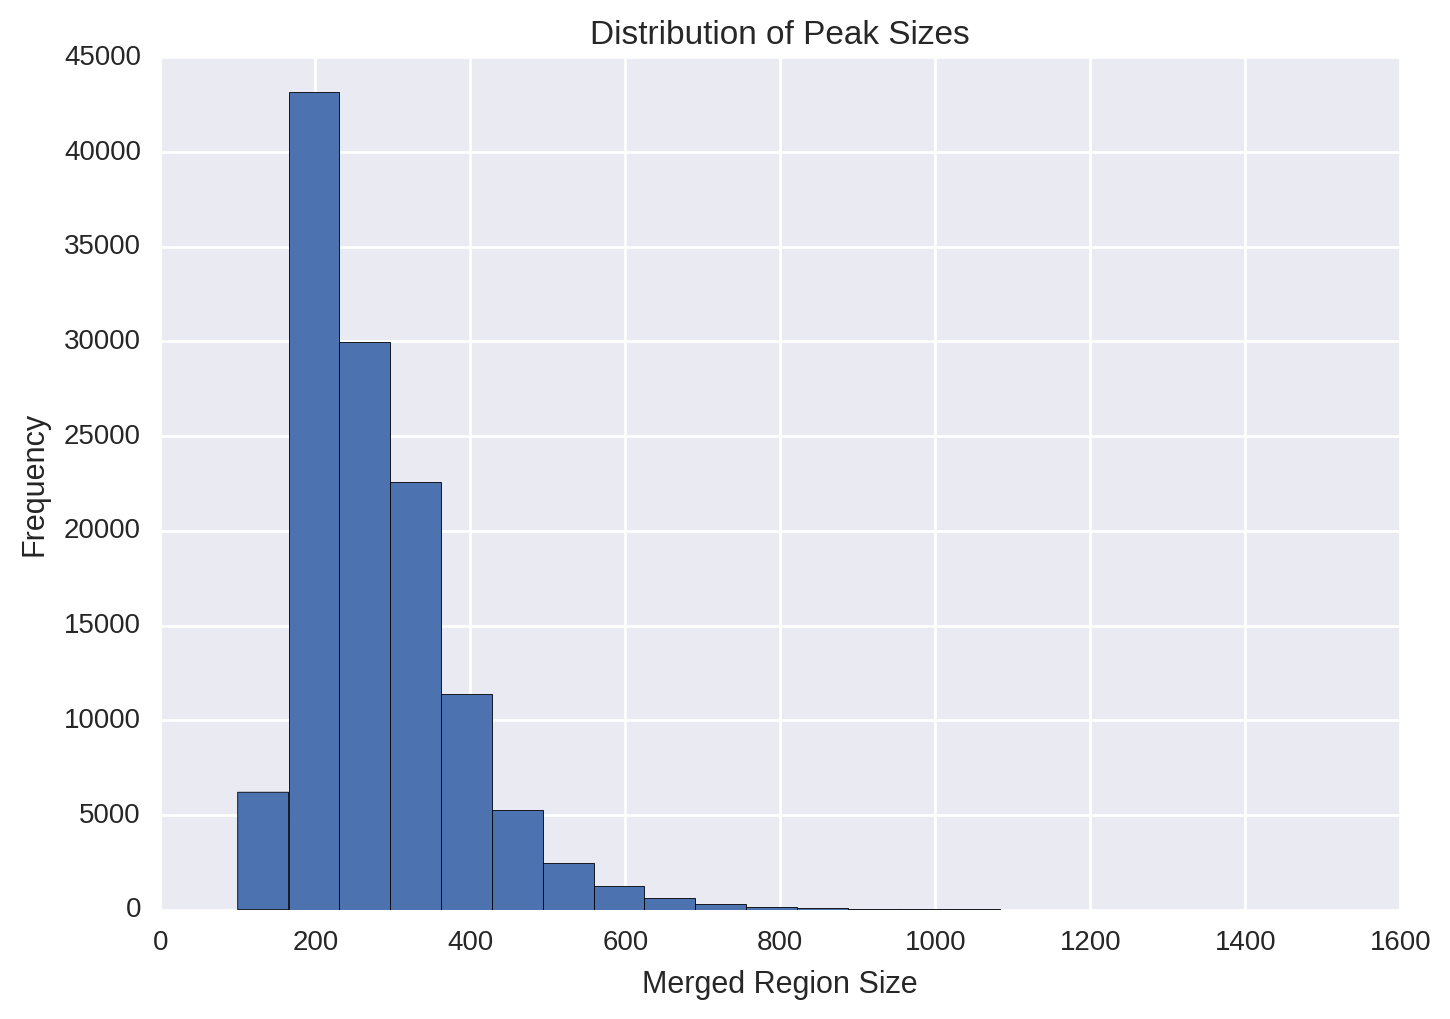

In [5]:

# plot motif positions to make sure that nothing went wrong with the merging
sizes = summary_frame['end'] - summary_frame['start']
plt.hist(sizes, bins = 20);
plt.xlabel('Merged Region Size')
plt.ylabel('Frequency')
plt.title('Distribution of Peak Sizes')

### Read in Enhancer Marks

5GRO_KLA
5GRO_Veh
Gro_KLA
Gro_Veh
H3K27Ac_KLA
H3K27Ac_Veh

/bioinformatics/software/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:62: SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame
/bioinformatics/software/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:63: SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame


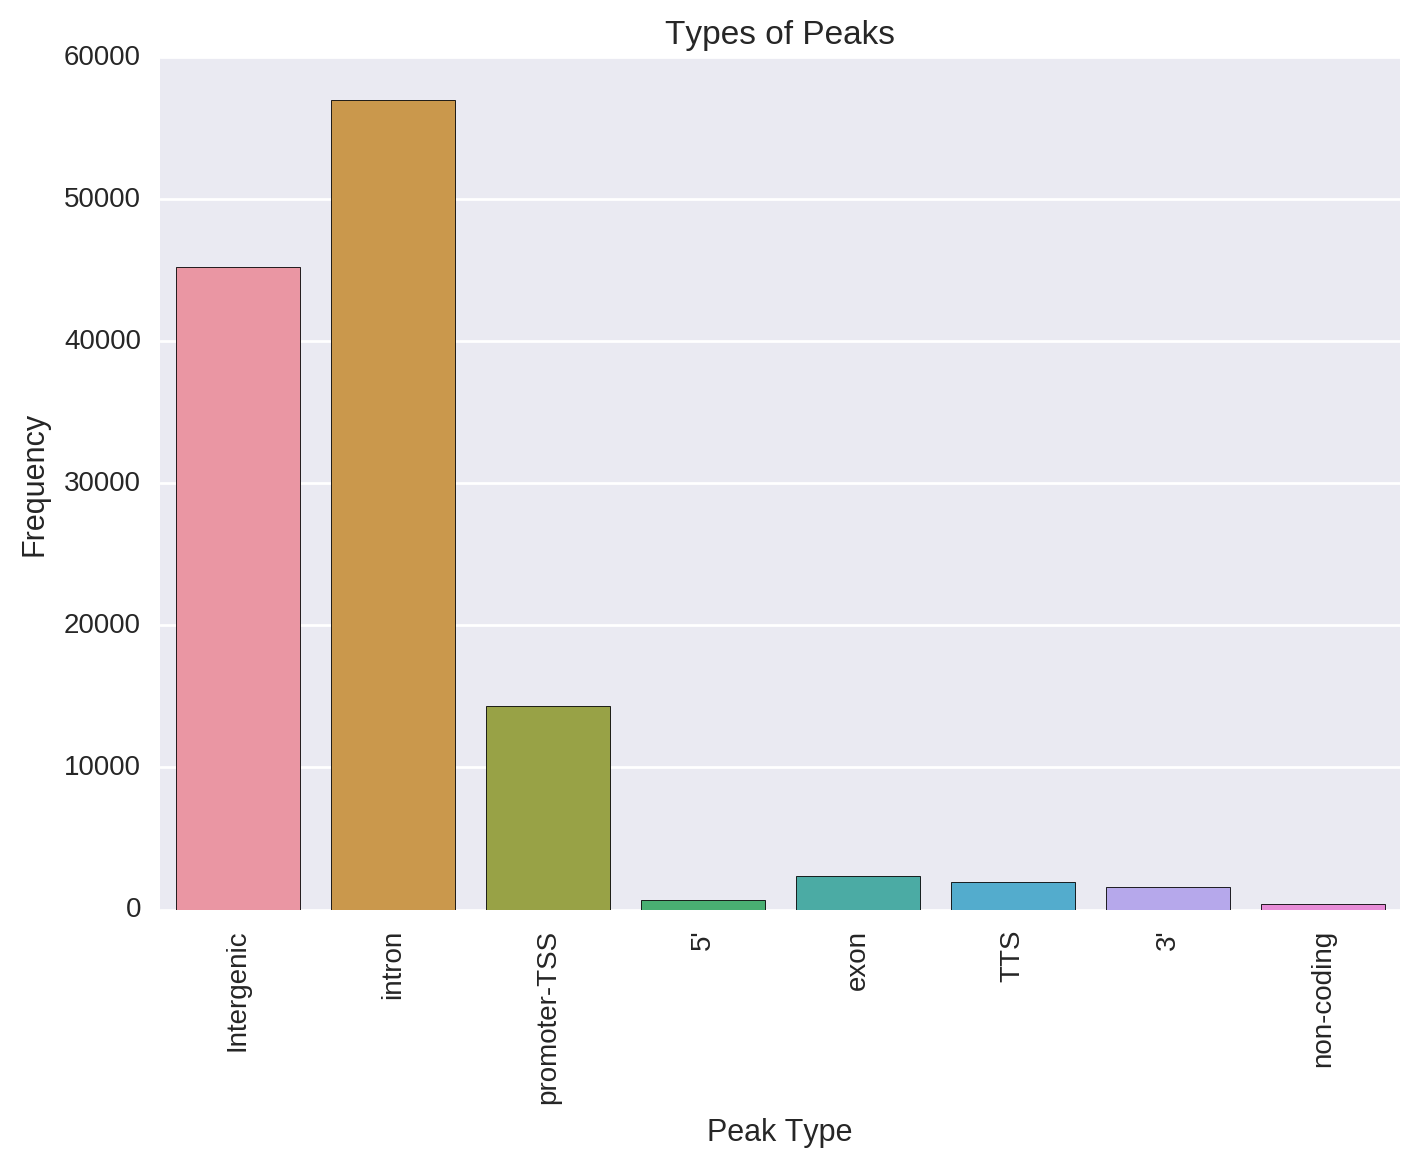

In [22]:
### read in GRO and H3K27Ac scores

sense_frame = pd.read_csv('merged_annotated_peaks_sense.tsv', sep='\t')

antisense_frame = pd.read_csv('merged_annotated_peaks_antisense.tsv', sep='\t')

sense_frame.index=sense_frame.ix[:,0].values
columns = sense_frame.columns.values
columns[0] = 'ID'
columns = [x.split('/')[-1].split()[0] if '/' in x else x for x in columns]
sense_frame.columns = columns

antisense_frame.index=antisense_frame.ix[:,0].values
columns = antisense_frame.columns.values
columns[0] = 'ID'
columns = [x.split('/')[-1].split()[0] if '/' in x else x for x in columns]
antisense_frame.columns = columns

tagDirectories = sense_frame.columns[19:].values
experiment_tagDir_dict = {}
for td in tagDirectories:
    tokens = td.split('_')
    experiment = '_'.join(tokens[2:4])
    if experiment in experiment_tagDir_dict:
        experiment_tagDir_dict[experiment].append(td)
    else:
        experiment_tagDir_dict[experiment] = [td]

_enhancerMarks = sorted(experiment_tagDir_dict.keys())

annotation_frame = sense_frame[['Chr', 'Start', 'End', 'Strand']]
annotation_frame['Annotation'] = [str(x).split()[0] for x in sense_frame['Annotation'].values]

for experiment in _enhancerMarks:
    current_sense_frame = sense_frame[experiment_tagDir_dict[experiment]]
    current_antisense_frame = antisense_frame[experiment_tagDir_dict[experiment]]


    annotation_frame[experiment + ' +'] = np.mean(current_sense_frame, axis=1)
    annotation_frame[experiment + ' -'] = np.mean(current_antisense_frame, axis=1)
    print(experiment)

#     log_frame = np.log2(current_sense_frame+1)
#     log_frame.columns = [x + ' +' for x in log_frame.columns.values]
#     sns.pairplot(log_frame, size=7, kind= 'reg')
#     plt.savefig(experiment+'_sense_pairplot.png')
#     plt.close()
# #     plt.show()
    
#     log_frame = np.log2(current_antisense_frame+1)
#     log_frame.columns = [x + ' -' for x in log_frame.columns.values]
#     sns.pairplot(log_frame, size=7, kind= 'reg')
#     plt.savefig(experiment+'_antisense_pairplot.png')
#     plt.close()
# #     plt.show()
    


nonStrandSpecificExperiments = ['H3K27Ac_KLA', 'H3K27Ac_Veh']
for experiment in nonStrandSpecificExperiments:
    annotation_frame[experiment] = annotation_frame[experiment + ' +'] + annotation_frame[experiment + ' -']
    annotation_frame.drop(experiment + ' +', axis=1, inplace=True)
    annotation_frame.drop(experiment + ' -', axis=1, inplace=True)
    
# remove outlier GRO-seq values
# annotation_frame.loc[annotation_frame['Gro_Veh +'] > 10000, 'Gro_Veh +' ] = 0
# annotation_frame.loc[annotation_frame['Gro_KLA +'] > 10000, 'Gro_KLA +' ] = 0
# annotation_frame.loc[annotation_frame['Gro_Veh -'] > 10000, 'Gro_Veh -' ] = 0
# annotation_frame.loc[annotation_frame['Gro_KLA -'] > 10000, 'Gro_KLA -' ] = 0


sns.countplot(annotation_frame['Annotation'])
plt.title('Types of Peaks')
plt.xlabel('Peak Type')
plt.ylabel('Frequency')
plt.xticks(rotation=90);

annotation_frame.to_pickle('annotation_frame.pickle')


## Classifying Enhancers

In [ ]:
sns.distplot(np.log2(annotation_frame['Gro_Veh -']+1))
plt.show()
sns.distplot(np.log2(annotation_frame['Gro_Veh +']+1))
plt.show()
sns.distplot(np.log2(annotation_frame['Gro_KLA -']+1))
plt.show()
sns.distplot(np.log2(annotation_frame['Gro_KLA +']+1))
plt.show()
sns.distplot(np.log2(annotation_frame['H3K27Ac_KLA']+1))
plt.show()
sns.distplot(np.log2(annotation_frame['H3K27Ac_Veh']+1))
plt.show()

In [ ]:
numClusters = 3
intergenic_ids = annotation_frame[annotation_frame['Annotation'] == 'Intergenic'].index.values
features = annotation_frame[[x for x in annotation_frame.columns.values if 'KLA' in x and not 'Active' in x]]
features = features[features.index.isin(intergenic_ids)]
scaler = preprocessing.MinMaxScaler()
normed_features = pd.DataFrame(scaler.fit_transform(np.log2(features + 1)))
normed_features.columns = features.columns
colorDict = dict(zip(range(numClusters+1),sns.color_palette("Set1") + sns.color_palette("Set2") + sns.color_palette("colorblind")))

cg = sns.clustermap(normed_features,yticklabels=False, col_cluster=False)
plt.close()
row_linkage = cg.dendrogram_row.linkage
            
row_flatCluster = scipy.cluster.hierarchy.fcluster(row_linkage, numClusters, criterion="maxclust")
            
row_colors = [colorDict[row_flatCluster[i]] for i in range(len(cg.data.index))]
sns.clustermap(normed_features,
             row_linkage = row_linkage,
             row_colors = row_colors,
             col_cluster=False,
             cmap="Blues",
             yticklabels = False
             )

In [ ]:
numClusters = 3
intergenic_ids = annotation_frame[annotation_frame['Annotation'] == 'Intergenic'].index.values
features = annotation_frame[[x for x in annotation_frame.columns.values if 'Veh' in x and not 'Active' in x]]
features = features[features.index.isin(intergenic_ids)]
scaler = preprocessing.MinMaxScaler()
normed_features = pd.DataFrame(scaler.fit_transform(np.log2(features + 1)))
normed_features.columns = features.columns
colorDict = dict(zip(range(numClusters+1),sns.color_palette("Set1") + sns.color_palette("Set2") + sns.color_palette("colorblind")))

cg = sns.clustermap(normed_features,yticklabels=False, col_cluster=False)
plt.close()
row_linkage = cg.dendrogram_row.linkage
            
row_flatCluster = scipy.cluster.hierarchy.fcluster(row_linkage, numClusters, criterion="maxclust")
            
row_colors = [colorDict[row_flatCluster[i]] for i in range(len(cg.data.index))]
sns.clustermap(normed_features,
             row_linkage = row_linkage,
             row_colors = row_colors,
             col_cluster=False,
             cmap="Blues",
             yticklabels = False
             )

In [ ]:
### Assign active versus inactive for KLA enhancers ###
numColors = 20
colorDict = dict(zip(range(numColors),sns.color_palette("Set2") + sns.color_palette("colorblind")))

# calculate k-means cluster for use in coloring
intergenic_ids = annotation_frame[annotation_frame['Annotation'] == 'Intergenic'].index.values
features = annotation_frame[[x for x in annotation_frame.columns.values if 'KLA ' in x]]
features = features[features.index.isin(intergenic_ids)]
normed_features = np.log2(features + 1)

print(features.shape)
# normed_features = sklearn.preprocessing.normalize(features, axis=1)
est = KMeans(n_clusters=2, n_jobs=4)
est.fit(normed_features)
colors = [colorDict[x] for x in est.labels_]

sns.jointplot(normed_features['Gro_KLA +'],
           normed_features['Gro_KLA -'],
           alpha=0.4, c=colors)


# sns.jointplot(normed_features['Gro_KLA +'],
#            normed_features['H3K27Ac_KLA'],
#            alpha=0.4, c=colors)


# sns.jointplot(normed_features['Gro_KLA -'],
#            normed_features['H3K27Ac_KLA'],
#            alpha=0.4, c=colors)


clusters = []
indices = []
reads = []
factor = []
treatments = []
index_cluster_tuples = tuple(zip(normed_features.index.values, est.labels_))
for cluster in sorted(set(est.labels_)):
    current_indices = [x[0] for x in index_cluster_tuples if x[1] == cluster]
    gro_kla_sense = list(annotation_frame[annotation_frame.index.isin(current_indices)]['Gro_KLA +'].values)
    gro_kla_antisense = list(annotation_frame[annotation_frame.index.isin(current_indices)]['Gro_KLA -'].values)
    h3k27ac_kla = list(annotation_frame[annotation_frame.index.isin(current_indices)]['H3K27Ac_KLA'].values)
   
        
    reads = reads + gro_kla_sense
    treatments = treatments + len(current_indices) * ['Gro +'] 
        
    reads = reads + gro_kla_antisense
        
    treatments = treatments + len(current_indices) * ['Gro -'] 
        
    reads = reads + h3k27ac_kla

    treatments = treatments + len(current_indices) * ['H3K27Ac']

    clusters = clusters + 3 * len(current_indices) * [str(cluster)]
        
reads = np.log2(np.array(reads) + 1)
data_frame = pd.DataFrame({'reads': reads, 
                          'treatment':treatments,
                          'cluster':clusters})
print('cluster 0:',np.sum(data_frame['cluster']=='0')/3,
     'cluster 1:',np.sum(data_frame['cluster']=='1')/3)
sns.factorplot(x='cluster',y='reads', hue='treatment', 
                data= data_frame, 
                kind='box',
                size=10,
                width=0.4,
                whis=1,
                showfliers=False)
# plt.ylim([0,12])
plt.show()

### assign activity according to the mean H3K27Ac value of each cluster ###
cluster_mean_0 = np.mean(data_frame[(data_frame['cluster']=='0') & (data_frame['treatment']=='H3K27Ac')]['reads'])
cluster_mean_1 = np.mean(data_frame[(data_frame['cluster']=='1') & (data_frame['treatment']=='H3K27Ac')]['reads'])
if cluster_mean_0 < cluster_mean_1:
    # cluster 1 is considered the active cluster
    index_activity_dict = dict(zip(normed_features.index.values,
                                     [True if x == 1 else False for x in est.labels_]))
else:
    # cluster 0 is considered the active cluster
    index_activity_dict = dict(zip(normed_features.index.values,
                                     [True if x == 0 else False for x in est.labels_]))
annotation_frame['Active Enhancer KLA'] = [index_activity_dict[x] for x in annotation_frame.index.values]


In [ ]:
### Assign active versus inactive for VEH enhancers ###
numColors = 20
colorDict = dict(zip(range(numColors),sns.color_palette("Set2") + sns.color_palette("colorblind")))

# calculate k-means cluster for use in coloring
intergenic_ids = annotation_frame[annotation_frame['Annotation'] == 'Intergenic'].index.values
features = annotation_frame[[x for x in annotation_frame.columns.values if 'Veh ' in x]]
features = features[features.index.isin(intergenic_ids)]
normed_features = np.log2(features + 1)

print(features.shape)
# normed_features = sklearn.preprocessing.normalize(features, axis=1)
est = KMeans(n_clusters=2, n_jobs=4)
est.fit(normed_features)
colors = [colorDict[x] for x in est.labels_]

sns.jointplot(normed_features['Gro_Veh +'],
           normed_features['Gro_Veh -'],
           alpha=0.4, c=colors)


# sns.jointplot(normed_features['Gro_Veh +'],
#            normed_features['H3K27Ac_Veh'],
#            alpha=0.4, c=colors)


# sns.jointplot(normed_features['Gro_Veh -'],
#            normed_features['H3K27Ac_Veh'],
#            alpha=0.4, c=colors)


clusters = []
indices = []
reads = []
factor = []
treatments = []
index_cluster_tuples = tuple(zip(normed_features.index.values, est.labels_))
for cluster in sorted(set(est.labels_)):
    current_indices = [x[0] for x in index_cluster_tuples if x[1] == cluster]
    gro_veh_sense = list(annotation_frame[annotation_frame.index.isin(current_indices)]['Gro_Veh +'].values)
    gro_veh_antisense = list(annotation_frame[annotation_frame.index.isin(current_indices)]['Gro_Veh -'].values)
    h3k27ac_veh = list(annotation_frame[annotation_frame.index.isin(current_indices)]['H3K27Ac_Veh'].values)
   
    
    reads = reads + gro_veh_sense
    treatments = treatments + len(current_indices) * ['Gro +']
    
    reads = reads + gro_veh_antisense
        
    treatments = treatments + len(current_indices) * ['Gro -']
    
    reads = reads + h3k27ac_veh

    treatments = treatments + len(current_indices) * ['H3K27Ac']

    clusters = clusters + 3 * len(current_indices) * [str(cluster)]
    
reads = np.log2(np.array(reads) + 1)
data_frame = pd.DataFrame({'reads': reads, 
                          'treatment':treatments,
                          'cluster':clusters})
print('cluster 0:',np.sum(data_frame['cluster']=='0')/3,
     'cluster 1:',np.sum(data_frame['cluster']=='1')/3)
sns.factorplot(x='cluster',y='reads', hue='treatment', 
                data= data_frame, 
                kind='box',
                size=10,
                width=0.4,
                whis=1,
                showfliers=False)
# plt.ylim([0,12])
plt.show()

### assign activity according to the mean H3K27Ac value of each cluster ###
cluster_mean_0 = np.mean(data_frame[(data_frame['cluster']=='0') & (data_frame['treatment']=='H3K27Ac')]['reads'])
cluster_mean_1 = np.mean(data_frame[(data_frame['cluster']=='1') & (data_frame['treatment']=='H3K27Ac')]['reads'])
if cluster_mean_0 < cluster_mean_1:
    # cluster 1 is considered the active cluster
    index_activity_dict = dict(zip(normed_features.index.values, 
                                     [True if x == 1 else False for x in est.labels_]))
else:
    # cluster 0 is considered the active cluster
    index_activity_dict = dict(zip(normed_features.index.values, 
                                     [True if x == 0 else False for x in est.labels_]))
annotation_frame['Active Enhancer Veh'] = [index_activity_dict[x] for x in annotation_frame.index.values]

### Read in motif scores

In [ ]:
motif_dir = '/home/jenhan/analysis/cobinding_motif_analysis/fimo_motifs/'
# motif_dir = '/home/jenhan/analysis/cobinding_motif_analysis/fimo_motifs_jaspar_2014/'


for fastaFile in os.listdir('./peak_sequences/'):
    if not 'marge' in fastaFile:
        print(fastaFile)
        strain = fastaFile.split('.')[0]

        peak_start_dict = dict(zip(summary_frame['ID'].values, summary_frame['start'].values))

        motif_score_frame = summary_frame[['ID', 'Factors', 'chr']]
        motif_score_frame.index=motif_score_frame['ID'].values

        motif_sequence_frame = summary_frame[['ID', 'Factors', 'chr']]
        motif_sequence_frame.index=motif_score_frame['ID'].values

        motif_strand_frame = summary_frame[['ID', 'Factors', 'chr']]
        motif_strand_frame.index=motif_score_frame['ID'].values

        motif_start_frame = summary_frame[['ID', 'Factors', 'chr']]
        motif_start_frame.index=motif_score_frame['ID'].values

        motif_end_frame = summary_frame[['ID', 'Factors', 'chr']]
        motif_end_frame.index=motif_score_frame['ID'].values

#         motif_count_frame = summary_frame[['ID', 'Factors', 'chr']]
#         motif_count_frame.index = motif_count_frame['ID'].values

        counter=0
        for m in sorted(os.listdir(motif_dir)):
            counter+=1
            if '.fimo' in m:
                print(counter,m)
                motif_results = './fimo_results/' + strain + '_' + m.replace('.fimo','') +'.txt'
                fimo_result_frame=pd.read_csv(motif_results, 
                                              skiprows=1,
                                              names=['motif_name', 
                                                     'peak_id', 
                                                     'start', 
                                                     'stop', 
                                                     'strand', 
                                                     'score', 
                                                     'pvalue', 
                                                     'sequence'],
                                              sep='\t')
                motif_name = m.replace('.fimo','')

#                 id_count_dict = {} #{PeakID:motifCount}
                id_values_dict = {} # {PeakID:(motifScore, motifSequence, motifStrand, motifStart, motifEnd)}

                ids = fimo_result_frame['peak_id'].values
                scores = fimo_result_frame['score'].values
                strands = fimo_result_frame['strand'].values
                sequences = fimo_result_frame['sequence']
                starts = fimo_result_frame['start']
                ends = fimo_result_frame['stop']

                for i in range(len(ids)):
                    currentScore = float(scores[i])
                    currentSequence = sequences[i]
                    currentStrand = strands[i]
                    currentStart = int(starts[i])
                    currentEnd = int(ends[i])

                    if currentScore < 0.0:
                        currentScore = 0.0
                    
                    
                    values = (currentScore, currentSequence, currentStrand, currentStart, currentEnd)

                    if ids[i] in id_values_dict:
                        if currentScore > id_values_dict[ids[i]][0]:
                            id_values_dict[ids[i]] = values
#                             id_count_dict[ids[i]] += 1
                    else:
                        id_values_dict[ids[i]] = values
#                         id_count_dict[ids[i]] = 0

                sorted_values = [id_values_dict[x] if x in id_values_dict else (0,'','?',-1,-1,0) for x in  motif_score_frame['ID'].values]
                sorted_scores = [x[0] for x in sorted_values]
                sorted_sequences = [x[1] for x in sorted_values]
                sorted_strands = [x[2] for x in sorted_values]
                sorted_starts = [x[3] for x in sorted_values]
                sorted_ends = [x[4] for x in sorted_values]
#                 sorted_counts = [id_count_dict[x] if x in id_count_dict else 0 for x in motif_score_frame['ID'].values]

                motif_score_frame[motif_name] = sorted_scores
                motif_sequence_frame[motif_name] = sorted_sequences
                motif_strand_frame[motif_name] = sorted_strands
                motif_start_frame[motif_name] = sorted_starts
                motif_end_frame[motif_name] = sorted_ends
#                 motif_count_frame[motif_name] = sorted_counts


        motif_score_frame.to_pickle('motif_score_frame_'+  strain + '.pickle')
        motif_score_frame.to_csv('motif_scores_'+  strain + '.tsv', sep='\t', index=False)

        motif_sequence_frame.to_pickle('motif_sequence_frame_'+  strain + '.pickle')
        motif_sequence_frame.to_csv('motif_sequence_'+  strain + '.tsv', sep='\t', index=False)

        motif_strand_frame.to_pickle('motif_strand_frame_'+  strain + '.pickle')
        motif_strand_frame.to_csv('motif_strand_'+  strain + '.tsv', sep='\t', index=False)

        motif_start_frame.to_pickle('motif_start_frame_'+  strain + '.pickle')
        motif_start_frame.to_csv('motif_start_frame_'+  strain + '.tsv', sep='\t', index=False)

        motif_end_frame.to_pickle('motif_end_frame_'+  strain + '.pickle')
        motif_end_frame.to_csv('motif_end_frame_'+  strain + '.tsv', sep='\t', index=False)

        motif_count_frame.to_pickle('motif_count_frame_'+  strain + '.pickle')
        motif_count_frame.to_csv('motif_count_frame_'+  strain + '.tsv', sep='\t', index=False)


In [54]:
motif_score_frame=pd.read_pickle('motif_score_frame_C57BL6J.pickle')
motif_sequence_frame = pd.read_pickle('motif_sequence_frame_C57BL6J.pickle')
motif_strand_frame = pd.read_pickle('motif_strand_frame_C57BL6J.pickle')
motif_start_frame = pd.read_pickle('motif_start_frame_C57BL6J.pickle')
motif_end_frame = pd.read_pickle('motif_end_frame_C57BL6J.pickle')
# motif_count_frame = pd.read_pickle('motif_count_frame_C57BL6J.pickle')
summary_frame = pd.read_pickle('summary_frame.pickle')
annotation_frame = pd.read_pickle('annotation_frame.pickle')

# normed_motif_frame = pd.DataFrame(preprocessing.normalize(merged_motif_frame.ix[:,3:], axis=0))
scaler = preprocessing.MinMaxScaler()
normed_motif_frame = pd.DataFrame(scaler.fit_transform(motif_score_frame.ix[:,3:]))
normed_motif_frame.columns = motif_score_frame.columns.values[3:]
normed_motif_frame.index = motif_score_frame.index.values
_factors = sorted(list(set([x.split('_')[1] for x in summary_frame.columns if '_' in x])))
_factors.remove('atac')
scaler = preprocessing.MinMaxScaler()
normed_summary_frame = pd.DataFrame(scaler.fit_transform(summary_frame.ix[:,5:]))
normed_summary_frame.columns = summary_frame.columns.values[5:]
normed_summary_frame.index = summary_frame.index.values

scaled_motif_frame = pd.DataFrame()
for m in motif_score_frame.columns[3:]:
    scaled_motif_frame[m] = motif_score_frame[m]/(2*motif_sequence_frame[m].str.len().max())
    
    
# motif_interaction_frame = pd.DataFrame(
#     sklearn.preprocessing.PolynomialFeatures(
#         degree=2, interaction_only=True).fit_transform(motif_score_frame.ix[:,3:])
# ).ix[:,1:]
# motifs = motif_score_frame.columns.values[3:]
# interaction_term_columns = list(motifs)
# for i in range(len(motifs)-1):
#     for j in range(i+1,len(motifs)):
#         interaction_term_columns.append(motifs[i]+'::'+motifs[j])
# motif_interaction_frame.columns = interaction_term_columns
# motif_interaction_frame.index = motif_score_frame.index.values

# significant_motifs_dict = pickle.load( open( "significant_motifs_dict.pickle", "rb" ) )
# motif_difference_dict = pickle.load( open( "motif_difference_dict.pickle", "rb" ) )



### read in sequences as dictionary {peakID: sequence}
with open('./peak_sequences/C57BL6J.fa') as f:
    data = f.readlines()

_id_sequence_dict = {}
for line in data:
    if line[0] == '>':
        sequenceName = line.strip()[1:]
    else:
        _id_sequence_dict[sequenceName] = line.strip().upper()    

In [55]:
### work with just intergenic peaks for now ###
intergenic_ids = annotation_frame[annotation_frame['Annotation'] == 'Intergenic'].index.values
intergenic_motif_score_frame = motif_score_frame[motif_score_frame.index.isin(intergenic_ids)]
intergenic_motif_sequence_frame = motif_sequence_frame[motif_sequence_frame.index.isin(intergenic_ids)]
intergenic_motif_start_frame = motif_start_frame[motif_start_frame.index.isin(intergenic_ids)]
intergenic_motif_end_frame = motif_end_frame[motif_end_frame.index.isin(intergenic_ids)]
# intergenic_motif_count_frame = motif_count_frame[motif_count_frame.index.isin(intergenic_ids)]
intergenic_normed_motif_frame = normed_motif_frame[normed_motif_frame.index.isin(intergenic_ids)]
intergenic_scaled_motif_frame = scaled_motif_frame[scaled_motif_frame.index.isin(intergenic_ids)]
# motif_interaction_frame = motif_interaction_frame[motif_interaction_frame.index.isin(intergenic_ids)]
intergenic_summary_frame = summary_frame[summary_frame.index.isin(intergenic_ids)]
intergenic_annotation_frame = annotation_frame[annotation_frame.index.isin(intergenic_ids)]




## Analysis of motif scores

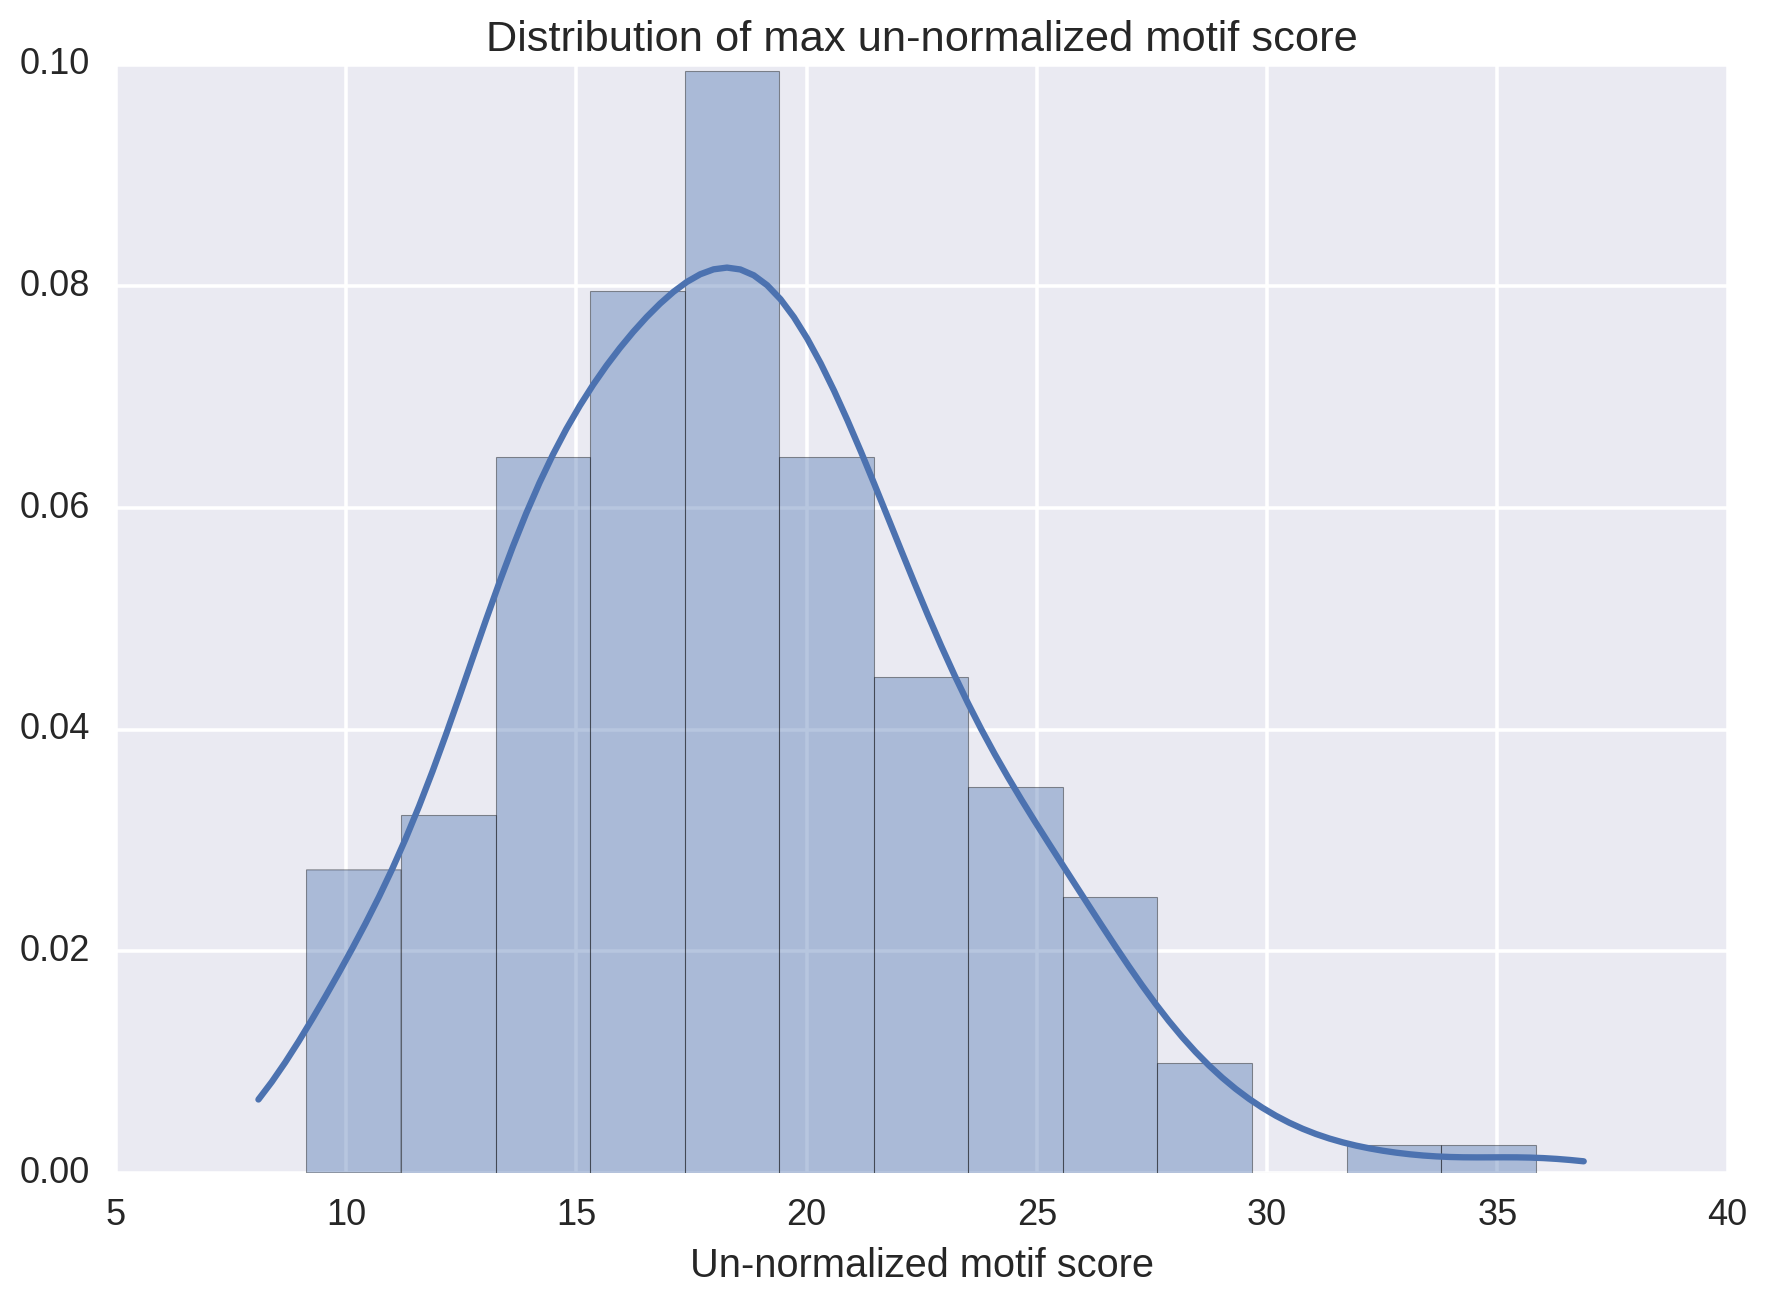

In [56]:
sns.distplot(motif_score_frame.ix[:,3:].max(axis=0))
plt.title('Distribution of max un-normalized motif score')
plt.xlabel('Un-normalized motif score')

In [57]:
### test motif scores for normality - which justifies the use of standardization
for motif in motif_score_frame.columns.values[3:]:
    w, pval = scipy.stats.mstats.normaltest(motif_score_frame[motif].values)
    if pval > 0.01:
        print(motif, pval)
    

arid3a 1.0


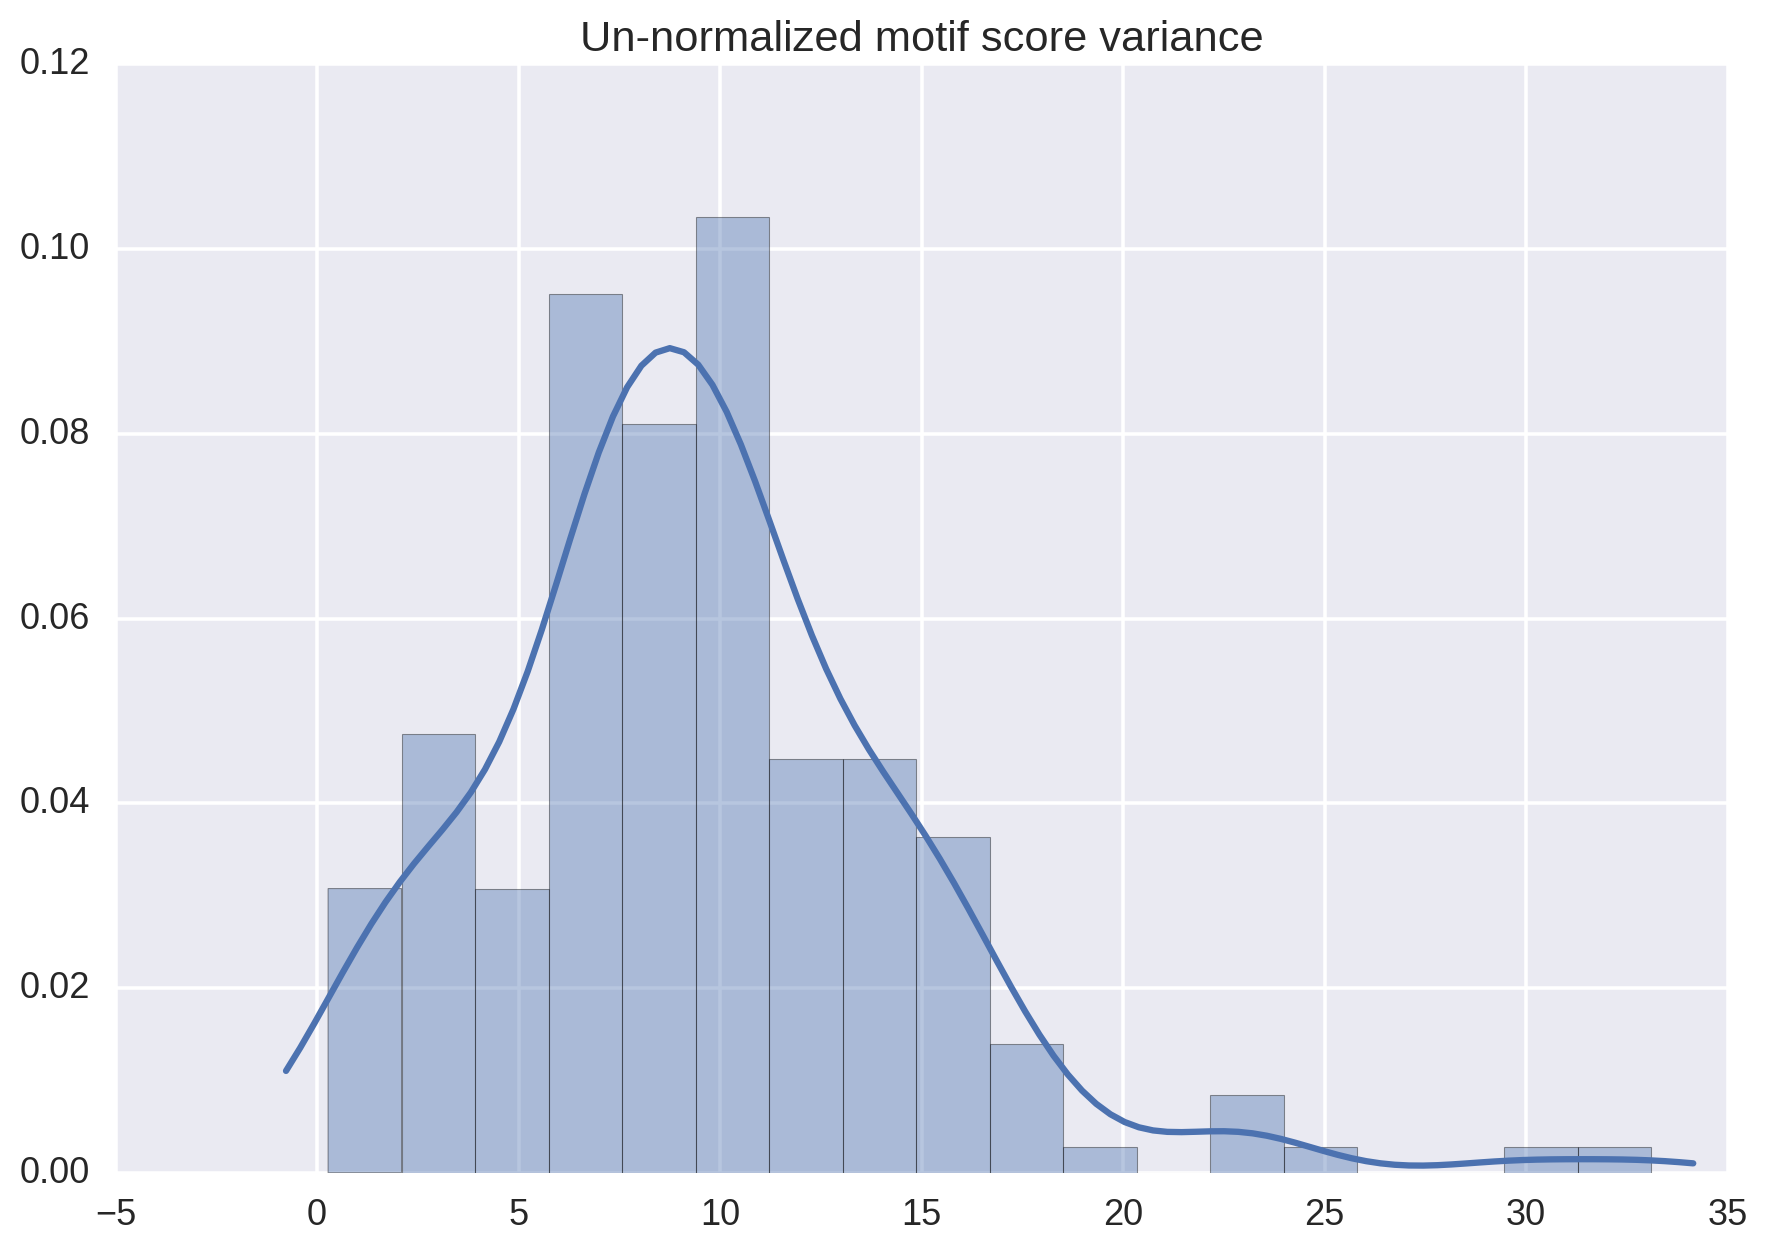

In [58]:
### plot variance of motif scores

sns.distplot(motif_score_frame.ix[:,3:].var())
plt.title('Un-normalized motif score variance')
plt.show()



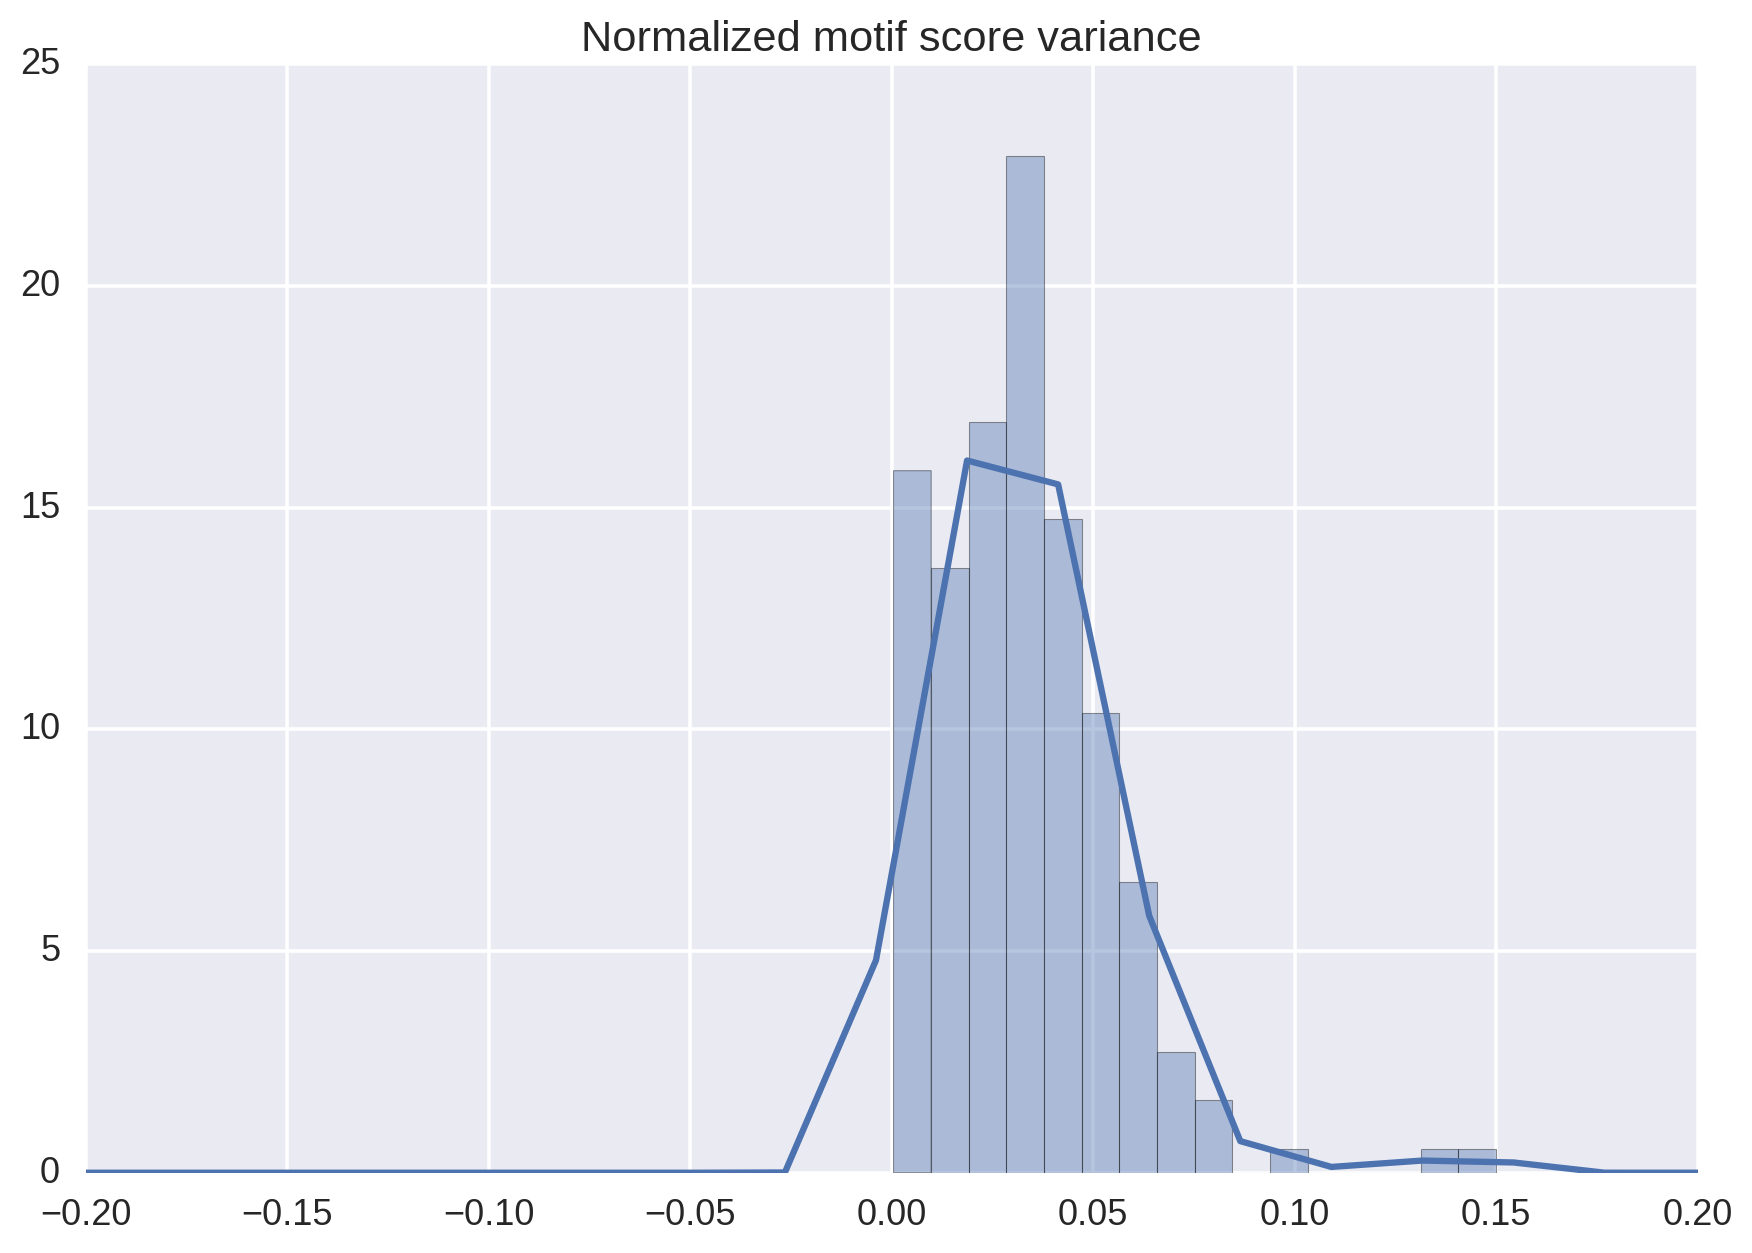

In [59]:
### plot variance of motif scores

sns.distplot(normed_motif_frame.var())
plt.title('Normalized motif score variance')
plt.xlim(-0.2, 0.2)
plt.show()




### Plot Distributions of motif scores

/bioinformatics/software/anaconda3/lib/python3.4/site-packages/seaborn-0.7.0-py3.4.egg/seaborn/categorical.py:2125: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


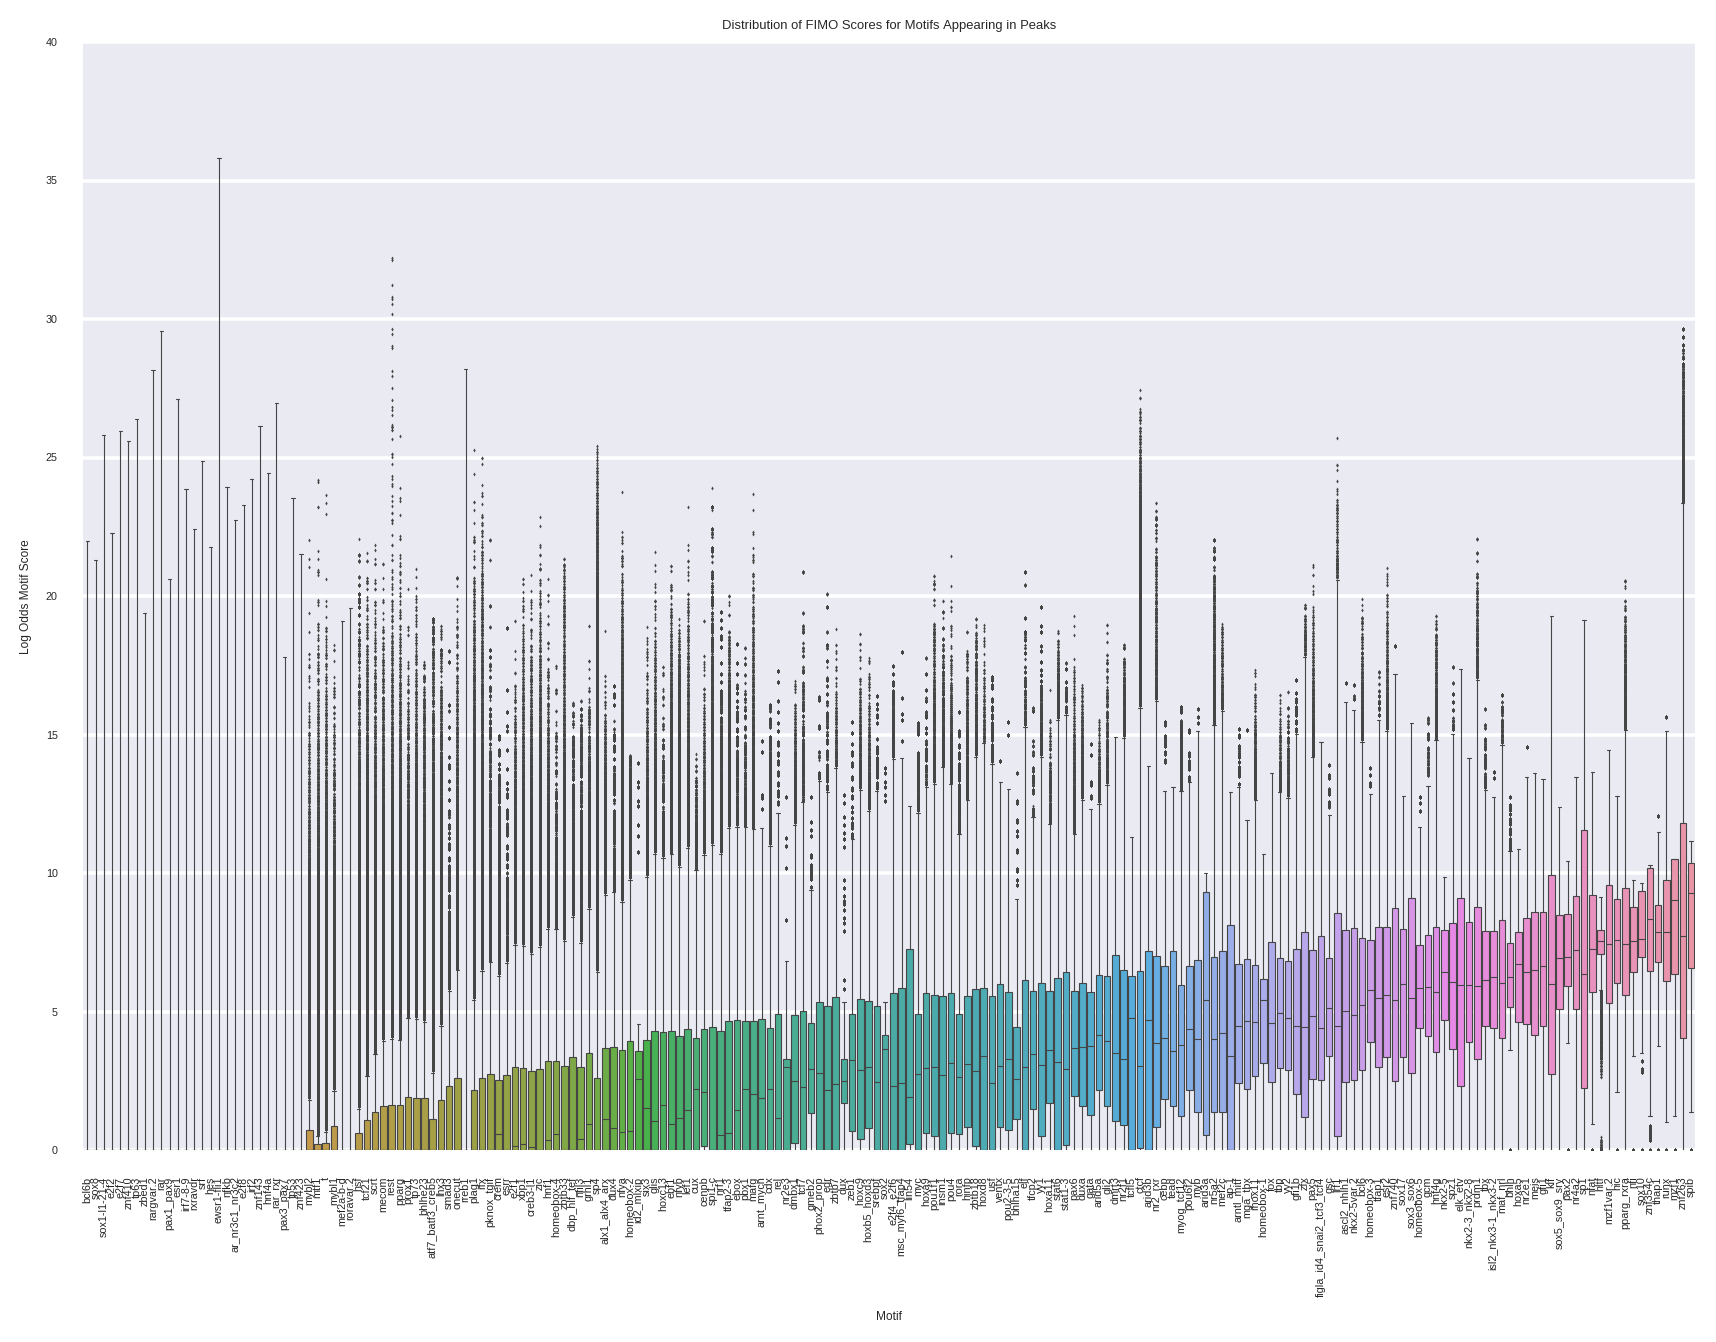

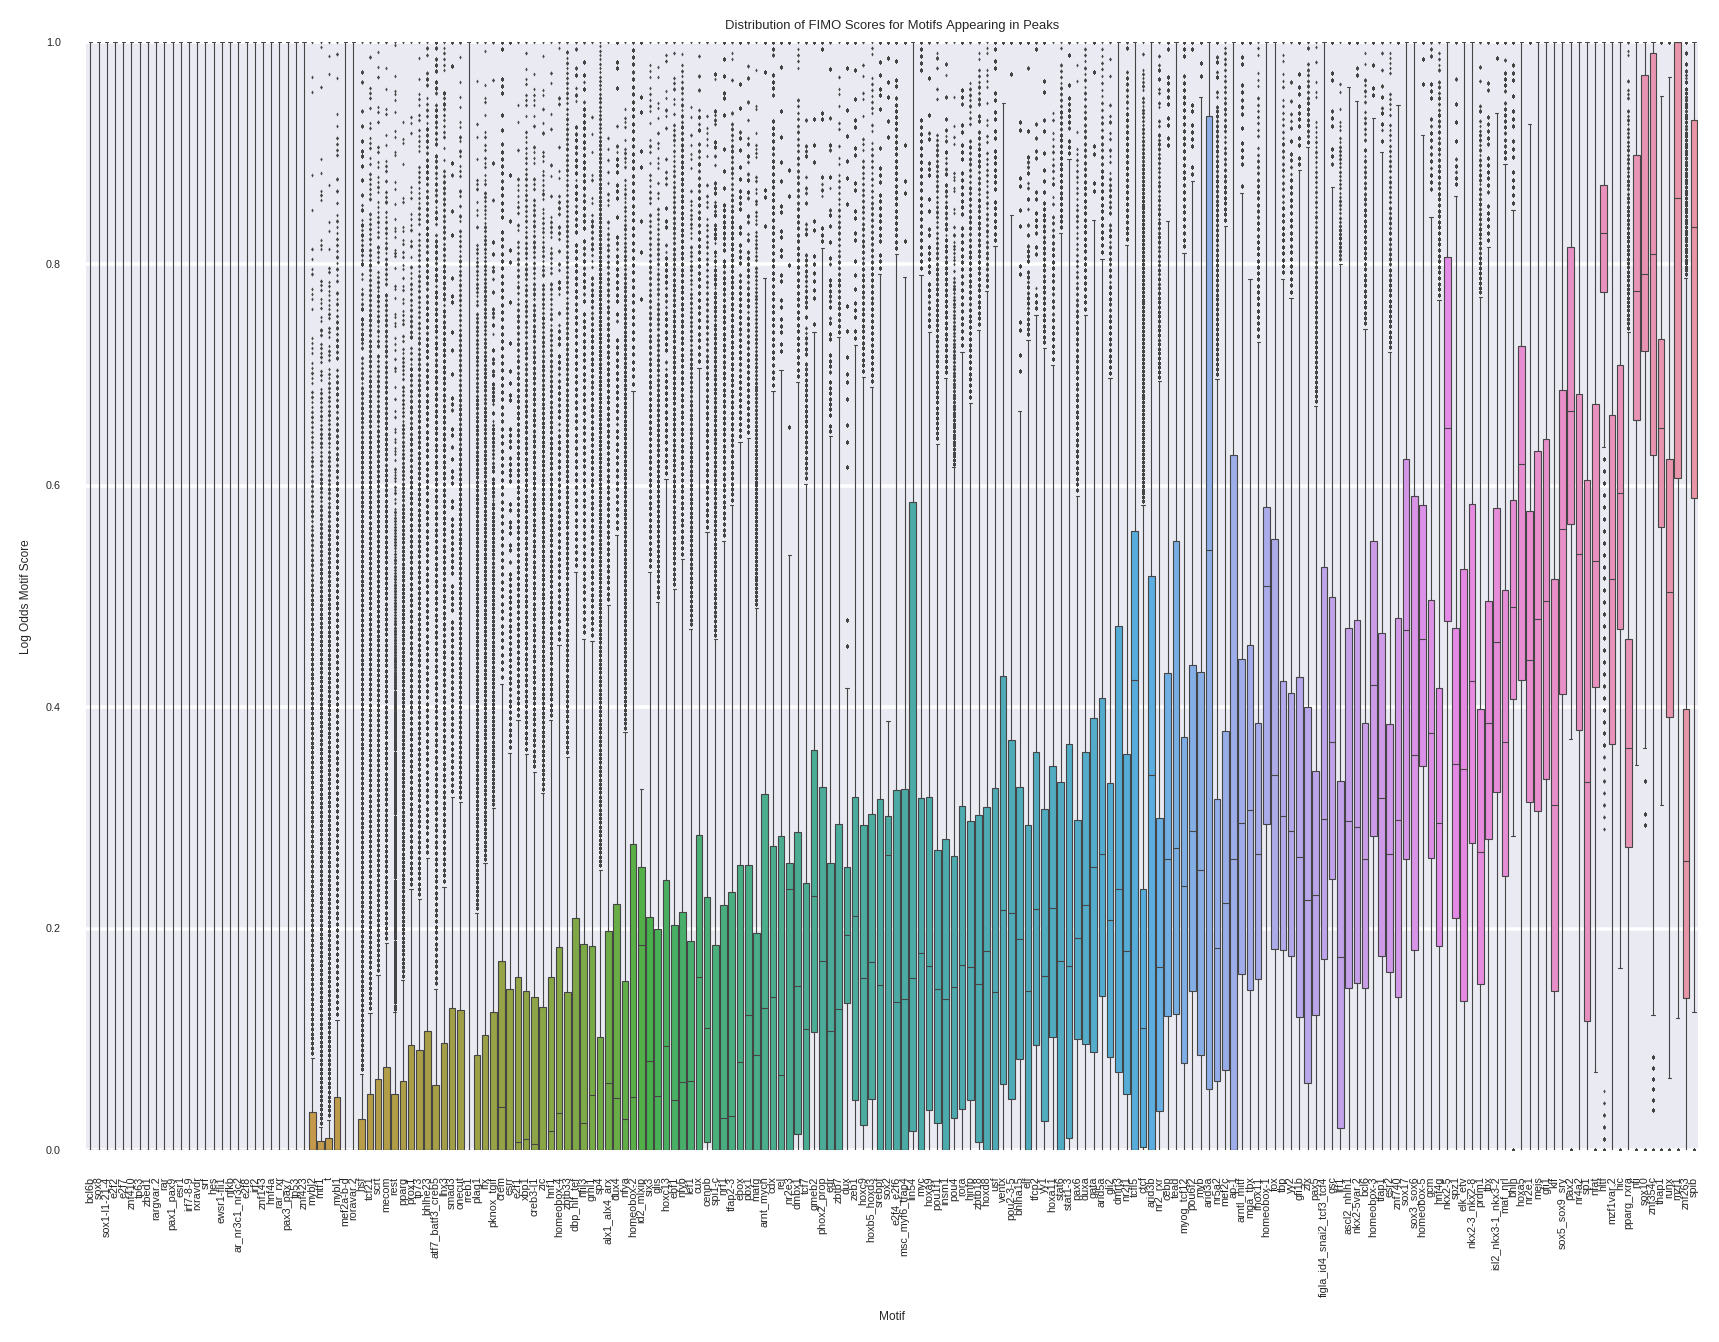

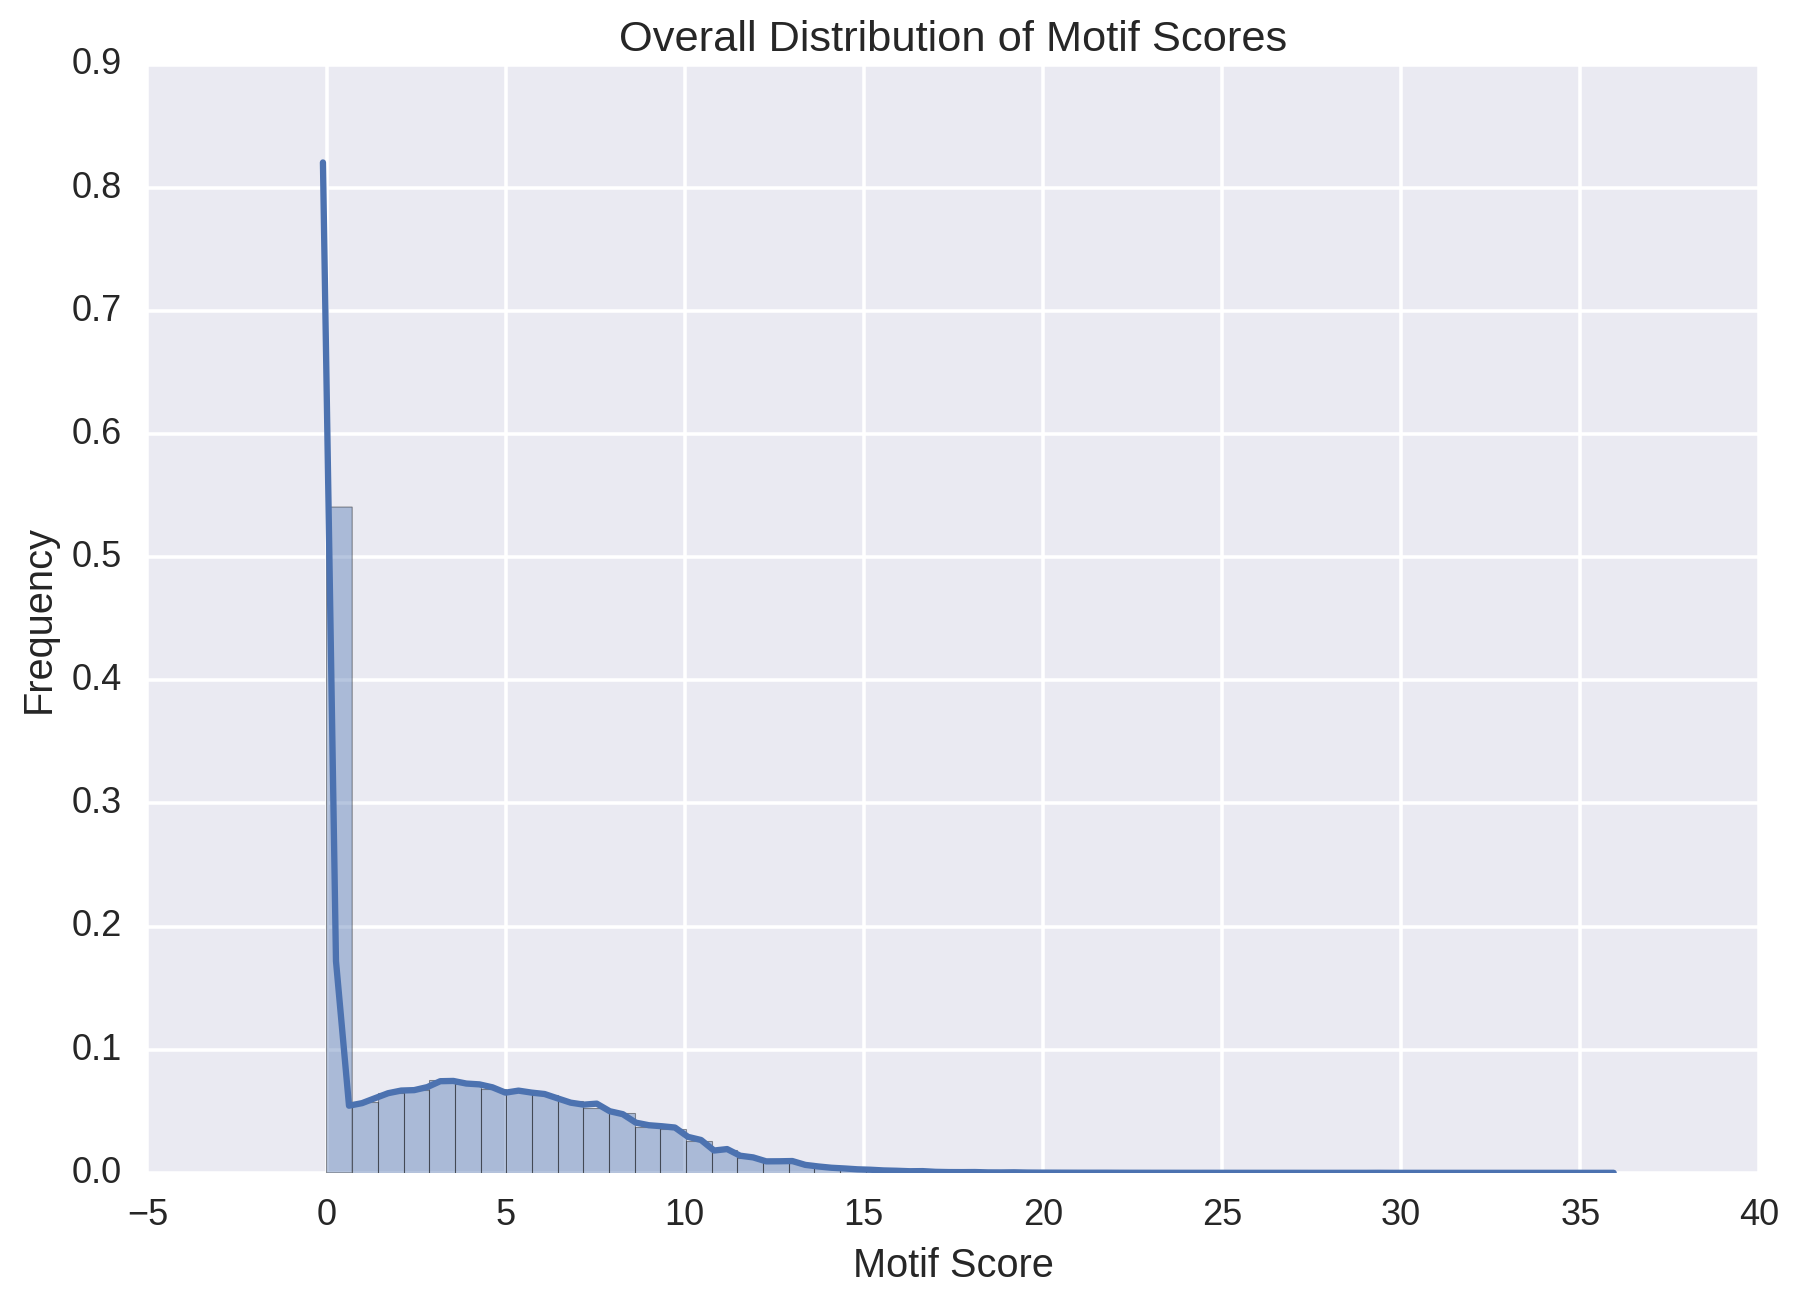

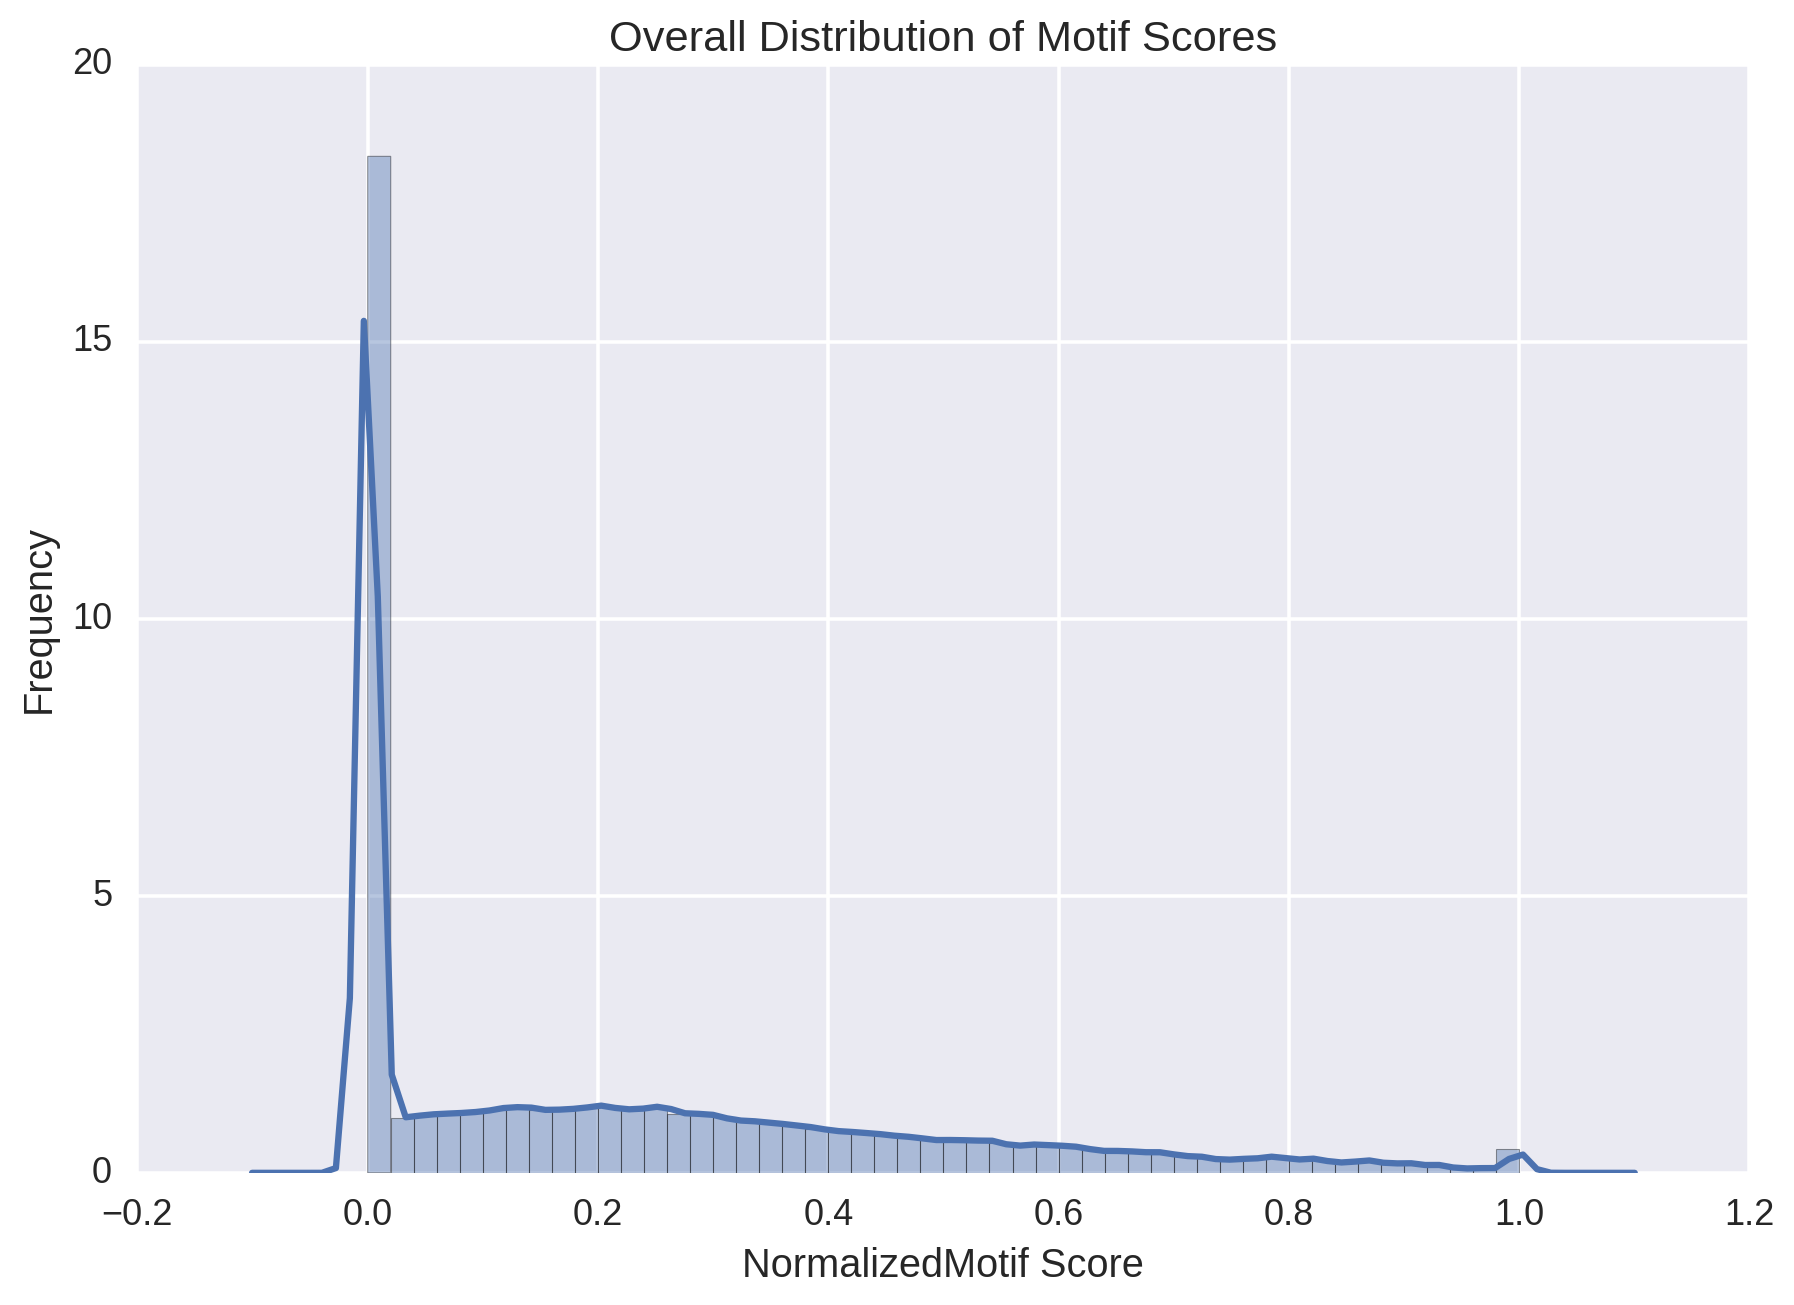

In [60]:
# plot distribution of motif scores
sns.set_context('talk', font_scale=0.3)
data_dict = {}
count = 0
sort_list = []
for col in motif_score_frame.columns[3:]:
    data_dict[col] = motif_score_frame[col].values
    sort_list.append((col, np.mean(motif_score_frame[col].values)))
sort_list = sorted(sort_list,key=lambda x:x[1])
order = [x[0] for x in sort_list]
sns.boxplot(pd.DataFrame(data_dict), 
            fliersize = 1.0,linewidth=0.4,
            order = order)
plt.xticks(rotation=90)
# plt.xticks([])
plt.xlabel("Motif")
plt.ylabel("Log Odds Motif Score")
plt.title("Distribution of FIMO Scores for Motifs Appearing in Peaks")
plt.show()
del data_dict
sns.set_context('talk', font_scale=1.0)

# plot distribution of normed motif scores
sns.set_context('talk', font_scale=0.3)
data_dict = {}
count = 0
sort_list = []
for col in normed_motif_frame.columns:
    data_dict[col] = normed_motif_frame[col].values
    sort_list.append((col, np.mean(motif_score_frame[col].values)))
sort_list = sorted(sort_list,key=lambda x:x[1])
order = [x[0] for x in sort_list]
sns.boxplot(pd.DataFrame(data_dict), 
            fliersize = 1.0,linewidth=0.4,
            order = order)
plt.xticks(rotation=90)
# plt.xticks([])
plt.xlabel("Motif")
plt.ylabel("Log Odds Motif Score")
plt.title("Distribution of FIMO Scores for Motifs Appearing in Peaks")
del data_dict
plt.show()
sns.set_context('talk', font_scale=1.0)

sns.distplot(motif_score_frame.ix[:,3:].values.flatten())
plt.title('Overall Distribution of Motif Scores')
plt.xlabel('Motif Score')
plt.ylabel('Frequency')
plt.show()
sns.distplot(normed_motif_frame.ix[:,3:].values.flatten())
# plt.xlim(-0.05, 0.05)
plt.title('Overall Distribution of Motif Scores')
plt.xlabel('NormalizedMotif Score')
plt.ylabel('Frequency')

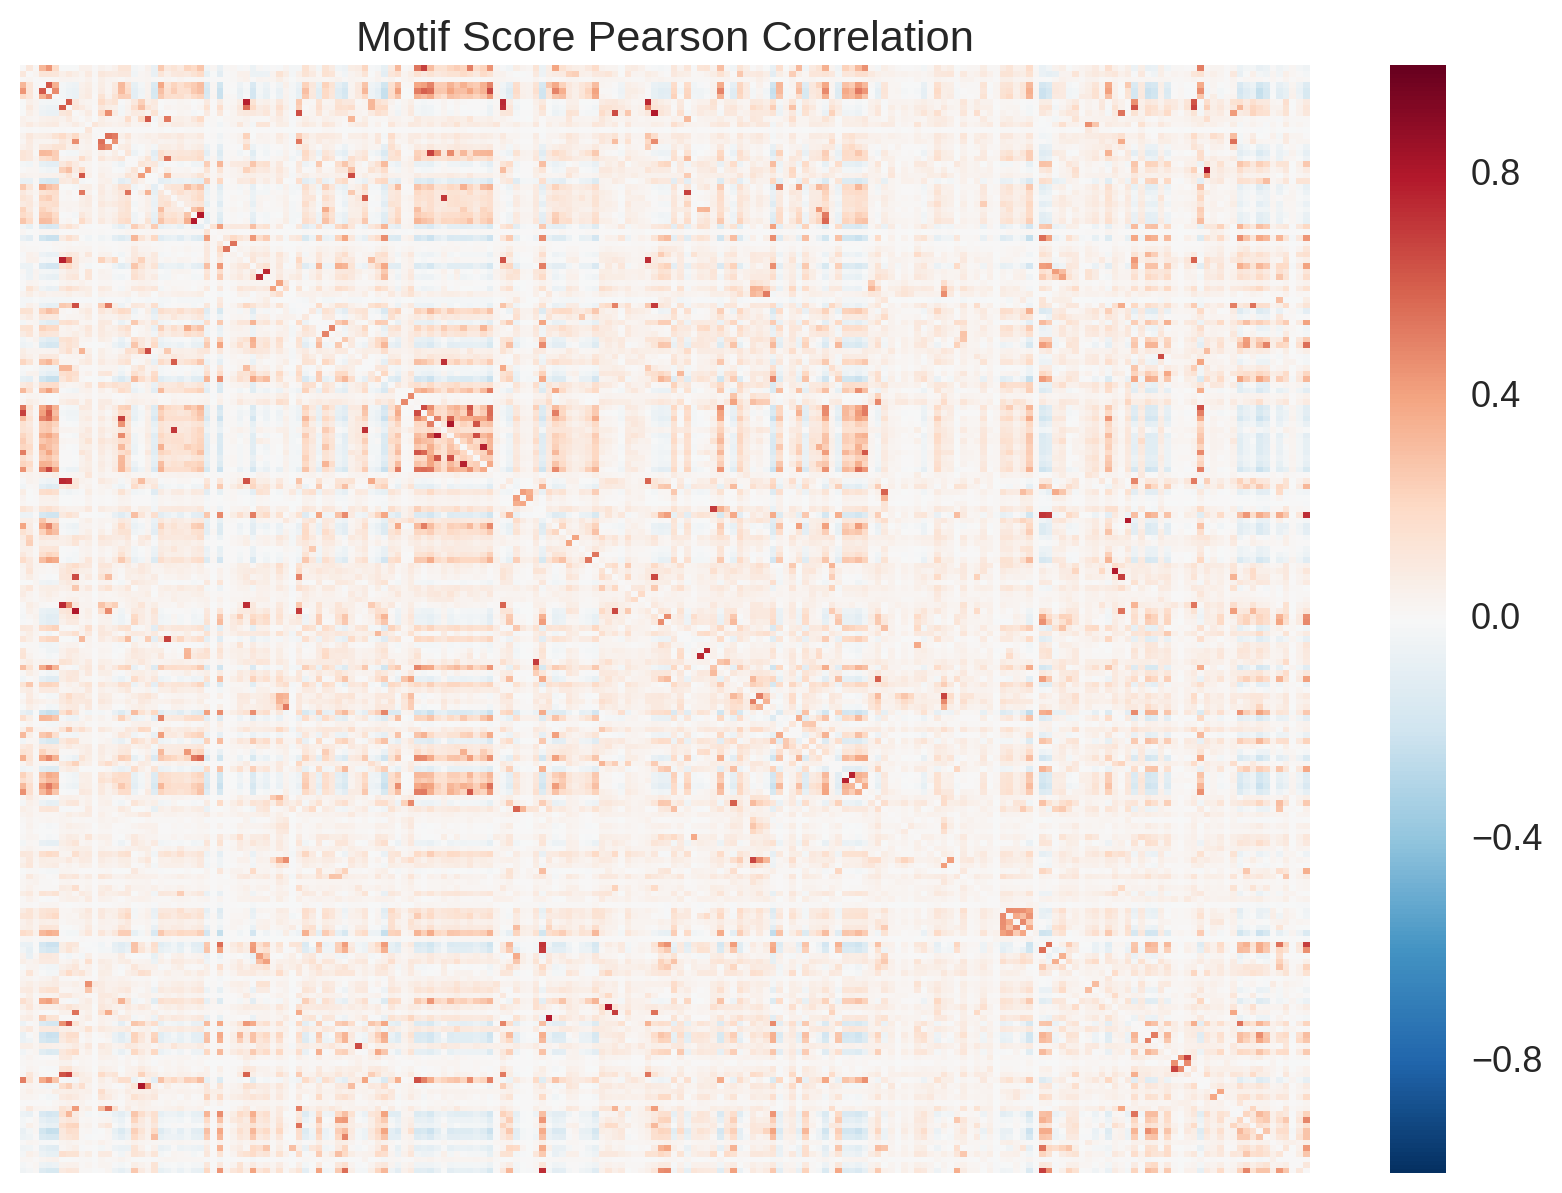

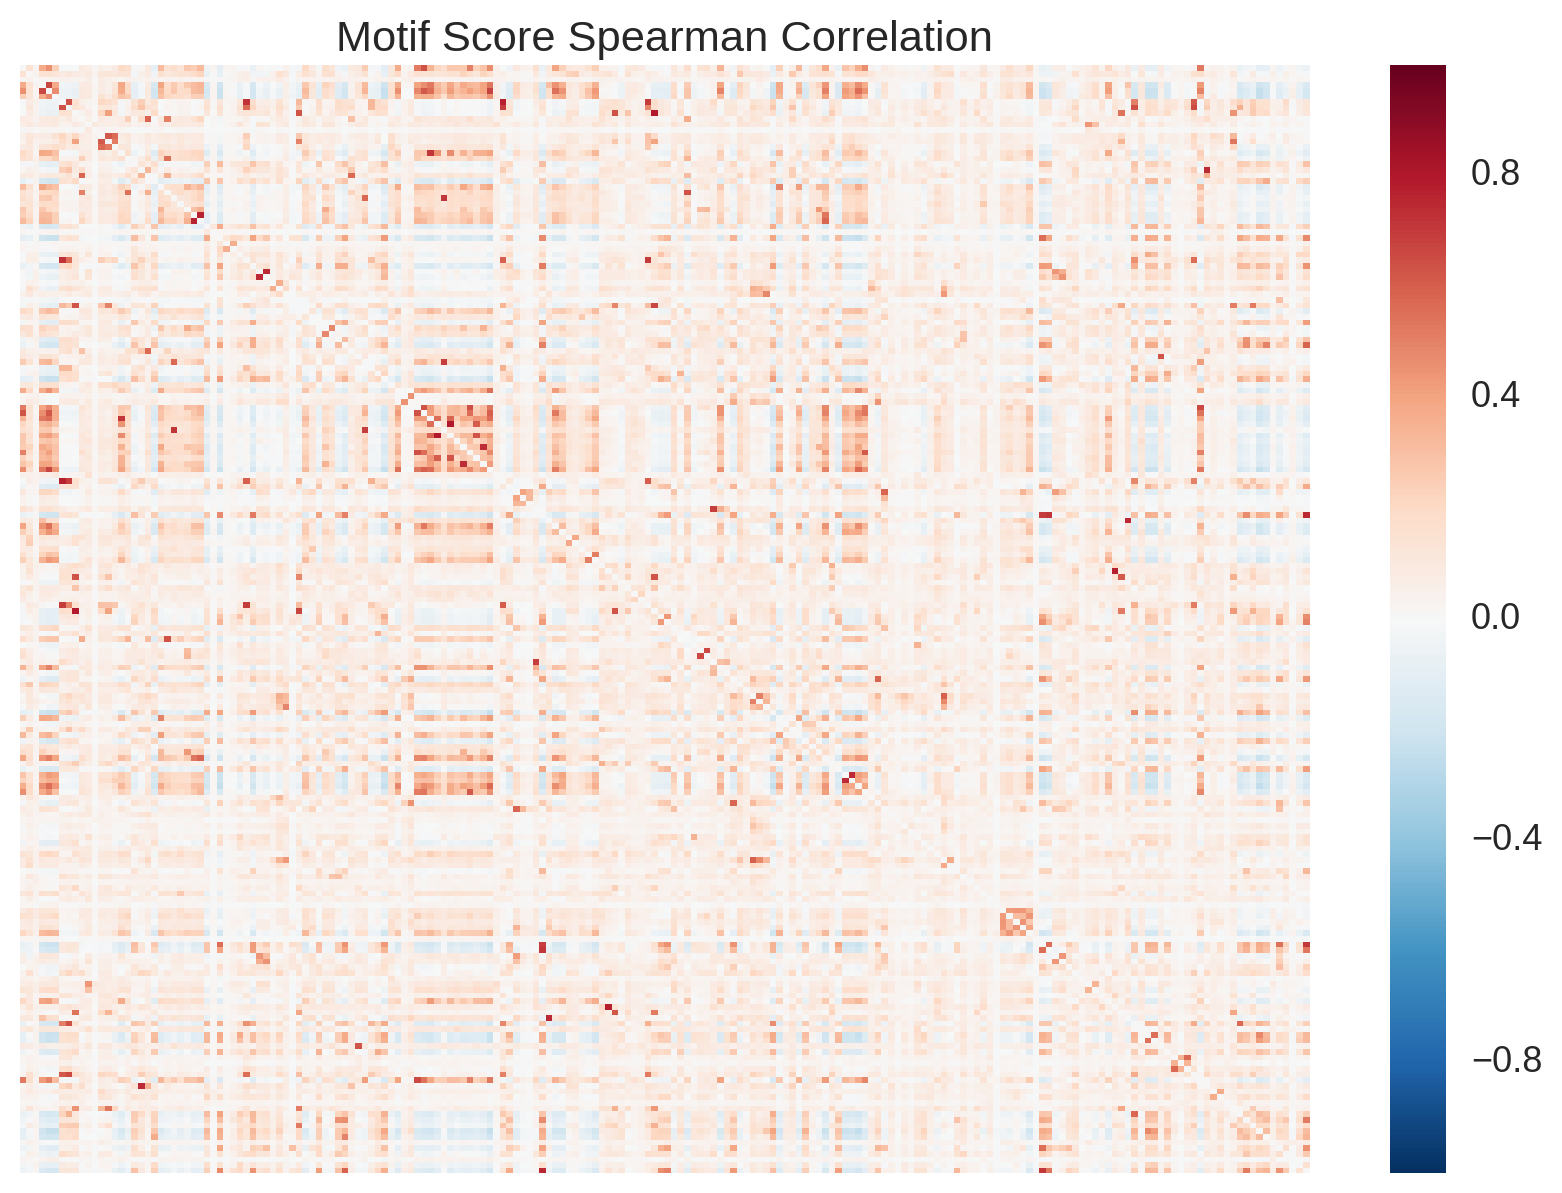

In [61]:
# Show how motif scores correlate to one another
# plot distribution of motif scores
data_dict = {}
count = 0
sort_list = []
motifs = motif_score_frame.columns[3:]
motif_corr_pearson_matrix = np.zeros((len(motifs), len(motifs)))
motif_corr_spearman_matrix = np.zeros((len(motifs), len(motifs)))
# for every pair of motifs
for i in range(len(motifs) -1 ):
    for j in range(i+1, len(motifs)):
        motif1 = motifs[i]
        motif2 = motifs[j]
        # get relevant motif scores
        motifScores1 = motif_score_frame[motif1].values
        motifScores2 = motif_score_frame[motif2].values
        # calculate spearman and peason correlation
        r, p_val_pearson = scipy.stats.pearsonr(motifScores1, motifScores2)
        rho, p_val_spearman = scipy.stats.spearmanr(motifScores1, motifScores2)
        # fill in position in matrix
        motif_corr_pearson_matrix[i][j] = r
        motif_corr_spearman_matrix[i][j] = rho
        motif_corr_pearson_matrix[j][i] = r
        motif_corr_spearman_matrix[j][i] = rho


# create data frames
motif_corr_pearson_frame = pd.DataFrame(motif_corr_pearson_matrix)
motif_corr_spearman_frame = pd.DataFrame(motif_corr_spearman_matrix)

motif_corr_pearson_frame = motif_corr_pearson_frame.fillna(0)
motif_corr_pearson_frame.columns = motifs
motif_corr_pearson_frame.index = motifs

motif_corr_spearman_frame = motif_corr_spearman_frame.fillna(0)
motif_corr_spearman_frame.columns = motifs
motif_corr_spearman_frame.index = motifs

sns.heatmap(motif_corr_pearson_frame,xticklabels = False, yticklabels = False, vmax=1.0)
plt.title('Motif Score Pearson Correlation')
plt.show()

sns.heatmap(motif_corr_spearman_frame,xticklabels = False, yticklabels = False, vmax=1.0)
plt.title('Motif Score Spearman Correlation')
plt.show()

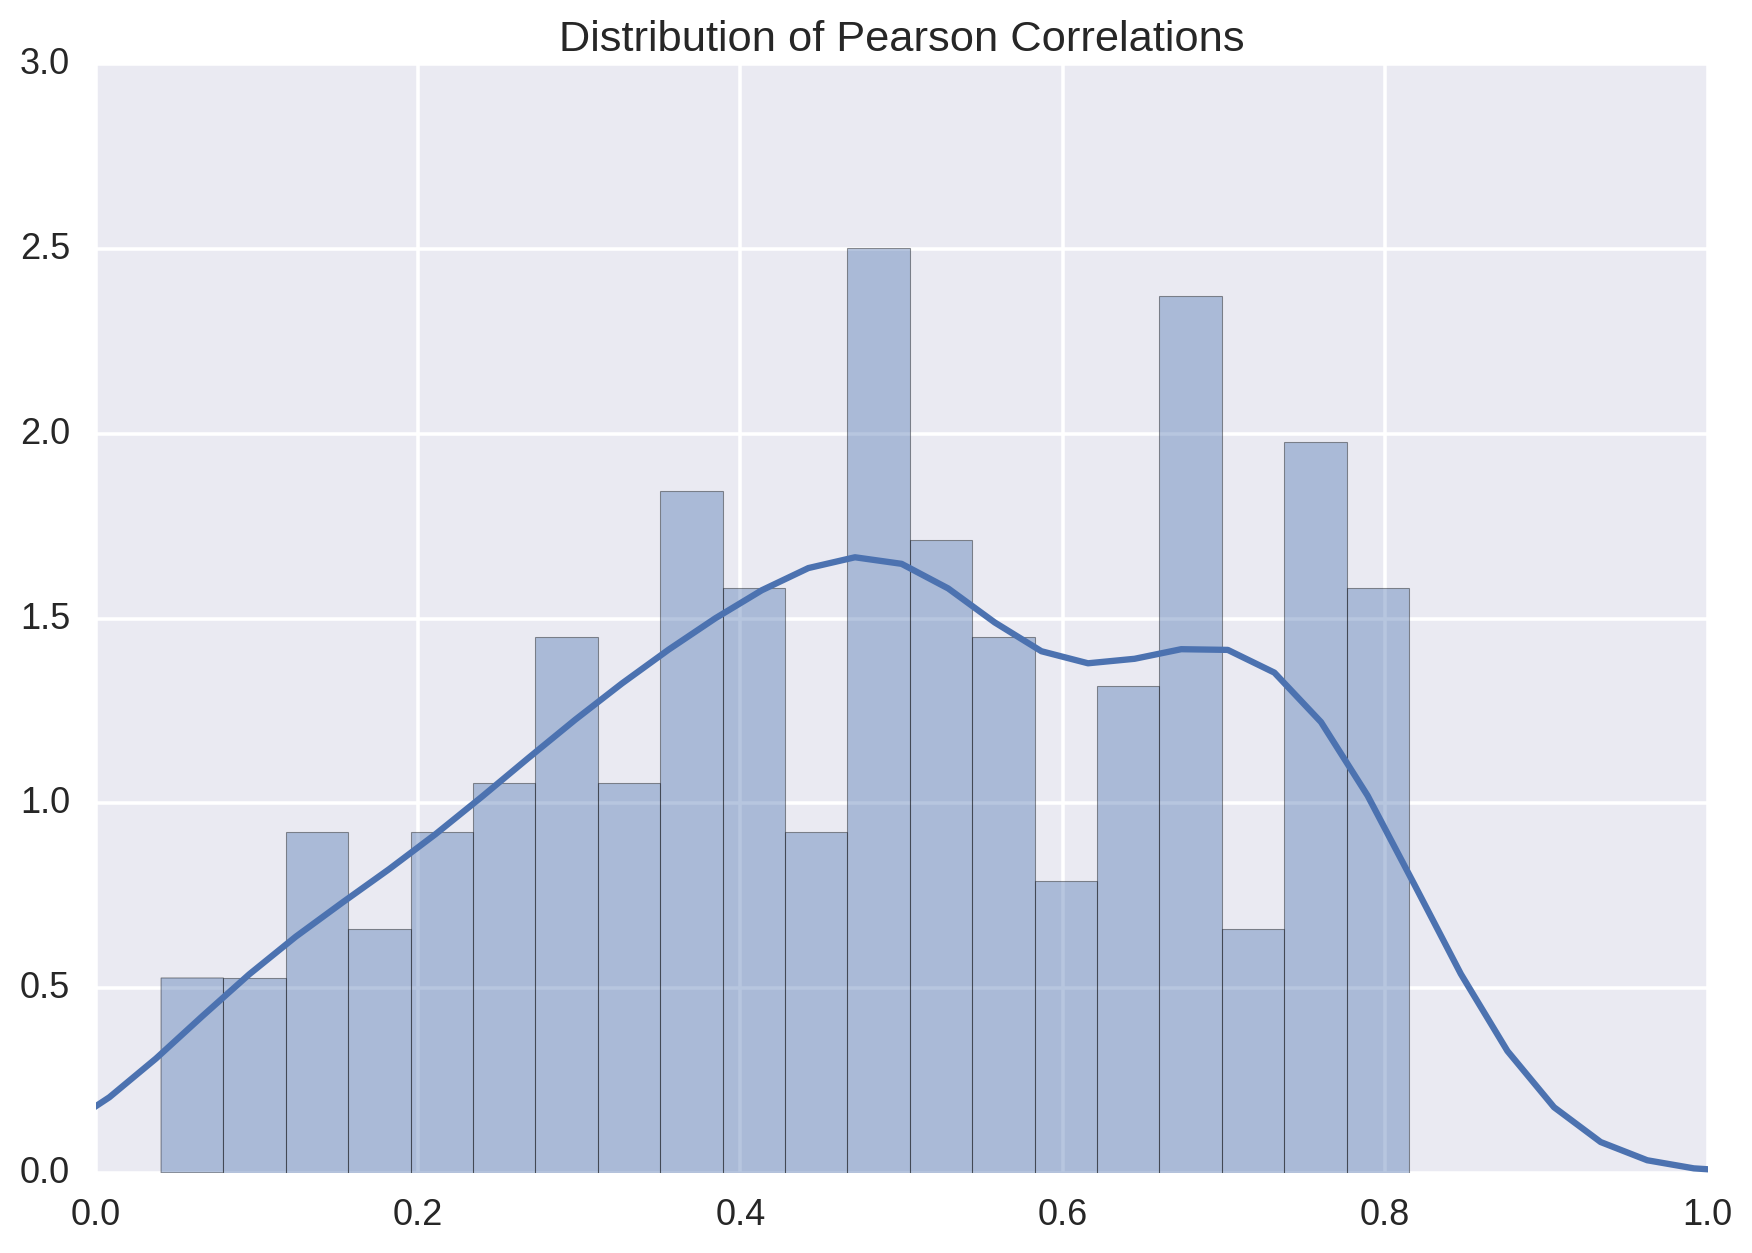

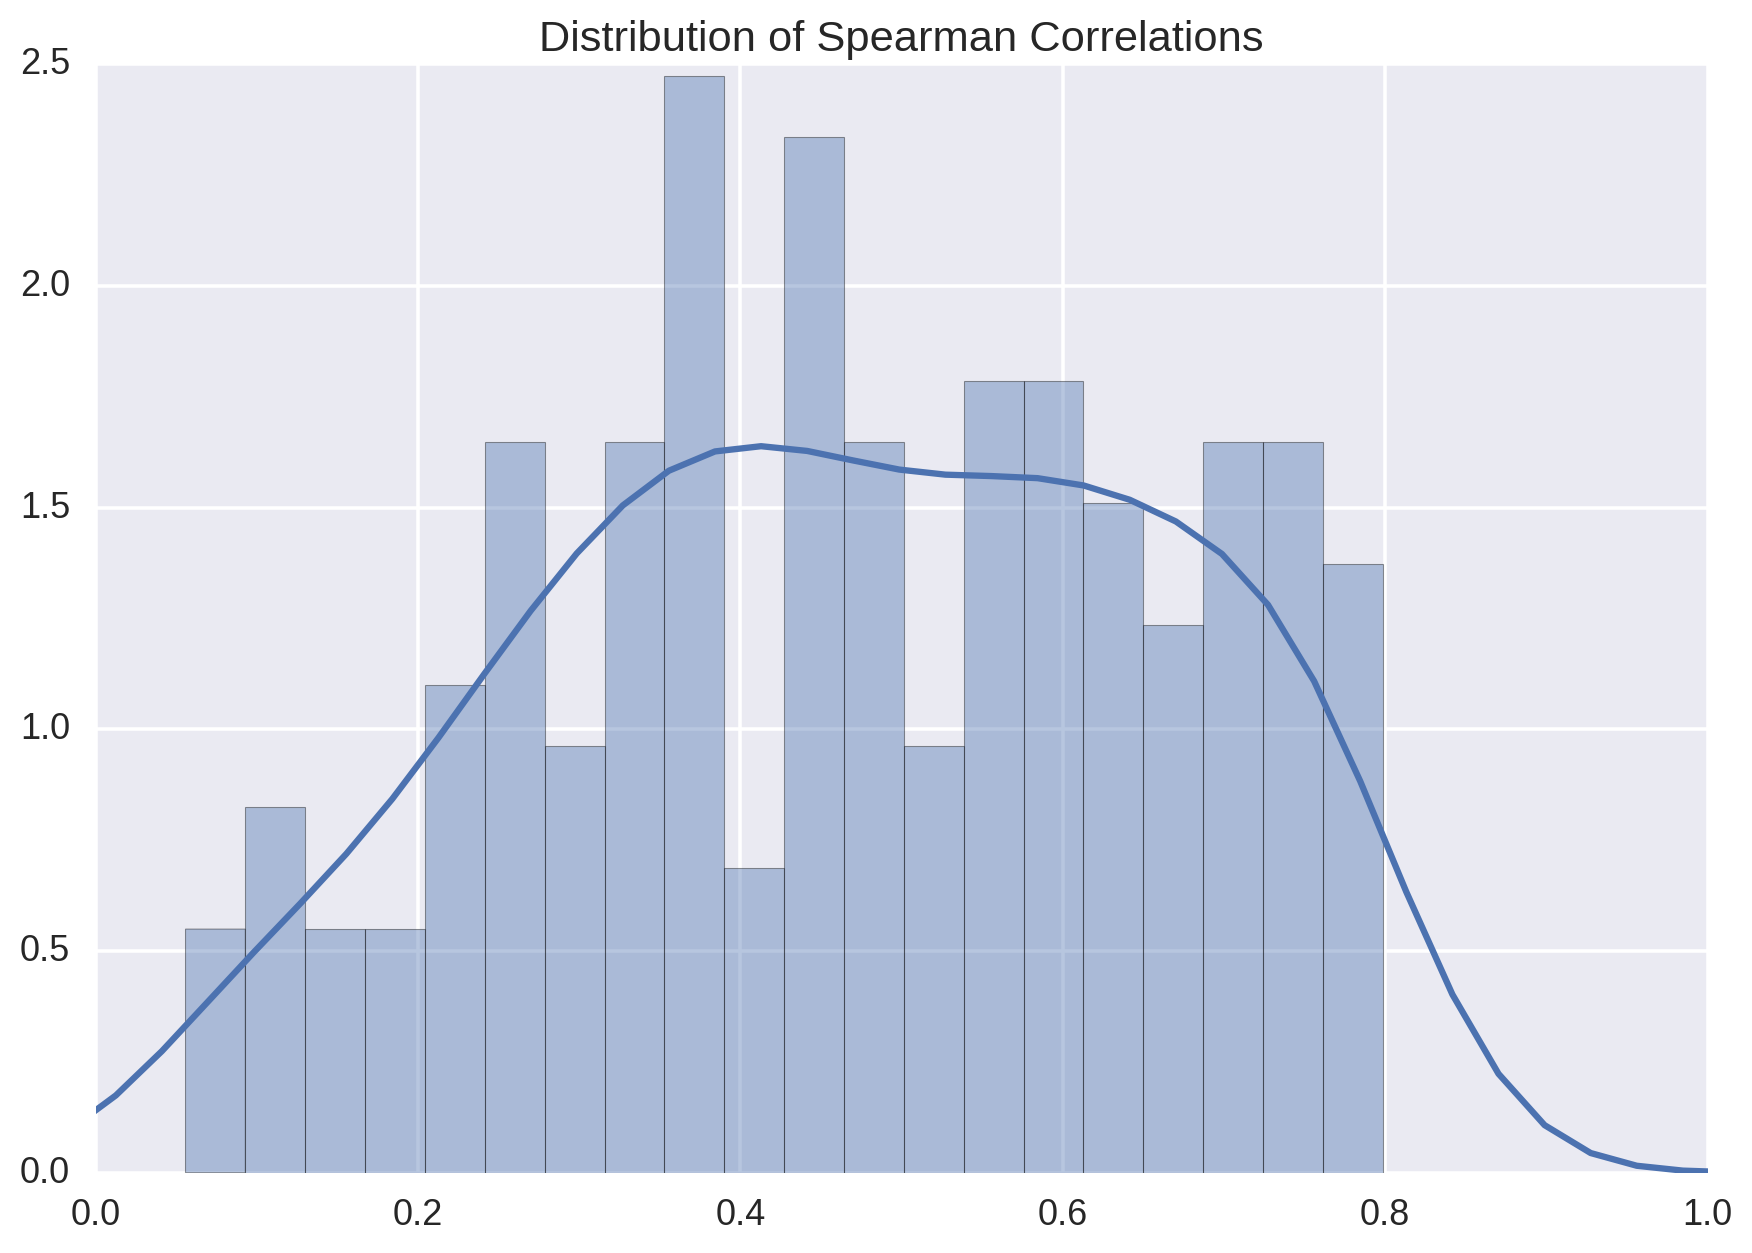

In [62]:
sns.distplot(motif_corr_pearson_frame.max(), bins=20)
plt.xlim(0,1)
plt.title('Distribution of Pearson Correlations')
plt.show()
sns.distplot(motif_corr_spearman_frame.max(), bins=20)
plt.xlim(0,1)
plt.title('Distribution of Spearman Correlations')

## Clustering

In [ ]:
### hierarchically cluster peaks in vehicle conditions and do de novo motif analysis on each cluster ###
numClusters = 2
colorDict = dict(zip(range(numClusters+1), sns.color_palette("colorblind") + 
                     sns.color_palette("Set1") + 
                     sns.color_palette("Set2") + 
                     sns.color_palette("husl") +
                     sns.color_palette("Paired")
                    ))

indices = summary_frame[(summary_frame['Factors'].str.contains('_veh'))].index

data = summary_frame[summary_frame.index.isin(indices)][[x for x in summary_frame.columns if 'c57bl6' in x]]
data = data[[x for x in data.columns if '_veh' in x and not 'atac' in x]]
data = data[data.max(axis=1) > 0.0]
logged_data = np.log2(data+1)

est = KMeans(n_clusters=numClusters, n_jobs=4)
est.fit(logged_data.ix[:,4:])
colors = [colorDict[x] for x in est.labels_]

cg = sns.clustermap(logged_data,
          yticklabels=False,
          xticklabels=True,
          cmap='Blues',
          row_colors=colors)


In [ ]:
### hierarchically cluster peaks in KLA condition and do de novo motif analysis on each cluster ###
numClusters = 2
colorDict = dict(zip(range(numClusters+1), sns.color_palette("colorblind") + sns.color_palette("Set1") + sns.color_palette("Set2")))

indices = summary_frame[(summary_frame['Factors'].str.contains('_kla'))].index

data = summary_frame[summary_frame.index.isin(indices)][[x for x in summary_frame.columns if 'c57bl6' in x]]
data = data[[x for x in data.columns if '_kla' in x and not 'atac' in x]]
data = data[data.max(axis=1) > 0.0]
logged_data = np.log2(data+1)

est = KMeans(n_clusters=numClusters, n_jobs=4)
est.fit(logged_data.ix[:,4:])
colors = [colorDict[x] for x in est.labels_]

cg = sns.clustermap(logged_data,
          yticklabels=False,
          xticklabels=True,
          cmap='Reds',
          row_colors=colors)





In [ ]:
### hierarchically cluster peaks in all condition and do de novo motif analysis on each cluster ###
numClusters = 2
colorDict = dict(zip(range(numClusters+1), sns.color_palette("colorblind") + sns.color_palette("Set1") + sns.color_palette("Set2")))

indices = summary_frame.index

data = summary_frame[summary_frame.index.isin(indices)][[x for x in summary_frame.columns if 'c57bl6' in x]]
data = data[[x for x in data.columns if not 'atac' in x]]
data = data[data.max(axis=1) > 0.0]
logged_data = np.log2(data+1)

est = KMeans(n_clusters=numClusters, n_jobs=4)
est.fit(logged_data.ix[:,4:])
colors = [colorDict[x] for x in est.labels_]

cg = sns.clustermap(logged_data,
          yticklabels=False,
          xticklabels=True,
          col_cluster=False,
          row_colors=colors)





## PCA on Peak Scores

In [ ]:
### PCA on all peaks
numRowClusters = 2

numColors = 20
colorDict = dict(zip(range(numClusters+1), sns.color_palette("colorblind") + sns.color_palette("Set1") + sns.color_palette("Set2")))


# calculate k-means cluster for use in coloring
est = KMeans(n_clusters=numRowClusters, n_jobs=4)
est.fit(normed_summary_frame)
colors = [colorDict[x] for x in est.labels_]

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
model = sklearn.decomposition.PCA(n_components=3)
reduced_features = model.fit_transform(normed_summary_frame)
explained_variance_ratios = model.explained_variance_ratio_

ax.scatter(reduced_features[:, 0], reduced_features[:, 1], reduced_features[:, 2],
            alpha=1.0, c=colors)
ax.set_title("PCA on all Peaks (Normalized Peak Scores)")
ax.set_xlabel("1st eigenvector (" + "{:.3f}".format(explained_variance_ratios[0]) +')')
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector (" + "{:.3f}".format(explained_variance_ratios[1]) +')')
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector (" + "{:.3f}".format(explained_variance_ratios[2]) +')')

ax.w_zaxis.set_ticklabels([])
ax.set_axis_bgcolor('white')

classes = sorted(set(est.labels_))
class_colours = [colorDict[x] for x in classes]
recs = []
for i in range(0,len(class_colours)):
    recs.append(matplotlib.patches.Rectangle((0,0),1,1,fc=class_colours[i]))
    
plt.legend(recs,classes,loc=4)
plt.show()

clusters = []
indices = []
reads = []
factor = []
treatments = []
index_cluster_tuples = tuple(zip(normed_summary_frame.index.values, est.labels_))
for cluster in sorted(set(est.labels_)):
    current_indices = [x[0] for x in index_cluster_tuples if x[1] == cluster]
    gro_veh = list(np.log2(annotation_frame[annotation_frame.index.isin(current_indices)]['Gro_Veh -'].values +
                           annotation_frame[annotation_frame.index.isin(current_indices)]['Gro_Veh +'].values + 1))
    gro_kla = list(np.log2(annotation_frame[annotation_frame.index.isin(current_indices)]['Gro_KLA -'].values +
                           annotation_frame[annotation_frame.index.isin(current_indices)]['Gro_KLA +'].values + 1))
    
    reads = reads + gro_veh
    treatments = treatments + len(current_indices) * ['veh']
    
    reads = reads + gro_kla
    treatments = treatments + len(current_indices) * ['kla']
    
    clusters = clusters + 2 * len(current_indices) * [str(cluster)]
    
    factor = factor + 2 * len(current_indices) * ['gro']

data_frame = pd.DataFrame({'log 2 reads': reads, 
                          'treatment':treatments,
                          'cluster':clusters})

sns.factorplot(x='cluster',y='log 2 reads', hue='treatment', 
                data= data_frame, 
                kind='box',
                size=10,
                width=0.4,
                whis=1,
                showfliers=False)
plt.ylim([0,12])
plt.show()

In [ ]:
### PCA on all peaks
numRowClusters = 2
numColClusters = 8

numColors = 20
colorDict = dict(zip(range(numClusters+1), sns.color_palette("colorblind") + sns.color_palette("Set1") + sns.color_palette("Set2")))

# calculate k-means cluster for use in coloring
est = KMeans(n_clusters=numRowClusters, n_jobs=4)
est.fit(np.log2(summary_frame.ix[:,4:] + 1))
colors = [colorDict[x] for x in est.labels_]

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
model = sklearn.decomposition.PCA(n_components=3)
reduced_features = model.fit_transform(summary_frame.ix[:,4:])
explained_variance_ratios = model.explained_variance_ratio_

ax.scatter(reduced_features[:, 0], reduced_features[:, 1], reduced_features[:, 2],
            alpha=1.0, c=colors)
ax.set_title("PCA on all Peaks (Un-normalized Peak Scores)")
ax.set_xlabel("1st eigenvector (" + "{:.3f}".format(explained_variance_ratios[0]) +')')
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector (" + "{:.3f}".format(explained_variance_ratios[1]) +')')
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector (" + "{:.3f}".format(explained_variance_ratios[2]) +')')

ax.w_zaxis.set_ticklabels([])
ax.set_axis_bgcolor('white')

classes = sorted(set(est.labels_))
class_colours = [colorDict[x] for x in classes]
recs = []
for i in range(0,len(class_colours)):
    recs.append(matplotlib.patches.Rectangle((0,0),1,1,fc=class_colours[i]))
    
plt.legend(recs,classes,loc=4)
plt.show()

clusters = []
indices = []
reads = []
factor = []
treatments = []
index_cluster_tuples = tuple(zip(normed_summary_frame.index.values, est.labels_))
for cluster in sorted(set(est.labels_)):
    current_indices = [x[0] for x in index_cluster_tuples if x[1] == cluster]
    gro_veh = list(np.log2(annotation_frame[annotation_frame.index.isin(current_indices)]['Gro_Veh +'].values + 1))
    gro_kla = list(np.log2(annotation_frame[annotation_frame.index.isin(current_indices)]['Gro_KLA +'].values + 1))
    
    reads = reads + gro_veh
    treatments = treatments + len(current_indices) * ['veh']
    
    reads = reads + gro_kla
    treatments = treatments + len(current_indices) * ['kla']
    
    clusters = clusters + 2 * len(current_indices) * [str(cluster)]
    
    factor = factor + 2 * len(current_indices) * ['gro']

data_frame = pd.DataFrame({'log 2 reads': reads, 
                          'treatment':treatments,
                          'cluster':clusters})

sns.factorplot(x='cluster',y='log 2 reads', hue='treatment', 
           data= data_frame, 
           kind='box',
           size=10,
           width=0.4,
           whis=1,
              showfliers=False)
plt.ylim([0,12])
plt.show()

## PCA on Motifs Scores

In [ ]:
### PCA on all peaks
numRowClusters = 2

numColors = 20
colorDict = dict(zip(range(numColors),sns.color_palette("Set2") + sns.color_palette("colorblind")))

# calculate k-means cluster for use in coloring
est = KMeans(n_clusters=numRowClusters, n_jobs=4)
est.fit(motif_score_frame.ix[:,3:])
colors = [colorDict[x] for x in est.labels_]

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
model = sklearn.decomposition.PCA(n_components=3)
reduced_features = model.fit_transform(motif_score_frame.ix[:,3:])
explained_variance_ratios = model.explained_variance_ratio_

ax.scatter(reduced_features[:, 0], reduced_features[:, 1], reduced_features[:, 2],
            alpha=1.0, c=colors)
ax.set_title("PCA on all Peaks (Un-normalized Motif Scores)")
ax.set_xlabel("1st eigenvector (" + "{:.3f}".format(explained_variance_ratios[0]) +')')
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector (" + "{:.3f}".format(explained_variance_ratios[1]) +')')
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector (" + "{:.3f}".format(explained_variance_ratios[2]) +')')

ax.w_zaxis.set_ticklabels([])
ax.set_axis_bgcolor('white')

classes = sorted(set(est.labels_))
class_colours = [colorDict[x] for x in classes]
recs = []
for i in range(0,len(class_colours)):
    recs.append(matplotlib.patches.Rectangle((0,0),1,1,fc=class_colours[i]))
    
plt.legend(recs,classes,loc=4)
plt.show()

clusters = []
indices = []
reads = []
factor = []
treatments = []
index_cluster_tuples = tuple(zip(motif_score_frame.index.values, est.labels_))
for cluster in sorted(set(est.labels_)):
    current_indices = [x[0] for x in index_cluster_tuples if x[1] == cluster]
    gro_veh = list(np.log2(annotation_frame[annotation_frame.index.isin(current_indices)]['Gro_Veh +'].values +
                           annotation_frame[annotation_frame.index.isin(current_indices)]['Gro_Veh -'].values + 1))
    gro_kla = list(np.log2(annotation_frame[annotation_frame.index.isin(current_indices)]['Gro_KLA +'].values +
                           annotation_frame[annotation_frame.index.isin(current_indices)]['Gro_KLA -'].values+ 1))
    
    reads = reads + gro_veh
    treatments = treatments + len(current_indices) * ['veh']
    
    reads = reads + gro_kla
    treatments = treatments + len(current_indices) * ['kla']
    
    clusters = clusters + 2 * len(current_indices) * [str(cluster)]
    
    factor = factor + 2 * len(current_indices) * ['gro']

data_frame = pd.DataFrame({'log 2 reads': reads, 
                          'treatment':treatments,
                          'cluster':clusters})

sns.factorplot(x='cluster',y='log 2 reads', hue='treatment', 
           data= data_frame, 
           kind='box',
           size=10,
           width=0.4,
           whis=1,
              showfliers=False)
plt.ylim([0,12])
plt.show()

In [ ]:
### PCA on all normed peaks
numRowClusters = 2
numColClusters = 8

# calculate k-means cluster for use in coloring
est = KMeans(n_clusters=numRowClusters, n_jobs=4)
est.fit(normed_motif_frame)
colors = [colorDict[x] for x in est.labels_]

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
model = sklearn.decomposition.PCA(n_components=3)
reduced_features = model.fit_transform(normed_motif_frame)
explained_variance_ratios = model.explained_variance_ratio_

ax.scatter(reduced_features[:, 0], reduced_features[:, 1], reduced_features[:, 2],
            alpha=1.0, c=colors)
ax.set_title("PCA on all Peaks (Normalized Motif Scores)")
ax.set_xlabel("1st eigenvector (" + "{:.3f}".format(explained_variance_ratios[0]) +')')
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector (" + "{:.3f}".format(explained_variance_ratios[1]) +')')
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector (" + "{:.3f}".format(explained_variance_ratios[2]) +')')

ax.w_zaxis.set_ticklabels([])
ax.set_axis_bgcolor('white')

classes = sorted(set(est.labels_))
class_colours = [colorDict[x] for x in classes]
recs = []
for i in range(0,len(class_colours)):
    recs.append(matplotlib.patches.Rectangle((0,0),1,1,fc=class_colours[i]))
    
plt.legend(recs,classes,loc=4)
plt.show()

clusters = []
indices = []
reads = []
factor = []
treatments = []
index_cluster_tuples = tuple(zip(normed_motif_frame.index.values, est.labels_))
for cluster in sorted(set(est.labels_)):
    current_indices = [x[0] for x in index_cluster_tuples if x[1] == cluster]
    gro_veh = list(np.log2(annotation_frame[annotation_frame.index.isin(current_indices)]['Gro_Veh +'].values +
                           annotation_frame[annotation_frame.index.isin(current_indices)]['Gro_Veh -'].values + 1))
    gro_kla = list(np.log2(annotation_frame[annotation_frame.index.isin(current_indices)]['Gro_KLA +'].values +
                           annotation_frame[annotation_frame.index.isin(current_indices)]['Gro_KLA -'].values+ 1))

   
    reads = reads + gro_veh
    treatments = treatments + len(current_indices) * ['veh']
    
    reads = reads + gro_kla
    treatments = treatments + len(current_indices) * ['kla']
    
    clusters = clusters + 2 * len(current_indices) * [str(cluster)]
    
    factor = factor + 2 * len(current_indices) * ['gro']

data_frame = pd.DataFrame({'log 2 reads': reads, 
                          'treatment':treatments,
                          'cluster':clusters})

sns.factorplot(x='cluster',y='log 2 reads', hue='treatment', 
           data= data_frame, 
           kind='box',
           size=10,
           width=0.5,
           whis=1,
              showfliers=False)
# plt.ylim(0,12)
plt.show()

In [ ]:
### PCA on all normed vehicle peaks
numRowClusters = 2
numColClusters = 8

# calculate k-means cluster for use in coloring
est = KMeans(n_clusters=numRowClusters, n_jobs=4)

data = normed_motif_frame[normed_motif_frame.index.isin(
    summary_frame[summary_frame['Factors'].str.contains('veh')].index.values)]
est.fit(data)
colors = [colorDict[x] for x in est.labels_]

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
model = sklearn.decomposition.PCA(n_components=3)
reduced_features = model.fit_transform(data)
explained_variance_ratios = model.explained_variance_ratio_

ax.scatter(reduced_features[:, 0], reduced_features[:, 1], reduced_features[:, 2],
            alpha=1.0, c=colors)
ax.set_title("PCA on Vehicle Peaks (Normalized Motif Scores)")
ax.set_xlabel("1st eigenvector (" + "{:.3f}".format(explained_variance_ratios[0]) +')')
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector (" + "{:.3f}".format(explained_variance_ratios[1]) +')')
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector (" + "{:.3f}".format(explained_variance_ratios[2]) +')')

ax.w_zaxis.set_ticklabels([])
ax.set_axis_bgcolor('white')

classes = sorted(set(est.labels_))
class_colours = [colorDict[x] for x in classes]
recs = []
for i in range(0,len(class_colours)):
    recs.append(matplotlib.patches.Rectangle((0,0),1,1,fc=class_colours[i]))
    
plt.legend(recs,classes,loc=4)
plt.show()

clusters = []
indices = []
reads = []
factor = []
treatments = []
index_cluster_tuples = tuple(zip(data.index.values, est.labels_))
for cluster in sorted(set(est.labels_)):
    current_indices = [x[0] for x in index_cluster_tuples if x[1] == cluster]
    gro_veh = list(np.log2(annotation_frame[annotation_frame.index.isin(current_indices)]['Gro_Veh +'].values +
                           annotation_frame[annotation_frame.index.isin(current_indices)]['Gro_Veh -'].values+ 1))   
    reads = reads + gro_veh
    treatments = treatments + len(current_indices) * ['veh']

    clusters = clusters + 1 * len(current_indices) * [str(cluster)]
    
    factor = factor + 1 * len(current_indices) * ['gro']

data_frame = pd.DataFrame({'log 2 reads': reads, 
                          'treatment':treatments,
                          'cluster':clusters})

sns.factorplot(x='cluster',y='log 2 reads',
           data= data_frame, 
           kind='box',
           size=10,
           width=0.5,
           whis=1,
              showfliers=False)
plt.show()

In [ ]:
### PCA on all normed KLA peaks
numRowClusters = 2
numColClusters = 8

# calculate k-means cluster for use in coloring
est = KMeans(n_clusters=numRowClusters, n_jobs=4)

data = normed_motif_frame[normed_motif_frame.index.isin(
    summary_frame[summary_frame['Factors'].str.contains('kla')].index.values)]
est.fit(data)
colors = [colorDict[x] for x in est.labels_]

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
model = sklearn.decomposition.PCA(n_components=3)
reduced_features = model.fit_transform(data)
explained_variance_ratios = model.explained_variance_ratio_

ax.scatter(reduced_features[:, 0], reduced_features[:, 1], reduced_features[:, 2],
            alpha=1.0, c=colors)
ax.set_title("PCA on KLA Peaks (Normalized Motif Scores)")
ax.set_xlabel("1st eigenvector (" + "{:.3f}".format(explained_variance_ratios[0]) +')')
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector (" + "{:.3f}".format(explained_variance_ratios[1]) +')')
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector (" + "{:.3f}".format(explained_variance_ratios[2]) +')')

ax.w_zaxis.set_ticklabels([])
ax.set_axis_bgcolor('white')

classes = sorted(set(est.labels_))
class_colours = [colorDict[x] for x in classes]
recs = []
for i in range(0,len(class_colours)):
    recs.append(matplotlib.patches.Rectangle((0,0),1,1,fc=class_colours[i]))
    
plt.legend(recs,classes,loc=4)
plt.show()

clusters = []
indices = []
reads = []
factor = []
treatments = []
index_cluster_tuples = tuple(zip(data.index.values, est.labels_))
for cluster in sorted(set(est.labels_)):
    current_indices = [x[0] for x in index_cluster_tuples if x[1] == cluster]
    gro_kla = list(np.log2(annotation_frame[annotation_frame.index.isin(current_indices)]['Gro_KLA +'].values +
                           annotation_frame[annotation_frame.index.isin(current_indices)]['Gro_KLA -'].values+ 1))   
    reads = reads + gro_kla
    treatments = treatments + len(current_indices) * ['kla']

    clusters = clusters + 1 * len(current_indices) * [str(cluster)]
    
    factor = factor + 1 * len(current_indices) * ['gro']

data_frame = pd.DataFrame({'log 2 reads': reads, 
                          'treatment':treatments,
                          'cluster':clusters})

sns.factorplot(x='cluster',y='log 2 reads',
           data= data_frame, 
           kind='box',
           size=10,
           width=0.5,
           whis=1,
              showfliers=False)
plt.show()

## Classification of Peak Identity

In [8]:

def get_GC_matched_split(features, labels, test_size, tolerance = 0.01):
    '''
    feature: 2D array (samples x features)
    labels: 1D boolean array (samples x)
    test_size: fraction of data to test on
    tolerance: max difference in GC content between True and False labelled samples
    '''
    global _id_sequence_dict
    
    ### match GC content of samples labelled True with those labelled False by thowing out False samples
    # retrieve sequences using index of labels
    index_label_tuples = tuple(zip(labels.index.values, labels.values))
    
    true_sequences = [_id_sequence_dict[x[0]] for x in index_label_tuples if x[1]]
    true_ids = [x[0] for x in index_label_tuples if x[1]]
    
    false_sequences = [_id_sequence_dict[x[0]] for x in index_label_tuples if not x[1]]
    false_ids = [x[0] for x in index_label_tuples if not x[1]]
    
    # calculate GC content of True samples
    true_gc_count = 0
    true_length = 0
    for s in true_sequences:
        true_gc_count += s.count('G')
        true_gc_count += s.count('C')
        true_length += len(s)
    true_gc_content = true_gc_count/true_length
    
    # calcuate GC content of False samples
    false_gc_count = 0
    false_length = 0
    for s in false_sequences:
        false_gc_count += s.count('G')
        false_gc_count += s.count('C')
        false_length += len(s)
    false_gc_content = false_gc_count/false_length
    
    while abs(true_gc_content - false_gc_content) > tolerance:
        # remove false GC sequences until GC content matches tolerance
        selected_seq = False
        
        while not selected_seq:
            rand_index = np.random.randint(len(false_sequences))
            current_seq = false_sequences[rand_index]
            current_gc_count = current_seq.count('G')+ current_seq.count('C')
            current_length = len(current_seq)
            current_gc = current_gc_count/current_length
            if true_gc_content > false_gc_content:
                # remove sequences that would increase overall GC content of False sequences
                if current_gc < false_gc_content:
                    selected_seq = True
            else:
                # remove sequences that would decrease overall GC content of False sequences
                if current_gc > false_gc_content:
                    selected_seq = True
        false_gc_count -= current_gc_count
        false_length -= current_length
        false_gc_content = false_gc_count/false_length
        
        false_sequences.pop(rand_index)
        false_ids.pop(rand_index)
    
    filtered_ids = true_ids + false_ids
    filtered_features = features[features.index.isin(filtered_ids)]
    filtered_labels = labels[labels.index.isin(filtered_ids)]

    print('total:',features.shape[0], 'filtered:',filtered_features.shape[0], 'true gc:',np.round(true_gc_content,5), 'false gc:', np.round(false_gc_content,5), 'difference:',np.round(abs(true_gc_content - false_gc_content),5))

#     training_features, test_features, training_labels, test_labels = train_test_split(
#         filtered_features, filtered_labels, 
#         test_size =test_size, 
#         random_state=np.random.RandomState(0),
#         )
    if test_size <= 0.5:
        training_indices, test_indices = next(iter(
                sklearn.cross_validation.StratifiedKFold(filtered_labels, int(1/test_size), shuffle=True)))
    else:
        test_indices, training_indices = next(
            iter(sklearn.cross_validation.StratifiedKFold(filtered_labels, int(1/(1-test_size)), shuffle=True)))
    training_ids = [filtered_ids[i] for i in training_indices]
    test_ids = [filtered_ids[i] for i in test_indices]
    
    training_features = filtered_features[filtered_features.index.isin(training_ids)]
    test_features = filtered_features[filtered_features.index.isin(test_ids)]
    training_labels = filtered_labels[filtered_labels.index.isin(training_ids)]
    test_labels = filtered_labels[filtered_labels.index.isin(test_ids)]
    
    
#     n_samples = filtered_features.shape[0]
#     n_features = filtered_features.shape[1]

#     # shuffle and split training and test sets
#     filtered_features, filtered_labels = shuffle(filtered_features, filtered_labels, random_state=np.random.RandomState(0))
#     split = int(0.80*n_samples)
#     training_features, test_features = filtered_features[:split], filtered_features[split:]
#     training_labels, test_labels = filtered_labels[:split], filtered_labels[split:]
    
    return training_features, test_features, training_labels, test_labels
    

In [ ]:
### compare different classifiers ###
aucs = []
classifiers = []
metrics = []
factors = []
c57bl6_indices = summary_frame[summary_frame['Factors'].str.contains('c57bl6')].index.values
for factor in sorted(set([x.replace('_veh','').replace('_kla','') for x in summary_frame.columns[5:] if 'c57' in x and not 'atac' in x])):
    print(factor)
    
    features = normed_motif_frame[normed_motif_frame.index.isin(c57bl6_indices)]
    labels = summary_frame[summary_frame.index.isin(c57bl6_indices)]['Factors'].str.contains(factor)
    
    training_features, test_features, training_labels, test_labels = get_GC_matched_split(
        features, labels, test_size = 0.2, tolerance = 0.01)
    

    # Run classifier
    svm_classifier = svm.SVC(kernel='linear', probability=True, cache_size = 5000)
    rf_classifier = sklearn.ensemble.RandomForestClassifier(n_estimators=100, n_jobs=-1)
    lr_classifier = sklearn.linear_model.LogisticRegression(penalty='l1')
    
    svm_classifier.fit(training_features, training_labels)
    rf_classifier.fit(training_features, training_labels)
    lr_classifier.fit(training_features, training_labels)
    # retreive probabilities for each classifier
    probas_svm = svm_classifier.predict_proba(test_features)
    probas_rf = rf_classifier.predict_proba(test_features)
    probas_lr = lr_classifier.predict_proba(test_features)
    # retrieve predictions for each classifier
    predictions_svm = svm_classifier.predict(test_features)
    predictions_rf = rf_classifier.predict(test_features)
    predictions_lr = lr_classifier.predict(test_features)
    
    # roc curv for svm
    fpr_svm, tpr_svm, thresholds_roc_svm = sklearn.metrics.roc_curve(test_labels, probas_svm[:, 1])
    roc_auc_svm = auc(fpr_svm, tpr_svm)
    aucs.append(roc_auc_svm)
    
    # roc curv for rf
    fpr_rf, tpr_rf, thresholds_roc_rf = sklearn.metrics.roc_curve(test_labels, probas_rf[:, 1])
    roc_auc_rf = auc(fpr_rf, tpr_rf)
    aucs.append(roc_auc_rf)

    # roc curv for lr
    fpr_lr, tpr_lr, thresholds_roc_lr = sklearn.metrics.roc_curve(test_labels, probas_lr[:, 1])
    roc_auc_lr = auc(fpr_lr, tpr_lr)
    aucs.append(roc_auc_lr)

    classifiers = classifiers + ['svm', 'rf', 'lr']
    factors = factors + [factor] * 3
    
    print('training set|', 'num samples:', len(training_labels), 'num True:', np.sum(training_labels))
    print('test set    |', 'num samples:', len(test_labels), 'num True:', np.sum(test_labels))
    print(roc_auc_svm, roc_auc_rf, roc_auc_lr)

classifier_frame = pd.DataFrame({'factor':factors, 
                                 'AUC':aucs,
                                'classifier':classifiers})
              
    


c57bl6_atf3
total:

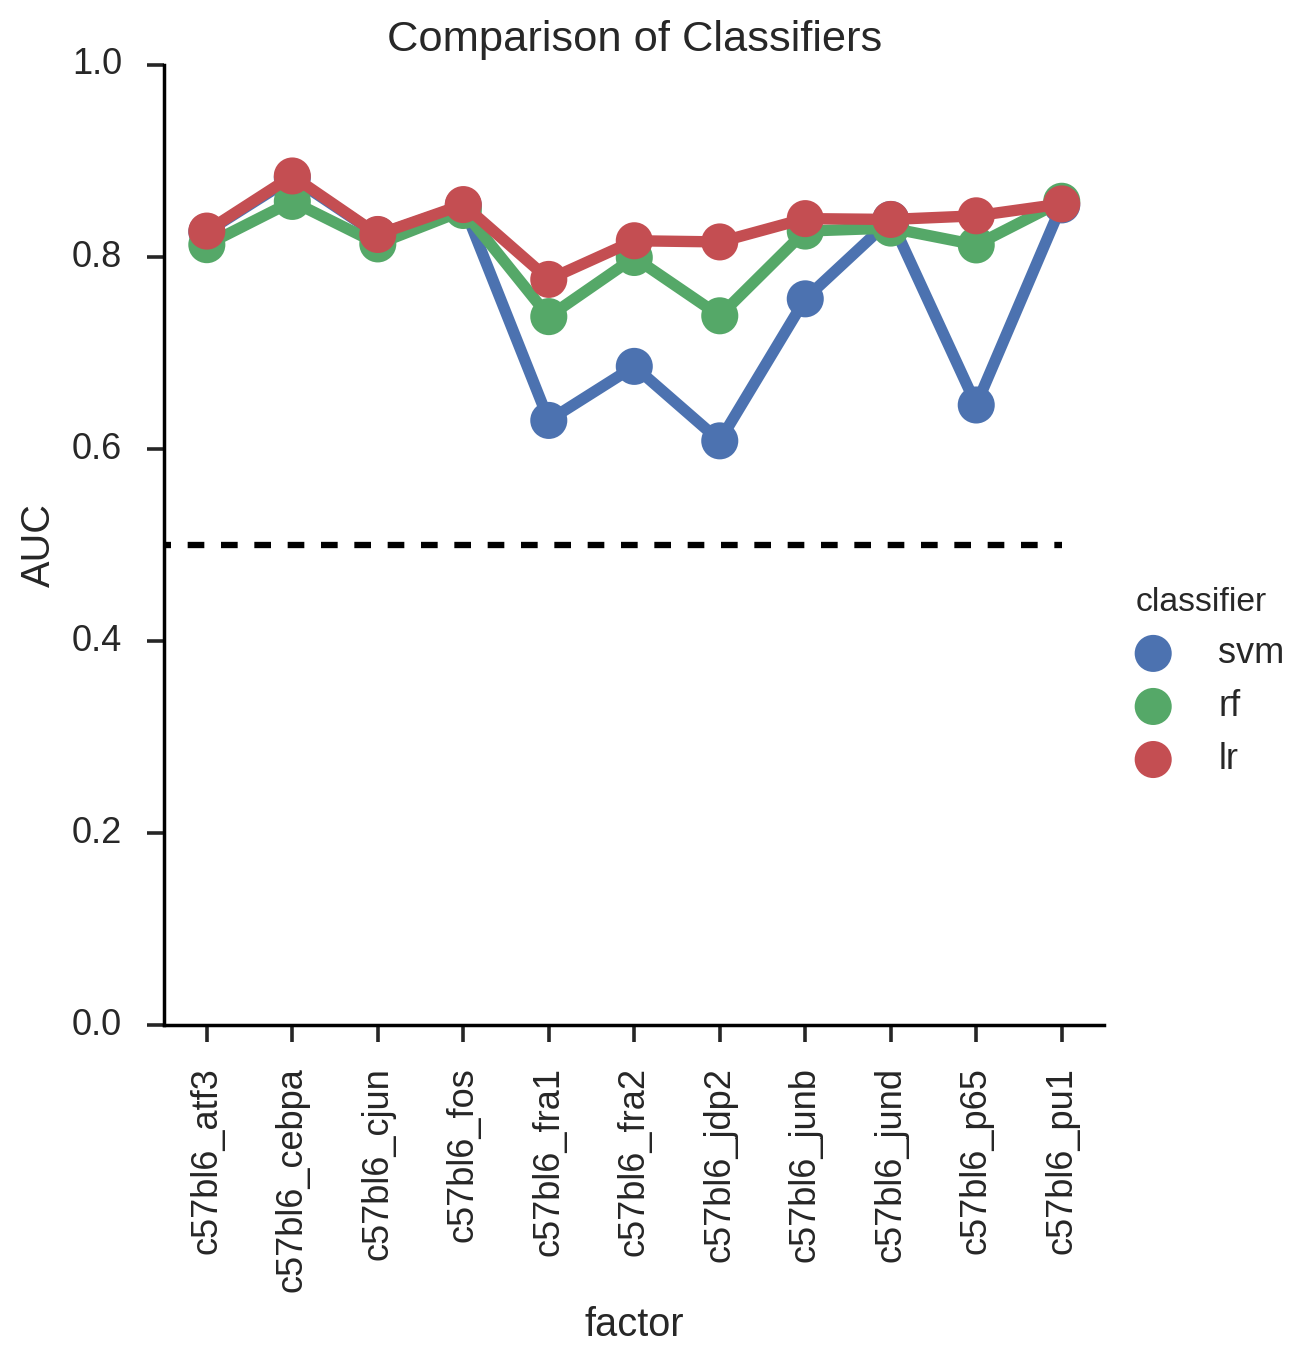

In [102]:
with sns.axes_style('ticks',{'axes.edgecolor': 'black',
                    
                         }):
    sns.factorplot(data = classifier_frame, 
                   x='factor', 
                   y='AUC', 
                   hue='classifier',
                  kind='point', 
                  size=6)
    plt.xticks(rotation=90);
    plt.title('Comparison of Classifiers')
    plt.ylim(0,1)
    plt.hlines(y=0.5, xmin=-1, xmax=10, color='black', linestyle='--')
    plt.show()

## Logistic Regression Binding Predictions

### Different Test Fraction Sizes

In [ ]:
### test predictive ability with different test fraction sizes
factor_auc_dict = {}
c57bl6_indices = summary_frame[summary_frame['Factors'].str.contains('c57bl6')].index.values

for factor in [x for x in _factors if not 'atac' in x]:
    factor_auc_dict[factor] = []
    print(factor)
    for test_size in np.arange(0.1,1.0,0.1):
        features = normed_motif_frame[normed_motif_frame.index.isin(c57bl6_indices)]
        labels = summary_frame[summary_frame.index.isin(c57bl6_indices)]['Factors'].str.contains(factor)


        training_features, test_features, training_labels, test_labels = get_GC_matched_split(
            features, labels, test_size = test_size, tolerance = 0.01)
        print('test fraction:',test_size, 'num training features', len(training_features), 'num test features', len(test_features))


        #  Run classifier
        lr_classifier = sklearn.linear_model.LogisticRegression(penalty='l1')

        lr_classifier.fit(training_features, training_labels)
        # retreive probabilities for each classifier
        probas_lr = lr_classifier.predict_proba(test_features)
      
        fpr_lr, tpr_lr, thresholds_roc_lr = sklearn.metrics.roc_curve(test_labels, probas_lr[:, 1])
        roc_auc_lr = auc(fpr_lr, tpr_lr)
        factor_auc_dict[factor].append(roc_auc_lr)

auc_frame = pd.DataFrame(factor_auc_dict)
auc_frame.index = np.arange(0.1,1.0,0.1)



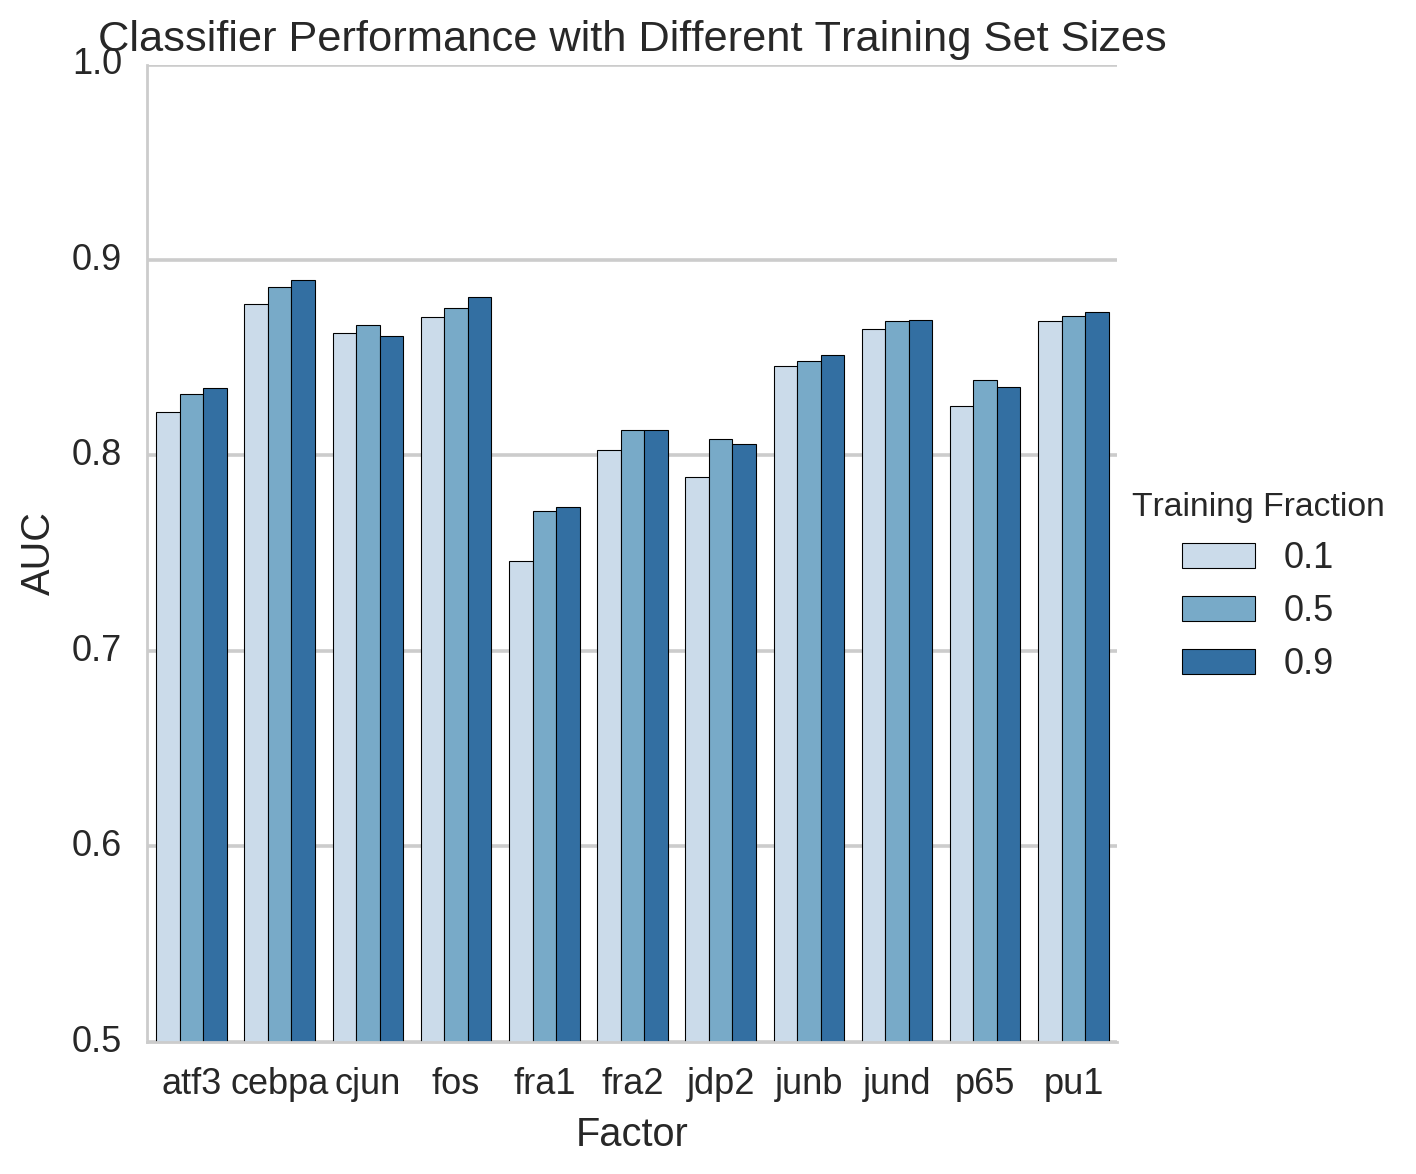

In [78]:
stacked_frame = pd.DataFrame(auc_frame.stack())
stacked_frame['Factor'] = [x[1] for x in stacked_frame.index.values]
stacked_frame['Training Fraction'] = [np.round(1- x[0],3) for x in stacked_frame.index.values]
stacked_frame.columns = ['AUC', 'Factor', 'Training Fraction']
stacked_frame.index = range(stacked_frame.shape[0])
with sns.axes_style('whitegrid'):
    sns.factorplot(data=stacked_frame[stacked_frame['Training Fraction'].isin([0.1,0.5, 0.9])], 
                   x='Factor', y='AUC', hue='Training Fraction', size=6, kind='bar', palette='Blues')
    plt.ylim(0.5,1)
    plt.title('Classifier Performance with Different Training Set Sizes')

### Regressing on Individual Motifs

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
### for all peaks in vehicle and KLA
factor_coeff_dict = {}
factor_auc_dict = {}
c57bl6_indices = summary_frame[summary_frame['Factors'].str.contains('c57bl6')].index.values
motifs = sorted(normed_motif_frame.columns.values)
for factor in _factors:
    print(factor)
    factor_coeff_dict[factor] = []
    factor_auc_dict[factor] = []
    current_coeffs = factor_coeff_dict[factor]
    current_aucs = factor_auc_dict[factor]
    for motif in motifs:
        # get features and labels
        features = normed_motif_frame[normed_motif_frame.index.isin(c57bl6_indices)][motif]
        labels = summary_frame[summary_frame.index.isin(c57bl6_indices)]['Factors'].str.contains(factor)
        # split test and training data
        training_features, test_features, training_labels, test_labels = get_GC_matched_split(
            features, labels, test_size = 0.5, tolerance = 0.01)
        training_features = training_features.reshape(training_features.shape[0],1)
        test_features = test_features.reshape(test_features.shape[0],1)
        training_labels = training_labels.reshape(training_labels.shape[0],1)
        test_labels = test_labels.reshape(test_labels.shape[0],1)
        lr_classifier = sklearn.linear_model.LogisticRegression(penalty='l1')
        
        #  Run classifier        
        lr_classifier.fit(training_features, training_labels)
        # retreive probabilities for each classifier
        probas_lr = lr_classifier.predict_proba(test_features)
        # retrieve coefficient
        coefficient = lr_classifier.coef_[0][0]

        fpr, tpr, thresholds_roc_lr = sklearn.metrics.roc_curve(test_labels, probas_lr[:, 1])
        roc_auc = auc(fpr, tpr)

        current_coeffs.append(coefficient)
        current_aucs.append(roc_auc)
        print(motif,coefficient,roc_auc)

coefficients_frame_ind = pd.DataFrame(factor_coeff_dict)
coefficients_frame_ind = coefficients_frame_ind[sorted(_factors)]
coefficients_frame_ind.index = motifs

auc_frame_ind = pd.DataFrame(factor_auc_dict)
auc_frame_ind = auc_frame_ind[sorted(_factors)]
auc_frame_ind.index = motifs

total: 81822 filtered: 65396 true gc: 0.47324 false gc: 0.48324 difference: 0.01


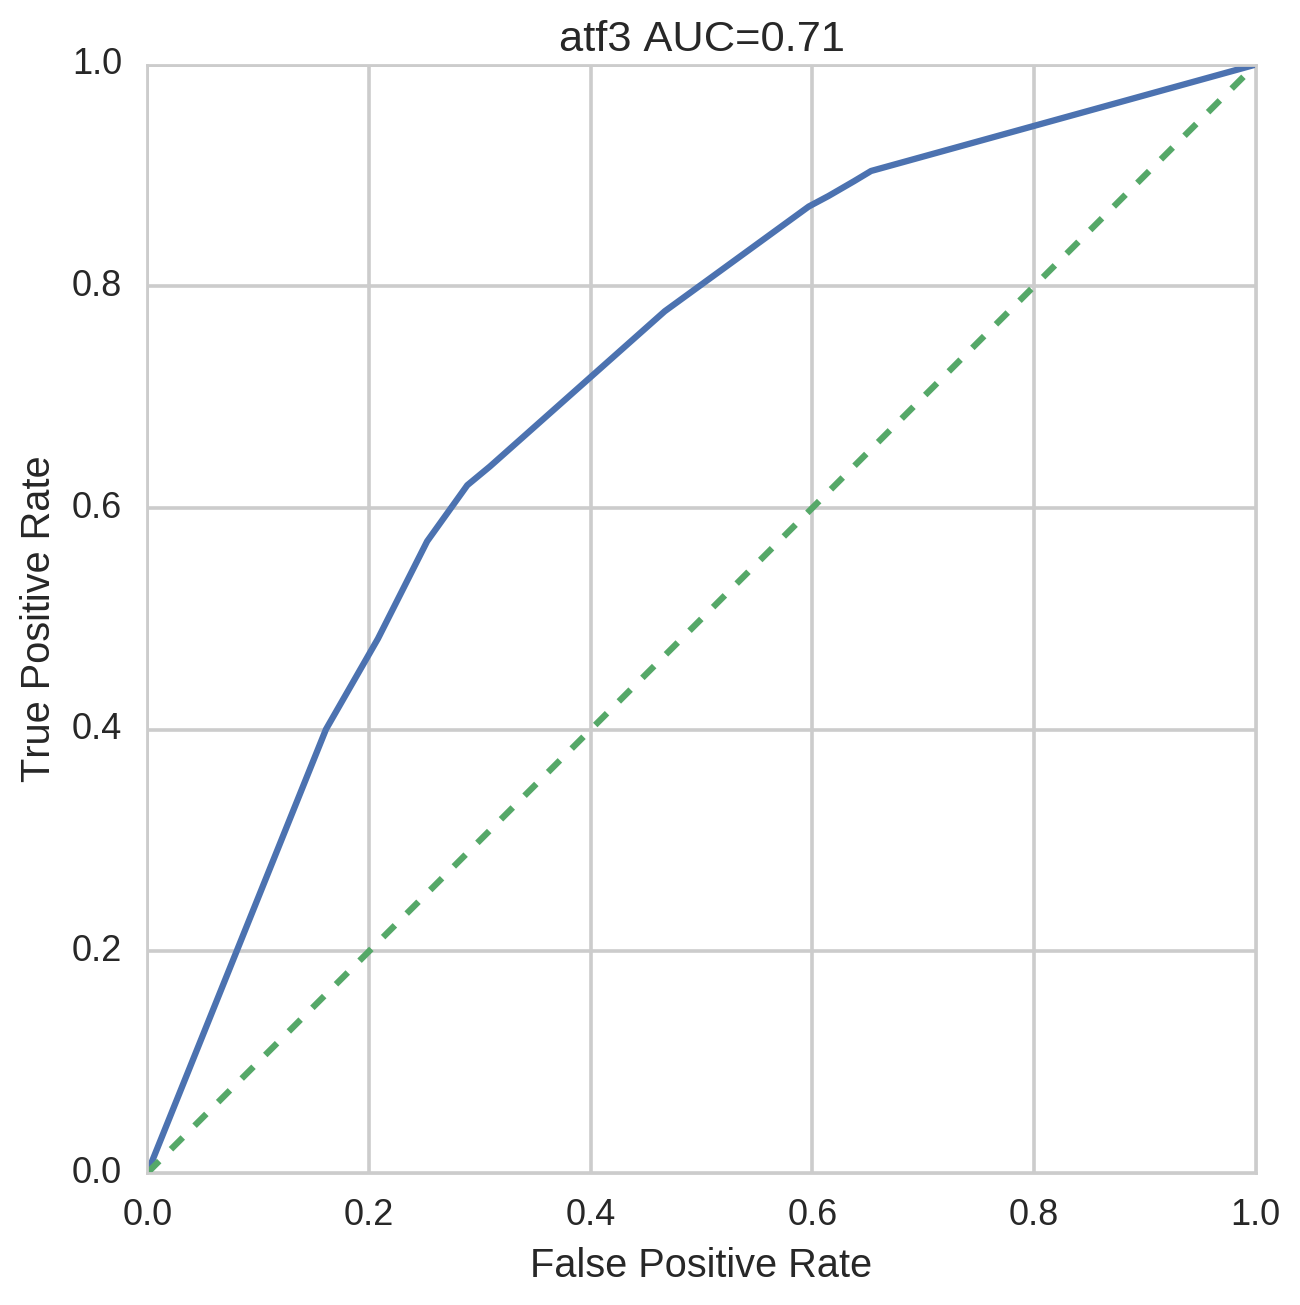

total: 81822 filtered: 62646 true gc: 0.4695 false gc: 0.4795 difference: 0.01


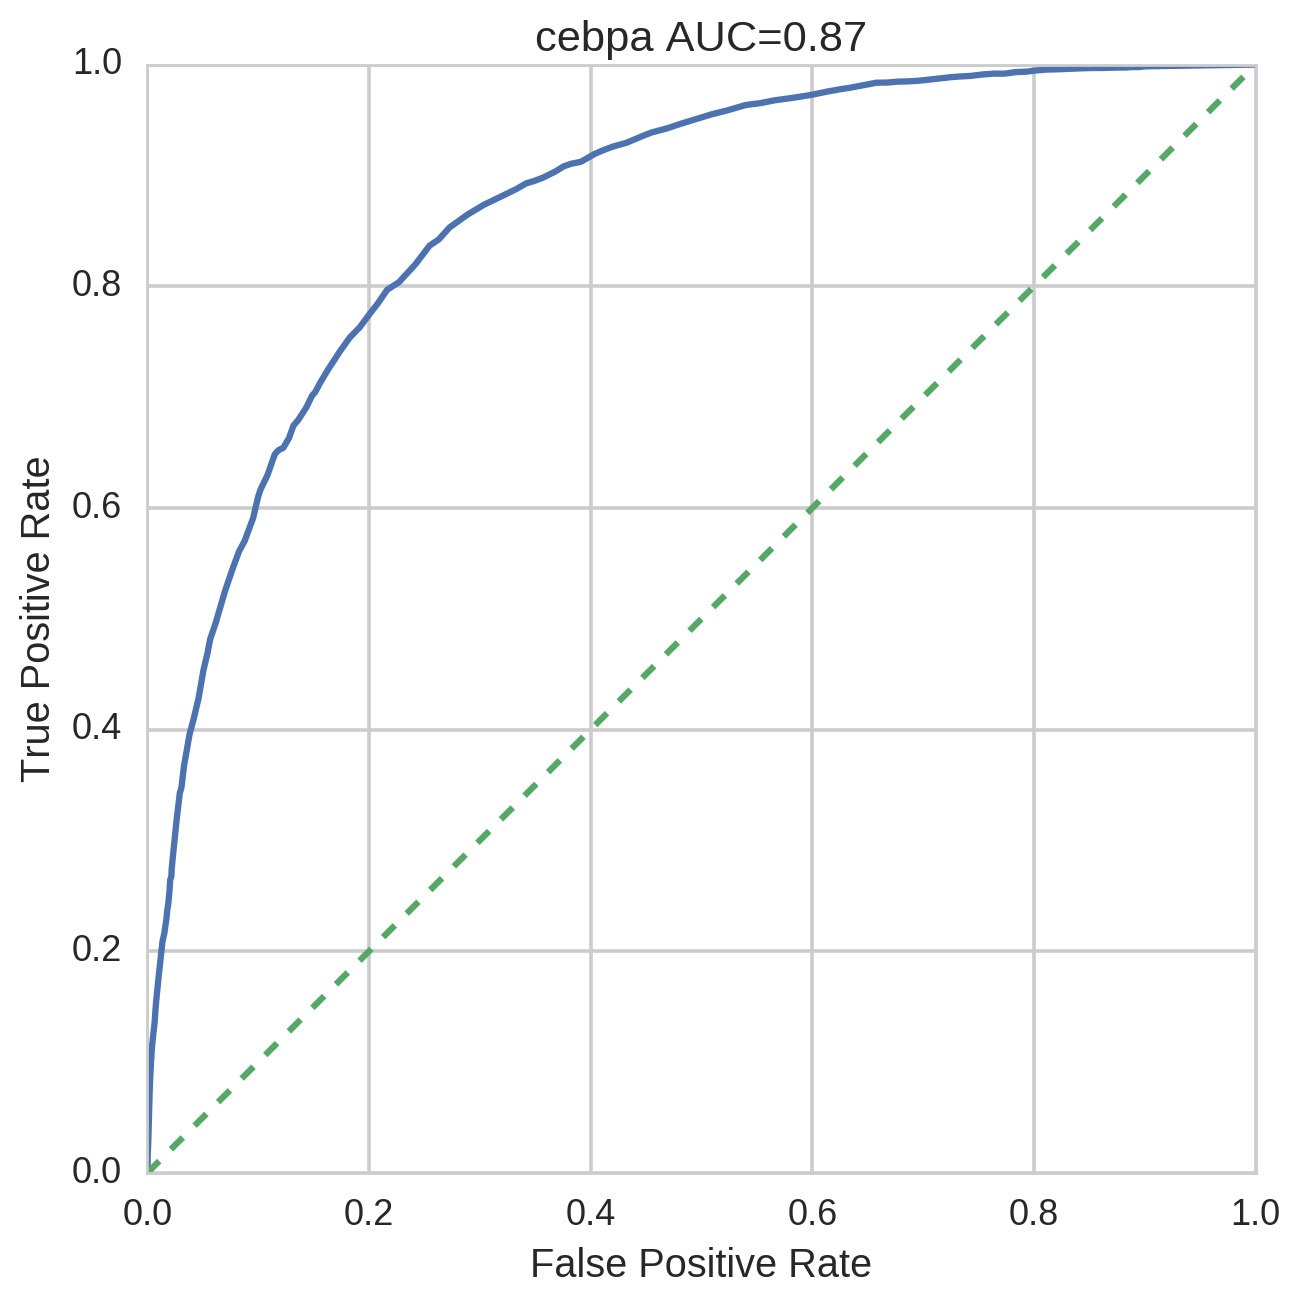

total: 81822 filtered: 80565 true gc: 0.49458 false gc: 0.50457 difference: 0.01


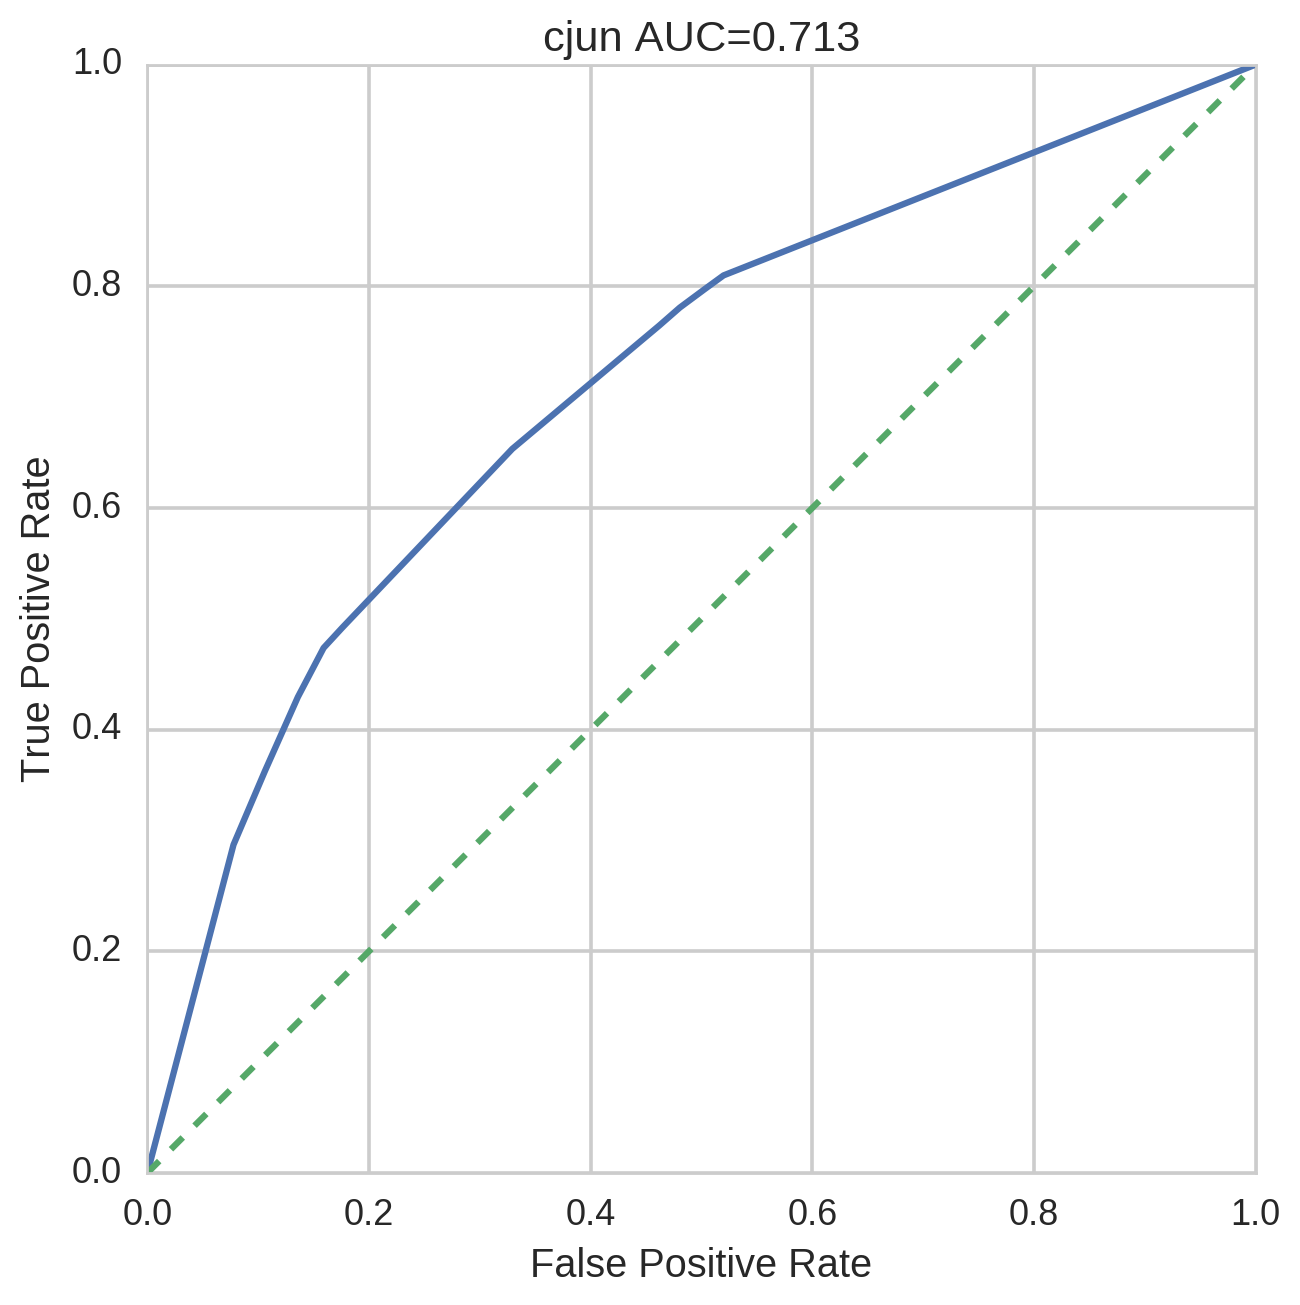

total: 81822 filtered: 78771 true gc: 0.49282 false gc: 0.50282 difference: 0.01


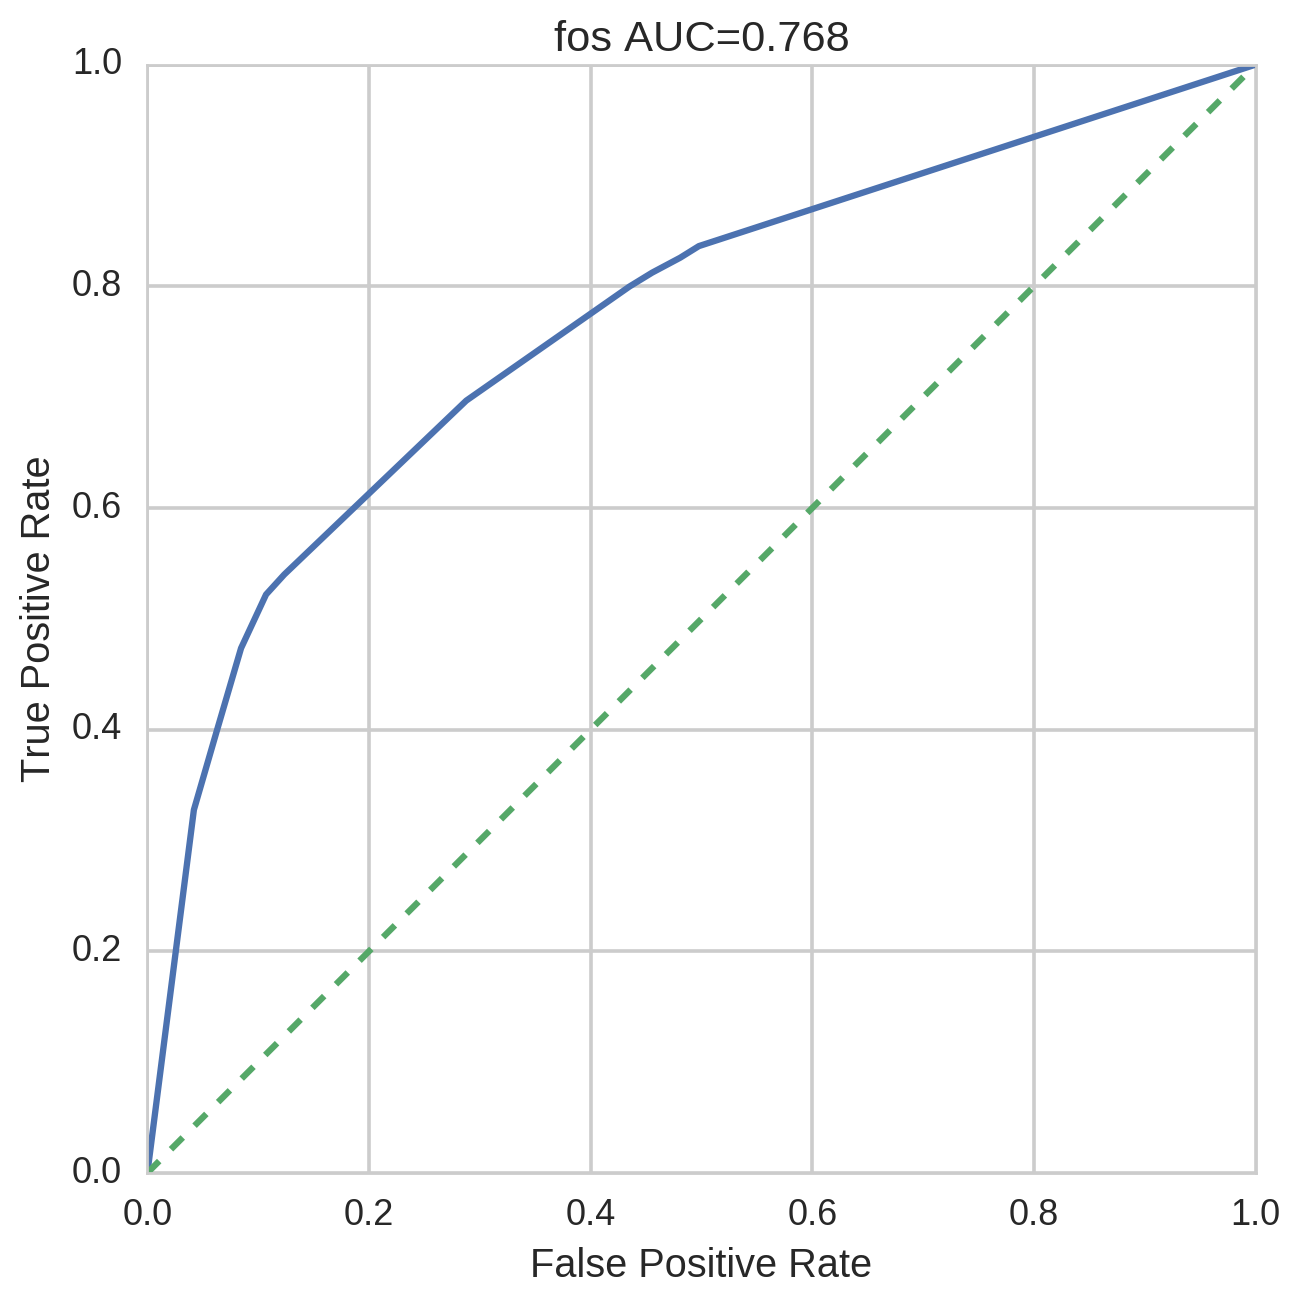

total: 81822 filtered: 59292 true gc: 0.5283 false gc: 0.5183 difference: 0.01


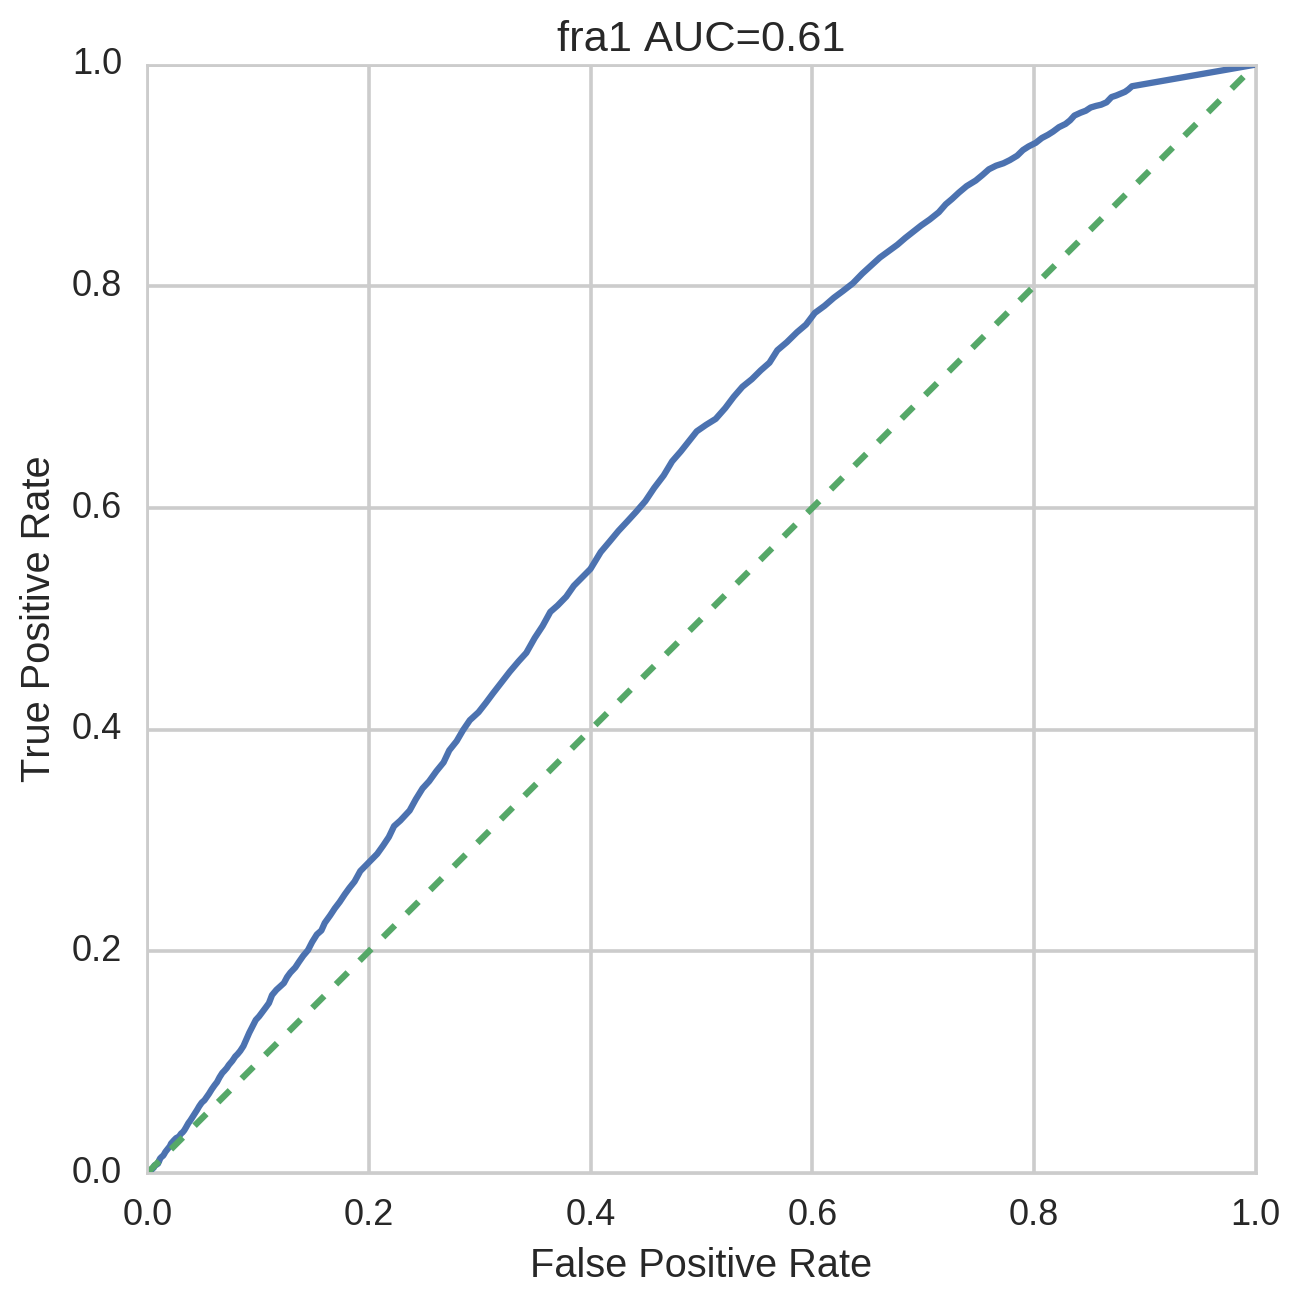

total: 81822 filtered: 81822 true gc: 0.50569 false gc: 0.49784 difference: 0.00784


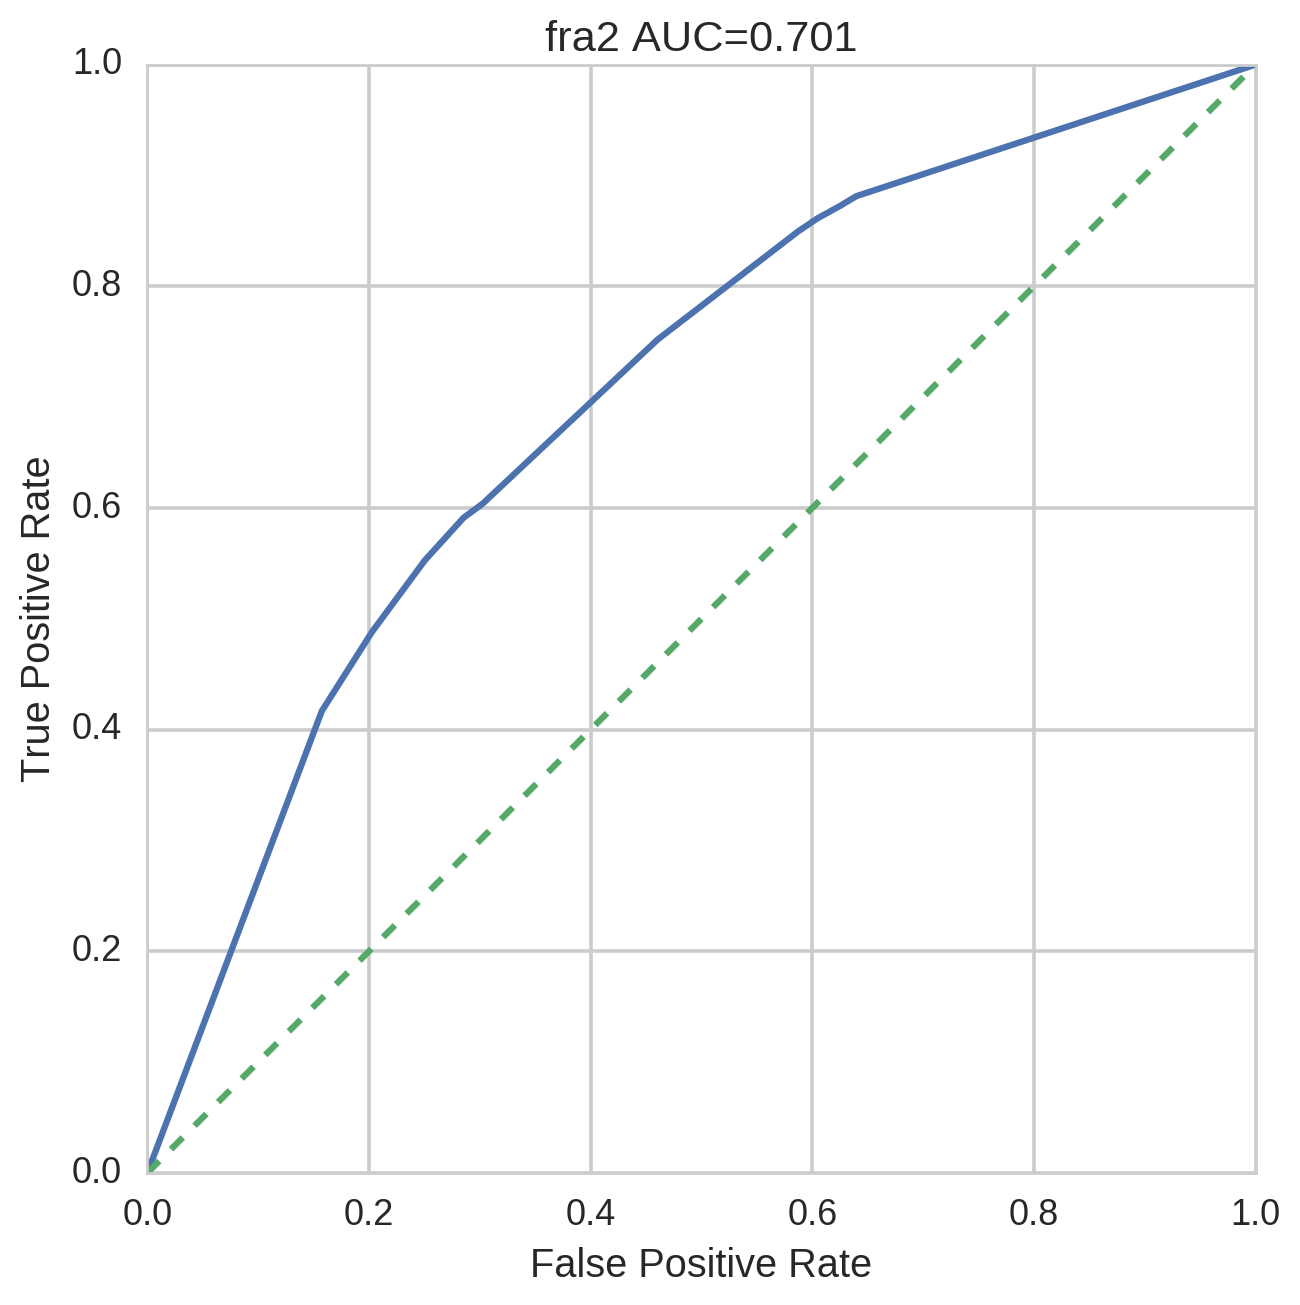

total: 81822 filtered: 81822 true gc: 0.49066 false gc: 0.49979 difference: 0.00913


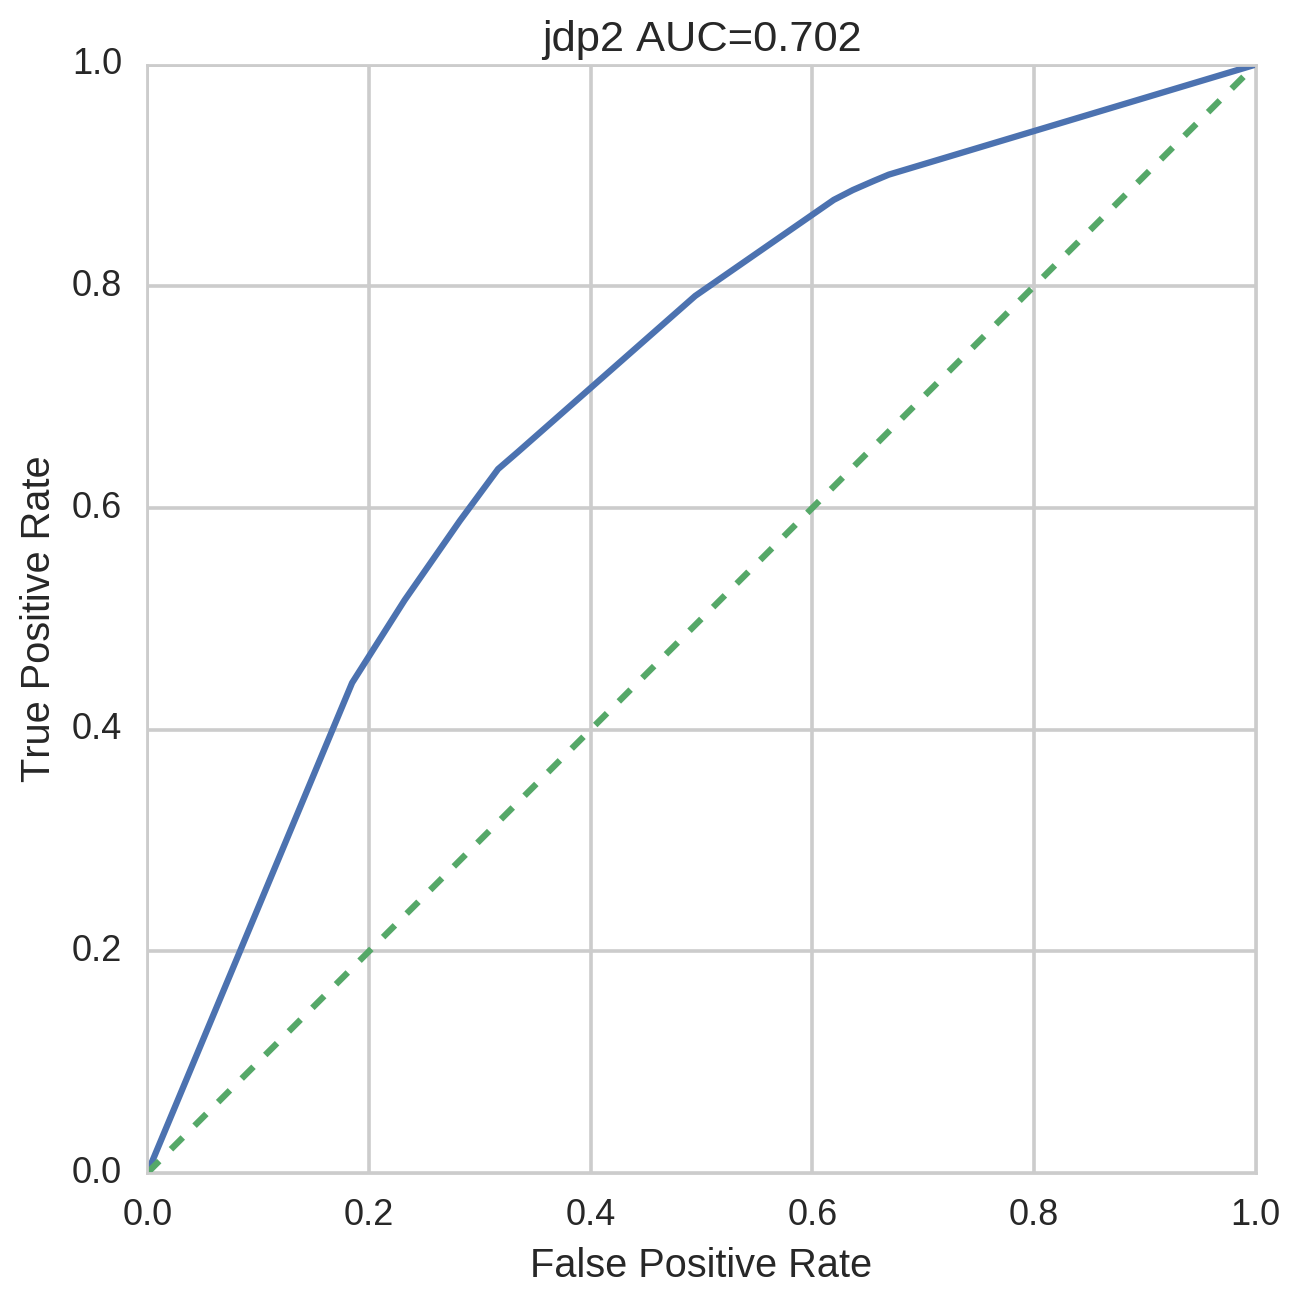

total: 81822 filtered: 74632 true gc: 0.48689 false gc: 0.49689 difference: 0.00999


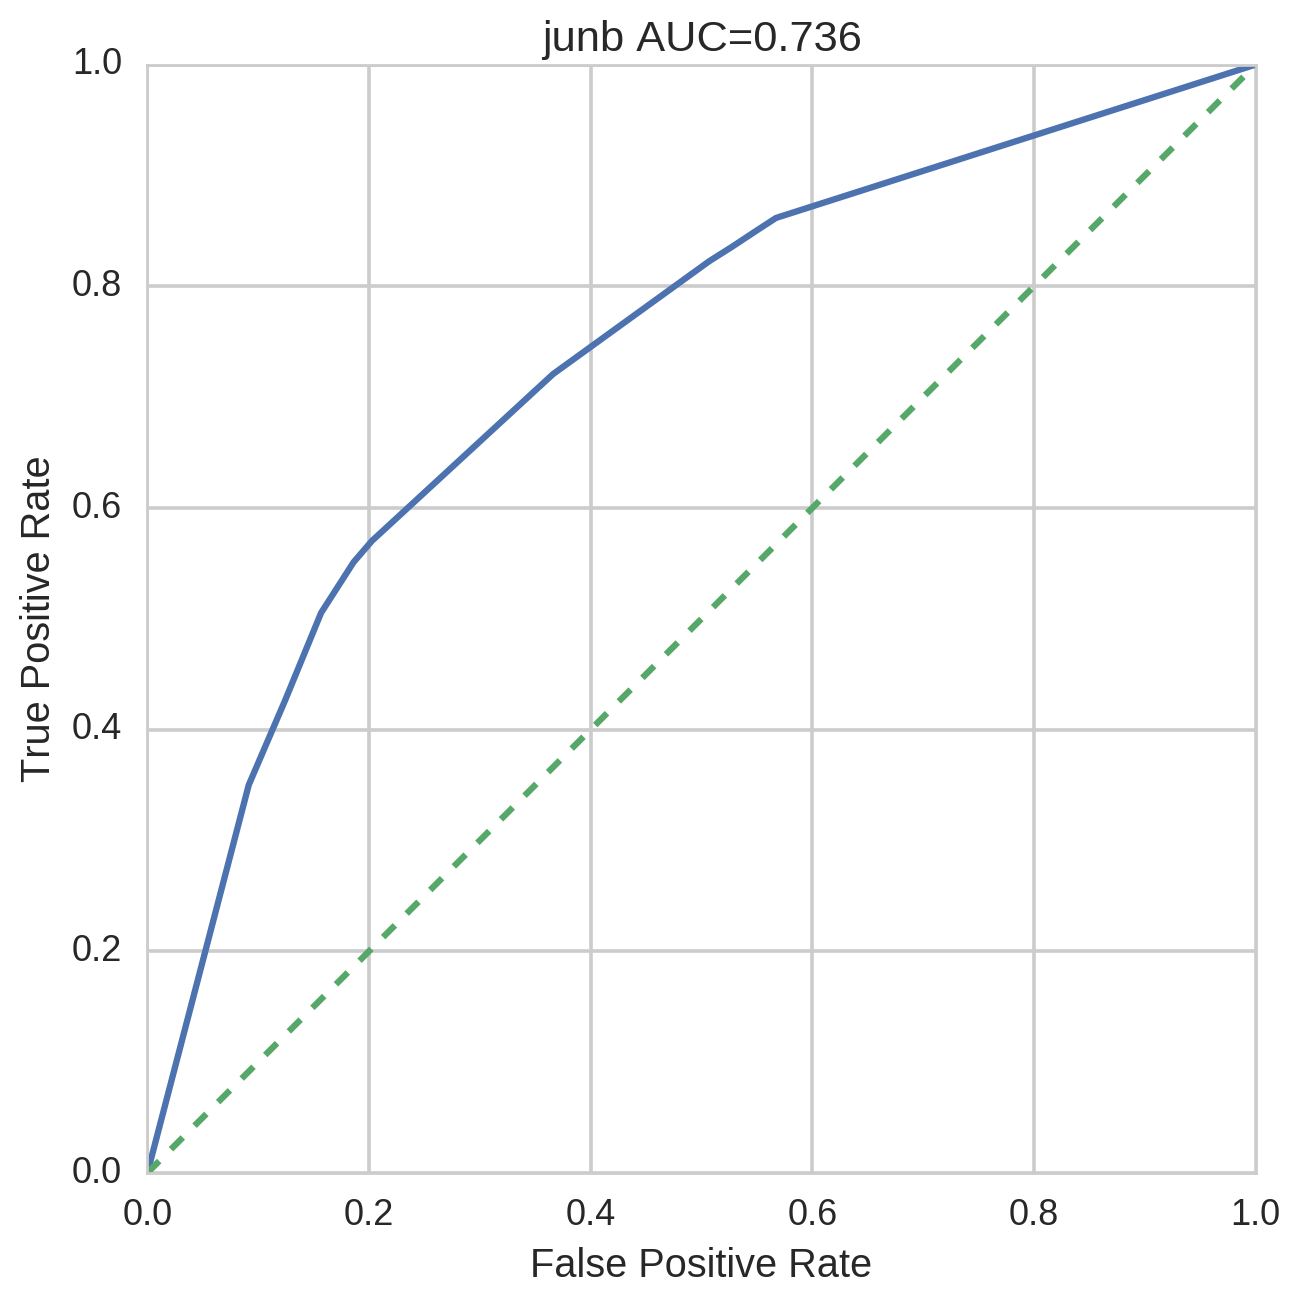

total: 81822 filtered: 81822 true gc: 0.50216 false gc: 0.49367 difference: 0.00849


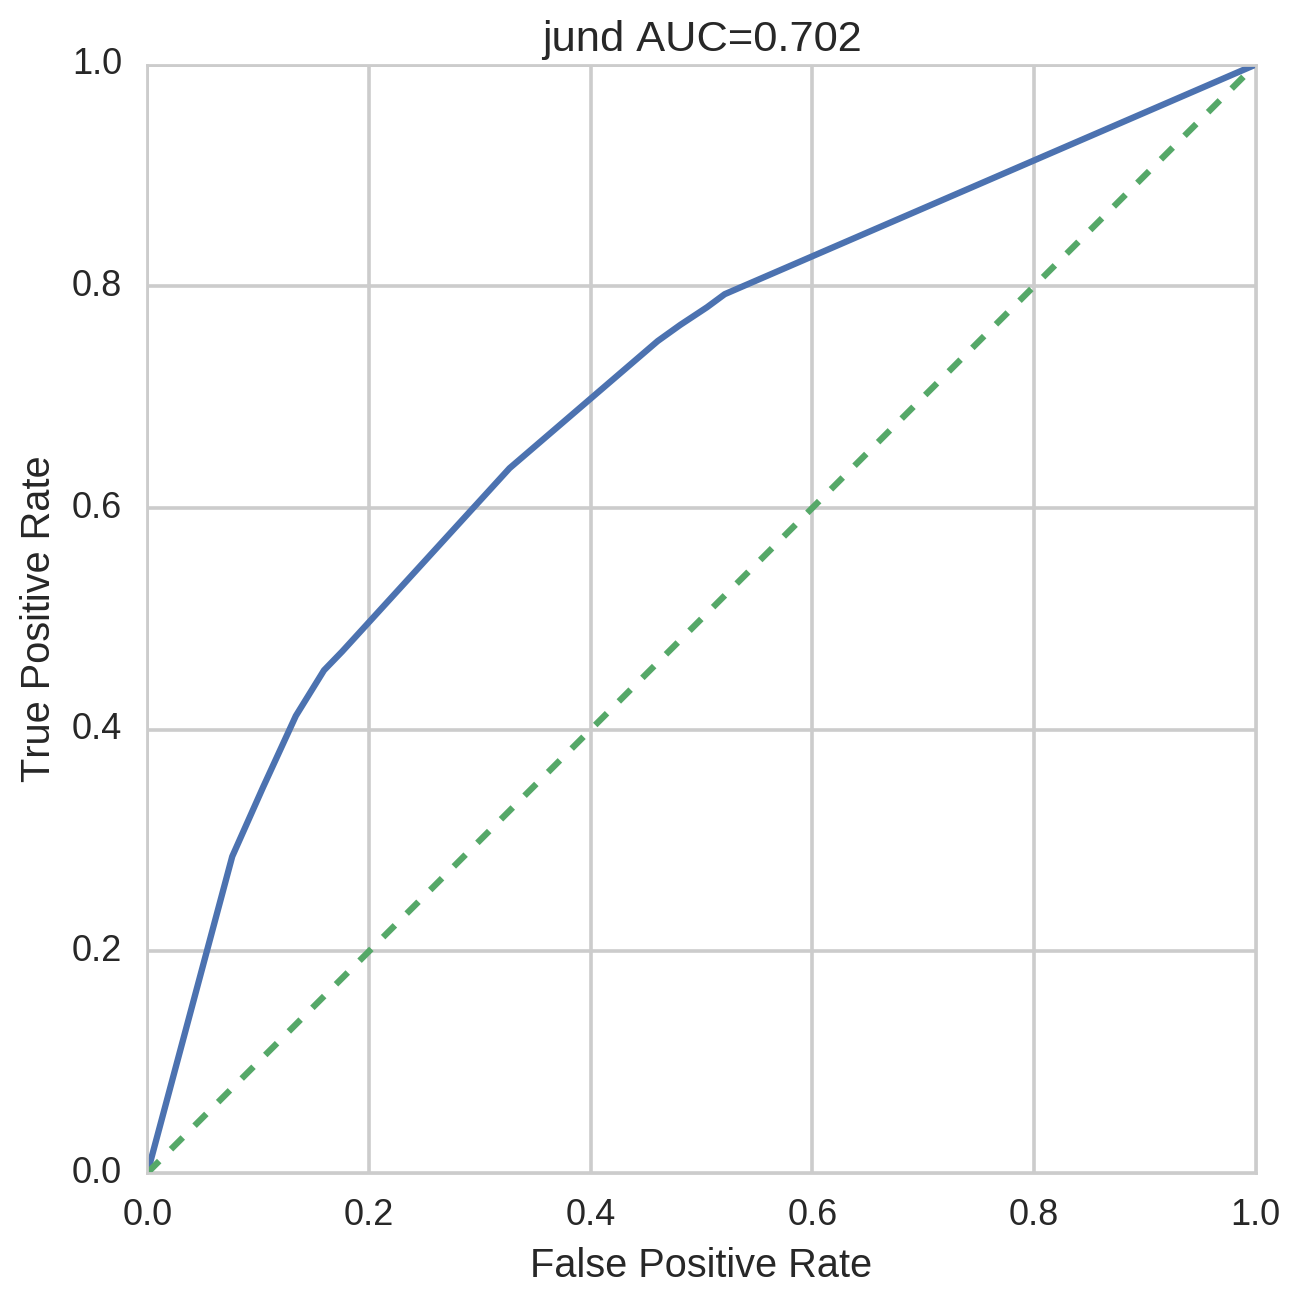

total: 81822 filtered: 76158 true gc: 0.51219 false gc: 0.50219 difference: 0.01


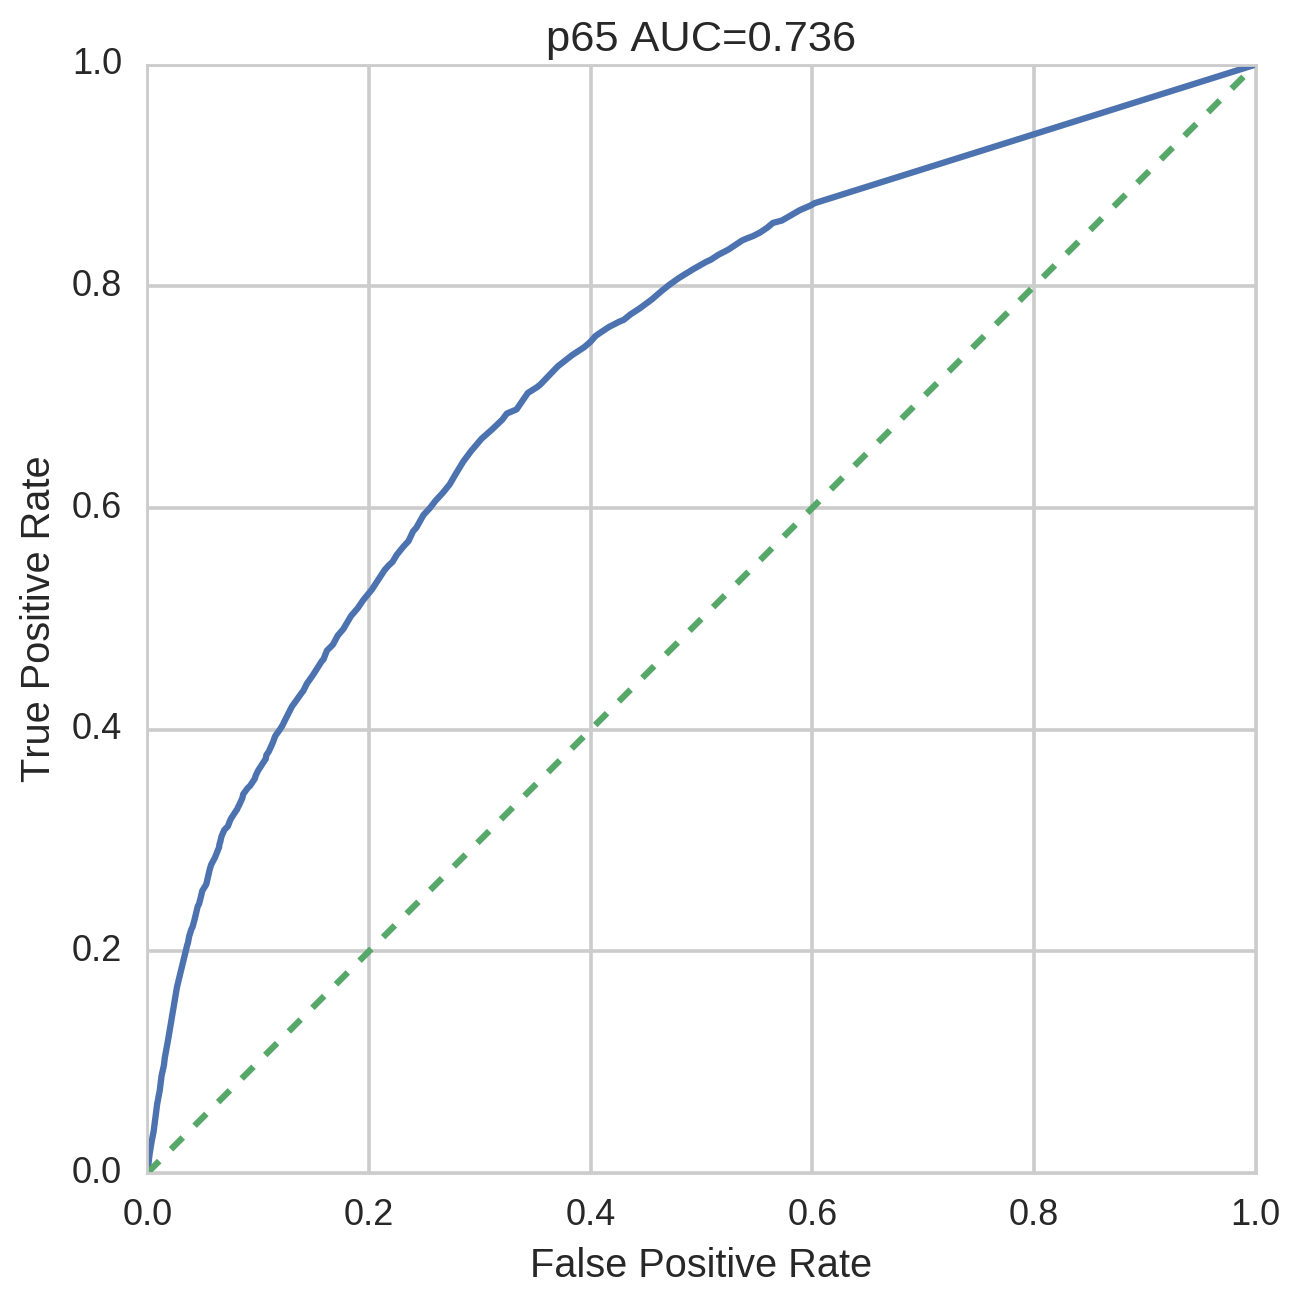

total: 81822 filtered: 78495 true gc: 0.49373 false gc: 0.50372 difference: 0.01


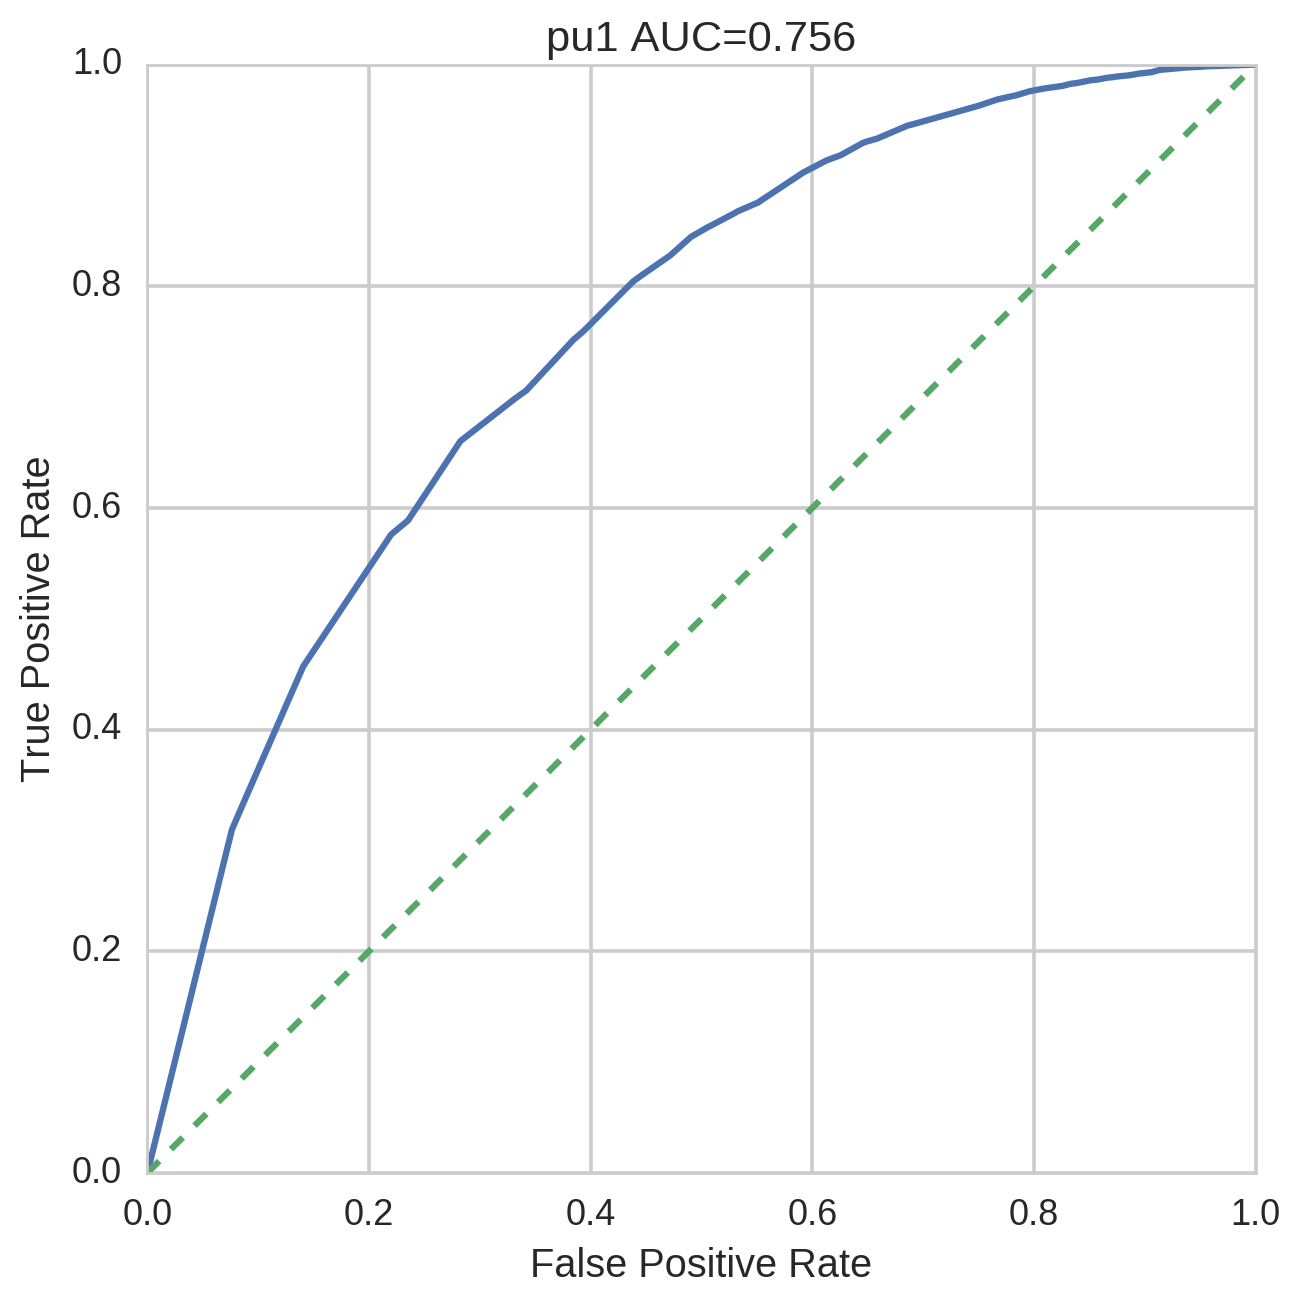

In [79]:
### roc curve for best motif ###
c57bl6_indices = summary_frame[summary_frame['Factors'].str.contains('c57bl6')].index.values

for factor, motif in tuple(zip(auc_frame_ind.idxmax().index.values,auc_frame_ind.idxmax())):
    features = normed_motif_frame[normed_motif_frame.index.isin(c57bl6_indices)][motif]
    labels = summary_frame[summary_frame.index.isin(c57bl6_indices)]['Factors'].str.contains(factor)
    training_features, test_features, training_labels, test_labels = get_GC_matched_split(
        features, labels, test_size = 0.5, tolerance = 0.01)
    training_features = training_features.reshape(training_features.shape[0],1)
    test_features = test_features.reshape(test_features.shape[0],1)
    training_labels = training_labels.reshape(training_labels.shape[0],1)
    test_labels = test_labels.reshape(test_labels.shape[0],1)
    lr_classifier = sklearn.linear_model.LogisticRegression(penalty='l1')
    #  Run classifier
    lr_classifier = sklearn.linear_model.LogisticRegression(penalty='l1')
    
    lr_classifier.fit(training_features, training_labels)
    # retreive probabilities for each classifier
    probas_lr = lr_classifier.predict_proba(test_features)
    with sns.axes_style('whitegrid'):
        fpr, tpr, thresholds_roc_lr = sklearn.metrics.roc_curve(test_labels, probas_lr[:, 1])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr)
        plt.plot([0,1],[0,1],linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(factor+' AUC='+str(np.round(roc_auc,3)))
        plt.gca().set_aspect('equal') 
        plt.show()

In [86]:
### for all peaks in vehicle and KLA
factor_coeff_dict = {}
factor_auc_dict_all = {}
c57bl6_indices = summary_frame[summary_frame['Factors'].str.contains('c57bl6')].index.values
for factor in [x for x in _factors if not 'atac' in x]:
    features = normed_motif_frame[normed_motif_frame.index.isin(c57bl6_indices)]
    labels = summary_frame[summary_frame.index.isin(c57bl6_indices)]['Factors'].str.contains(factor)
    

    training_features, test_features, training_labels, test_labels = get_GC_matched_split(
        features, labels, test_size = 0.5, tolerance = 0.01)
    
    #  Run classifier
    lr_classifier = sklearn.linear_model.LogisticRegression(penalty='l1')
    
    lr_classifier.fit(training_features, training_labels)
    # retreive probabilities for each classifier
    probas_lr = lr_classifier.predict_proba(test_features)
    
    fpr, tpr, thresholds_roc_lr = sklearn.metrics.roc_curve(test_labels, probas_lr[:, 1])
    roc_auc = auc(fpr, tpr)
        
    coefficients = lr_classifier.coef_    
    factor_coeff_dict[factor] = coefficients.flatten()
    factor_auc_dict_all[factor] = roc_auc
    print(factor, roc_auc)
    
coefficients_frame_all = pd.DataFrame(factor_coeff_dict)
coefficients_frame_all = coefficients_frame_all[sorted(_factors)]
coefficients_frame_all.index = motif_score_frame.columns.values[3:]


total: 81822 filtered: 65122 true gc: 0.47324 false gc: 0.48324 difference: 0.01
atf3 0.830744652268
total: 81822 filtered: 62687 true gc: 0.4695 false gc: 0.4795 difference: 0.00999
cebpa 0.88528296406
total: 81822 filtered: 80595 true gc: 0.49458 false gc: 0.50457 difference: 0.01
cjun 0.868092073655
total: 81822 filtered: 78885 true gc: 0.49282 false gc: 0.50282 difference: 0.01
fos 0.877798894485
total: 81822 filtered: 59270 true gc: 0.5283 false gc: 0.5183 difference: 0.01
fra1 0.772101765193
total: 81822 filtered: 81822 true gc: 0.50569 false gc: 0.49784 difference: 0.00784
fra2 0.814494234916
total: 81822 filtered: 81822 true gc: 0.49066 false gc: 0.49979 difference: 0.00913
jdp2 0.80941840502
total: 81822 filtered: 74723 true gc: 0.48689 false gc: 0.49689 difference: 0.01
junb 0.850471506212
total: 81822 filtered: 81822 true gc: 0.50216 false gc: 0.49367 difference: 0.00849
jund 0.869970710772
total: 81822 filtered: 76163 true gc: 0.51219 false gc: 0.50219 difference: 0.01
p65 

In [87]:
### for all peaks in vehicle and KLA using significant motifs
threshold = 2
# mean = np.mean(coefficients_frame_all.values)
# std = np.std(coefficients_frame_all.values)
factor_motifs_dict = {}
significant_motifs = set()
for factor in coefficients_frame_all.columns.values:
    weights = coefficients_frame_all[factor]
    std = np.std(weights)
    mean = np.mean(weights)
    positive_hits = list(weights[weights >= mean + threshold*std].index.values)
    negative_hits = list(weights[weights <= mean - threshold*std].index.values)
    motif_hits = negative_hits + positive_hits
    for m in motif_hits:
        significant_motifs.add(m)
    print(factor, mean-threshold*std, mean+threshold*std, len(negative_hits), len(positive_hits))

    factor_motifs_dict[factor] = motif_hits
significant_motifs = sorted(significant_motifs)
    
factor_coeff_dict = {}
factor_auc_dict_all_best = {}
c57bl6_indices = summary_frame[summary_frame['Factors'].str.contains('c57bl6')].index.values

for factor in _factors:
    features = normed_motif_frame[normed_motif_frame.index.isin(c57bl6_indices)][significant_motifs]
    labels = summary_frame[summary_frame.index.isin(c57bl6_indices)]['Factors'].str.contains(factor)
    

    training_features, test_features, training_labels, test_labels = get_GC_matched_split(
        features, labels, test_size = 0.5, tolerance = 0.01)
    
    #  Run classifier
    lr_classifier = sklearn.linear_model.LogisticRegression(penalty='l1')
    
    lr_classifier.fit(training_features, training_labels)
    # retreive probabilities for each classifier
    probas_lr = lr_classifier.predict_proba(test_features)
    
    fpr, tpr, thresholds_roc_lr = sklearn.metrics.roc_curve(test_labels, probas_lr[:, 1])
    roc_auc = auc(fpr, tpr)
        
    coefficients = lr_classifier.coef_    
    factor_coeff_dict[factor] = coefficients.flatten()
    factor_auc_dict_all_best[factor] = roc_auc
    print(factor, roc_auc)
    
coefficients_frame_all_best = pd.DataFrame(factor_coeff_dict)
coefficients_frame_all_best = coefficients_frame_all_best[sorted(_factors)]
coefficients_frame_all_best.index = significant_motifs



atf3 -0.532967820577 0.756539023593 2 7
cebpa -1.22714372378 1.37127103288 0 2
cjun -0.441969725911 0.828564449106 3 7
fos -0.569317962097 0.863620981252 2 6
fra1 -0.444118109377 0.613478202593 3 4
fra2 -0.438097519022 0.612867900523 6 3
jdp2 -0.510294235295 0.688152198083 3 6
junb -0.511838590153 0.784668681444 3 6
jund -0.478302961858 0.85390380022 3 7
p65 -0.607978802643 0.791130170269 2 4
pu1 -0.836014770242 1.11365565695 1 5
total: 81822 filtered: 65244 true gc: 0.47324 false gc: 0.48324 difference: 0.01
atf3 0.812448611995
total: 81822 filtered: 62783 true gc: 0.4695 false gc: 0.4795 difference: 0.01
cebpa 0.87909808467
total: 81822 filtered: 80580 true gc: 0.49458 false gc: 0.50458 difference: 0.01
cjun 0.838952119853
total: 81822 filtered: 78896 true gc: 0.49282 false gc: 0.50282 difference: 0.01
fos 0.859482075085
total: 81822 filtered: 59240 true gc: 0.5283 false gc: 0.5183 difference: 0.01
fra1 0.726623823629
total: 81822 filtered: 81822 true gc: 0.50569 false gc: 0.49784 di

In [88]:
auc_frame_ind.idxmax()

atf3     ap-1
cebpa    cebp
cjun     ap-1
fos      ap-1
fra1      zfx
fra2     ap-1
jdp2     ap-1
junb     ap-1
jund     ap-1
p65       rel
pu1      spib
dtype: object

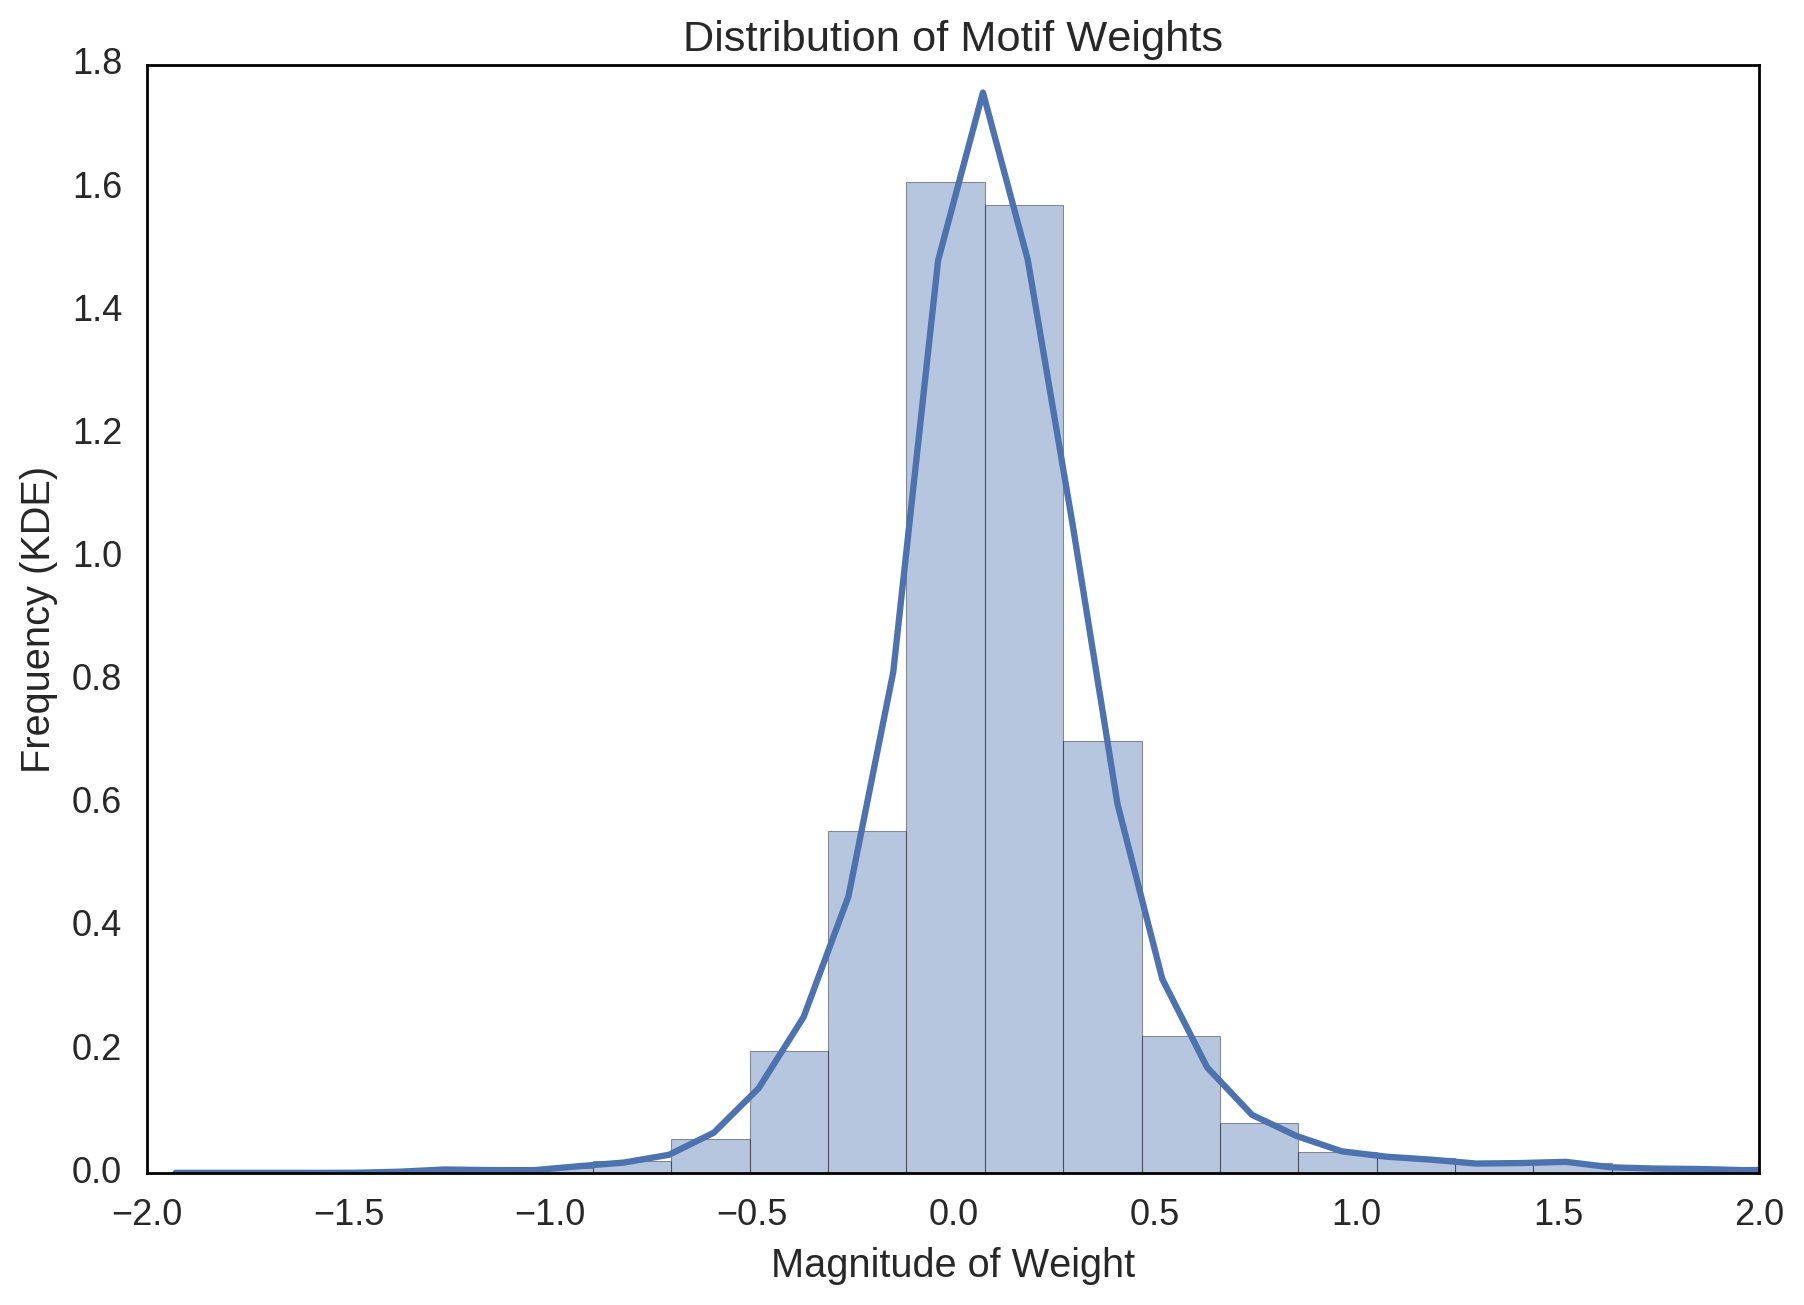

In [97]:
with sns.axes_style('whitegrid',{'axes.grid':False,'axes.edgecolor':'black'}):
    sns.distplot(coefficients_frame_all.values.flatten())
    plt.xlabel('Magnitude of Weight')
    plt.ylabel('Frequency (KDE)')
    plt.xlim(-2,2)
    plt.title('Distribution of Motif Weights')

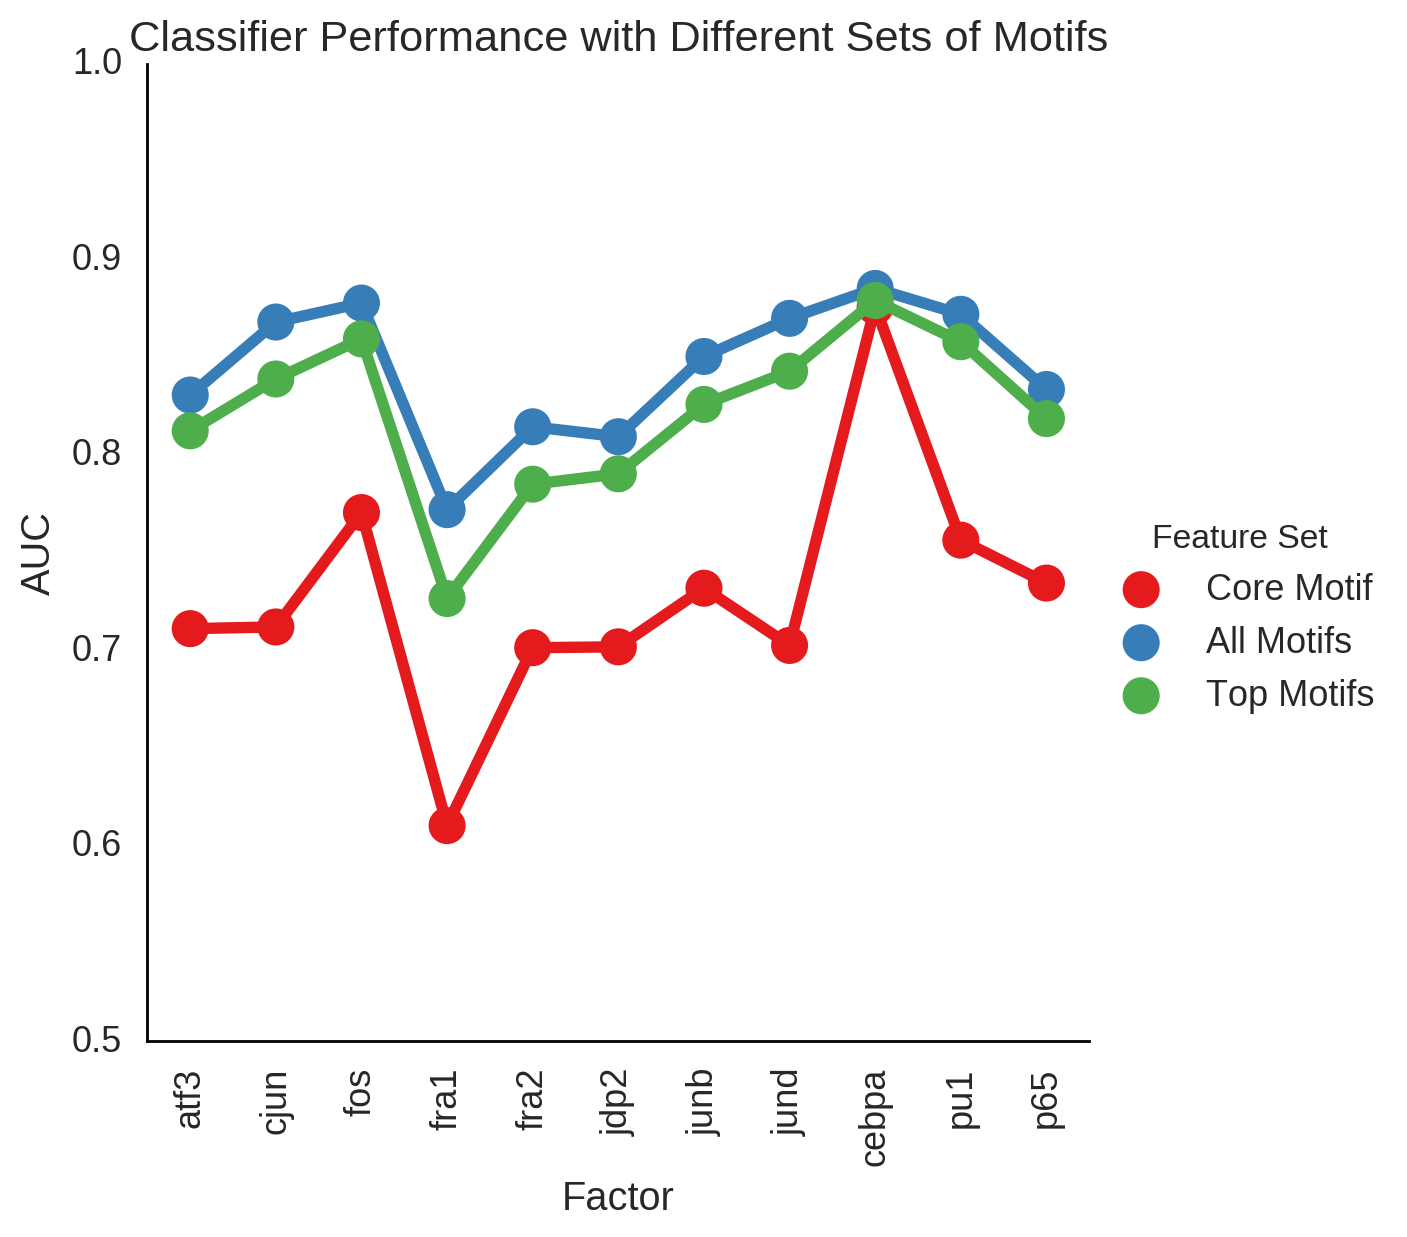

In [98]:
ind_max_aucs = auc_frame_ind.max()
factors = []
aucs = []
features = []
for factor in sorted(factor_auc_dict_all.keys()):
    factors = factors + 3 * [factor]
    features = features + ['Core Motif', 'All Motifs', 'Top Motifs']
    aucs.append(ind_max_aucs[factor])
    aucs.append(factor_auc_dict_all[factor])
    aucs.append(factor_auc_dict_all_best[factor])
with sns.axes_style('whitegrid',{'axes.grid':False,'axes.edgecolor':'black'}):
    plottingFrame = sns.factorplot(data = pd.DataFrame({'Factor':factors,
                                                         'AUC':aucs,
                                                         'Feature Set':features}),
                                x='Factor',
                                y='AUC',
                                hue='Feature Set',
                                palette='Set1',
                                size=6,
                                order = ['atf3', 'cjun', 'fos', 'fra1', 'fra2', 'jdp2', 'junb','jund','cebpa','pu1','p65'])
    plt.xticks(rotation=90)
    plt.ylim(0.5,1)
    plt.title('Classifier Performance with Different Sets of Motifs')

In [ ]:
### for all vehicle peaks
factor_coeff_dict = {}
c57bl6_indices = summary_frame[summary_frame[['c57bl6_' + x + '_veh' for x in _factors]].sum(axis=1) > 0].index.values


for factor in _factors:
    features = normed_motif_frame[normed_motif_frame.index.isin(c57bl6_indices)]
    labels = summary_frame[summary_frame.index.isin(c57bl6_indices)]['Factors'].str.contains(factor + '_veh')
    
    training_features, test_features, training_labels, test_labels = get_GC_matched_split(
        features, labels, test_size = 0.5, tolerance = 0.01)
    
    #  Run classifier
    lr_classifier = sklearn.linear_model.LogisticRegression(penalty='l1')
    
    lr_classifier.fit(training_features, training_labels)
    # retreive probabilities for each classifier
    probas_lr = lr_classifier.predict_proba(test_features)
    # retrieve predictions for each classifier
    predictions_lr = lr_classifier.predict(test_features)
    
    coefficients = lr_classifier.coef_
    intercept = lr_classifier.intercept_
    
    factor_coeff_dict[factor] = coefficients.flatten()
coefficients_frame_veh = pd.DataFrame(factor_coeff_dict)
coefficients_frame_veh = coefficients_frame_veh[sorted(_factors)]
coefficients_frame_veh.index = motif_score_frame.columns.values[3:]



In [ ]:
### for all KLA peaks
factor_coeff_dict = {}
c57bl6_indices = summary_frame[summary_frame[['c57bl6_' + x + '_kla' for x in _factors]].sum(axis=1) > 0].index.values


for factor in _factors:
    features = normed_motif_frame[normed_motif_frame.index.isin(c57bl6_indices)]
    labels = summary_frame[summary_frame.index.isin(c57bl6_indices)]['Factors'].str.contains(factor + '_kla')

    training_features, test_features, training_labels, test_labels = get_GC_matched_split(
        features, labels, test_size = 0.5, tolerance = 0.01)
    
    #  Run classifier
    lr_classifier = sklearn.linear_model.LogisticRegression(penalty='l1')
    
    lr_classifier.fit(training_features, training_labels)
    # retreive probabilities for each classifier
    probas_lr = lr_classifier.predict_proba(test_features)
    # retrieve predictions for each classifier
    predictions_lr = lr_classifier.predict(test_features)
    
    coefficients = lr_classifier.coef_
    intercept = lr_classifier.intercept_
    
    factor_coeff_dict[factor] = coefficients.flatten()
coefficients_frame_kla = pd.DataFrame(factor_coeff_dict)
coefficients_frame_kla = coefficients_frame_kla[sorted(_factors)]
coefficients_frame_kla.index = motif_score_frame.columns.values[3:]




In [ ]:
### plot coefficents for both vehicle and kla
threshold = 2.5
coeff_std = np.std(coefficients_frame_all.values.flatten())
coeff_mean = np.mean(coefficients_frame_all.values.flatten())

cg = sns.clustermap(coefficients_frame_all[(coefficients_frame_all.max(axis=1) > coeff_mean + threshold* coeff_std) |
                                       (coefficients_frame_all.min(axis=1) < coeff_mean - threshold* coeff_std)
                                      ][['atf3', 'cjun', 'fos', 'fra1', 'fra2', 'jdp2', 'junb','jund','cebpa','pu1','p65']],
                   vmax=(coeff_mean + threshold* coeff_std),
                   vmin=(coeff_mean - threshold* coeff_std),
                   center = coeff_mean,
                   annot=True,annot_kws={"size": 8},
                    col_cluster = False
                   )
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), fontsize=10, rotation=0);



In [ ]:
coeff_std = np.std(coefficients_frame_veh.values.flatten());
coeff_mean = np.mean(coefficients_frame_veh.values.flatten());
toExclude = ['jund', 'fos', 'junb'];
threshold =2.5;

cg = sns.clustermap(coefficients_frame_veh[
                                       (coefficients_frame_veh[[x for x in _factors if not x in toExclude]].max(axis=1) > coeff_mean + threshold* coeff_std) |
                                       (coefficients_frame_veh[[x for x in _factors if not x in toExclude]].min(axis=1) < coeff_mean - threshold* coeff_std)
                                      ],
                   vmax=(coeff_mean + threshold* coeff_std),
                   vmin=(coeff_mean - threshold* coeff_std),
                   center = coeff_mean,
                   annot=True,annot_kws={"size": 8});

plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), fontsize=10, rotation=0);
# plt.setp(cg.ax_heatmap.xaxis.get_majorticklabels(), fontsize=10, rotation=0);

# hm = cg.ax_heatmap.get_position()
# cg.ax_heatmap.set_position([hm.x0, hm.y0, hm.width, hm.height*2])

# rd_pos = cg.ax_row_dendrogram.get_position()
# cg.ax_row_dendrogram.set_position([rd_pos.x0, rd_pos.y0, rd_pos.width, rd_pos.height*2])

# cd_pos = cg.ax_col_dendrogram.get_position()
# cg.ax_col_dendrogram.set_position([cd_pos.x0, cd_pos.y0+0.62, cd_pos.width, cd_pos.height])



In [ ]:
### plot coefficients for KLA treatment ###
coeff_std = np.std(coefficients_frame_kla.values.flatten())
coeff_mean = np.mean(coefficients_frame_kla.values.flatten())
threshold = 2.5

cg = sns.clustermap(coefficients_frame_kla[(coefficients_frame_kla.max(axis=1) > coeff_mean + threshold* coeff_std) |
                                       (coefficients_frame_kla.min(axis=1) < coeff_mean - threshold* coeff_std)
                                      ],
                   vmax=(coeff_mean + threshold* coeff_std),
                   vmin=(coeff_mean - threshold* coeff_std),
                   center = coeff_mean,
                   annot=True,annot_kws={"size": 8})
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), fontsize=10, rotation=0);




## Pairs of transcription factors

In [9]:
factorPairs = []
ap1_members = ['atf3','cjun', 'fra1','fra2', 'fos', 'jdp2', 'junb','jund']

# for i in range(len(_factors)-1):
#     for j in range(i+1, len(_factors)):
#         factorPairs.append(('c57bl6_'+_factors[i],'c57bl6_'+ _factors[j]))
        
        
for i in range(len(ap1_members)-1):
    for j in range(i+1, len(ap1_members)):
        factorPairs.append(('c57bl6_'+ap1_members[i],'c57bl6_'+ ap1_members[j]))

In [ ]:
aucs = []
classifiers = []
metrics = []
factors = []

c57bl6_indices = summary_frame[summary_frame['Factors'].str.contains('c57bl6')].index.values  
    
for factorPair in factorPairs:
    print(factorPair)
    
    features = normed_motif_frame[normed_motif_frame.index.isin(c57bl6_indices)]
    labels = summary_frame[summary_frame.index.isin(c57bl6_indices)]['Factors'].str.contains(
        factorPair[0]) & summary_frame['Factors'].str.contains(factorPair[1])

    training_features, test_features, training_labels, test_labels = get_GC_matched_split(
        features, labels, test_size = 0.2, tolerance = 0.01)

    # Run classifier
    svm_classifier = svm.SVC(kernel='linear', probability=True)
    rf_classifier = sklearn.ensemble.RandomForestClassifier(n_estimators=50)
    lr_classifier = sklearn.linear_model.LogisticRegression(penalty='l1')
    
    svm_classifier.fit(training_features, training_labels)
    rf_classifier.fit(training_features, training_labels)
    lr_classifier.fit(training_features, training_labels)
    # retreive probabilities for each classifier
    probas_svm = svm_classifier.predict_proba(test_features)
    probas_rf = rf_classifier.predict_proba(test_features)
    probas_lr = lr_classifier.predict_proba(test_features)
    
    # roc curv for svm
    fpr_svm, tpr_svm, thresholds_roc_svm = sklearn.metrics.roc_curve(test_labels, probas_svm[:, 1])
    roc_auc_svm = auc(fpr_svm, tpr_svm)
    aucs.append(roc_auc_svm)
    
    # roc curv for rf
    fpr_rf, tpr_rf, thresholds_roc_rf = sklearn.metrics.roc_curve(test_labels, probas_rf[:, 1])
    roc_auc_rf = auc(fpr_rf, tpr_rf)
    aucs.append(roc_auc_rf)
   
    # roc curv for lr
    fpr_lr, tpr_lr, thresholds_roc_lr = sklearn.metrics.roc_curve(test_labels, probas_lr[:, 1])
    roc_auc_lr = auc(fpr_lr, tpr_lr)
    aucs.append(roc_auc_lr)
       
    print('training set|', 'num samples:', len(training_labels), 'num True:', np.sum(training_labels))
    print('test set    |', 'num samples:', len(test_labels), 'num True:', np.sum(test_labels))
    print('lr_auc', roc_auc_lr)
    
    classifiers = classifiers + ['svm', 'rf', 'lr']
    factors = factors + ['_'.join(factorPair)] * 3
classifier_frame = pd.DataFrame({'factor':factors, 
                                 'AUC':aucs,
                                'classifier':classifiers})


('c57bl6_atf3', 'c57bl6_cjun')
total:

In [ ]:
sns.factorplot(data = classifier_frame, 
               x='factor', 
               y='AUC', 
               hue='classifier',
              kind='point', size =10)
plt.xticks(rotation=90);
plt.title('ROC AUC')
plt.show()

In [10]:
### for all peaks in vehicle and KLA for all motifs



factor_coeff_dict = {}
factor_auc_dict_pairs = {}
c57bl6_indices = summary_frame[summary_frame['Factors'].str.contains('c57bl6')].index.values  
 
for factorPair in factorPairs:
    features = normed_motif_frame[normed_motif_frame.index.isin(c57bl6_indices)]
    labels = summary_frame[summary_frame.index.isin(c57bl6_indices)]['Factors'].str.contains(
        factorPair[0] + '_kla') & summary_frame['Factors'].str.contains(factorPair[1] +'_kla')

    training_features, test_features, training_labels, test_labels = get_GC_matched_split(
        features, labels, test_size = 0.5, tolerance = 0.01)
    
    #  Run classifier
    lr_classifier = sklearn.linear_model.LogisticRegression(penalty='l1')
    
    lr_classifier.fit(training_features, training_labels)
    # retreive probabilities for each classifier
    probas_lr = lr_classifier.predict_proba(test_features)
    # retrieve predictions for each classifier
    
    fpr, tpr, thresholds_roc_lr = sklearn.metrics.roc_curve(test_labels, probas_lr[:, 1])
    roc_auc = auc(fpr, tpr)
    factor_auc_dict_pairs['_'.join(factorPair).replace('c57bl6_','')]= roc_auc
    coefficients = lr_classifier.coef_
    
    factor_coeff_dict['_'.join(factorPair)] = coefficients.flatten()
    print(factorPair, roc_auc)
coefficients_frame_all_pairs = pd.DataFrame(factor_coeff_dict)
coefficients_frame_all_pairs.index = motif_score_frame.columns.values[3:]

total: 81822 filtered: 67053 true gc: 0.47512 false gc: 0.48511 difference: 0.01
('c57bl6_atf3', 'c57bl6_cjun') 0.832314790678
total: 81822 filtered: 81822 true gc: 0.49653 false gc: 0.49938 difference: 0.00286
('c57bl6_atf3', 'c57bl6_fra1') 0.842517152368
total: 81822 filtered: 79218 true gc: 0.48767 false gc: 0.49767 difference: 0.01
('c57bl6_atf3', 'c57bl6_fra2') 0.84631000302
total: 81822 filtered: 68220 true gc: 0.47639 false gc: 0.48639 difference: 0.01
('c57bl6_atf3', 'c57bl6_fos') 0.83699691735
total: 81822 filtered: 68459 true gc: 0.47556 false gc: 0.48556 difference: 0.01
('c57bl6_atf3', 'c57bl6_jdp2') 0.845373922269
total: 81822 filtered: 74294 true gc: 0.48308 false gc: 0.49308 difference: 0.01
('c57bl6_atf3', 'c57bl6_junb') 0.84556003608
total: 81822 filtered: 65988 true gc: 0.47396 false gc: 0.48396 difference: 0.01
('c57bl6_atf3', 'c57bl6_jund') 0.827140054578
total: 81822 filtered: 81822 true gc: 0.5049 false gc: 0.49918 difference: 0.00572
('c57bl6_cjun', 'c57bl6_fra1'

In [11]:
coefficients_frame_all_pairs = pd.DataFrame(factor_coeff_dict)
coefficients_frame_all_pairs = coefficients_frame_all_pairs[sorted(coefficients_frame_all_pairs.columns.values)]
coefficients_frame_all_pairs.index = motif_score_frame.columns.values[3:]

/bioinformatics/software/anaconda3/lib/python3.4/site-packages/seaborn-0.7.0-py3.4.egg/seaborn/matrix.py:134: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if xticklabels == []:


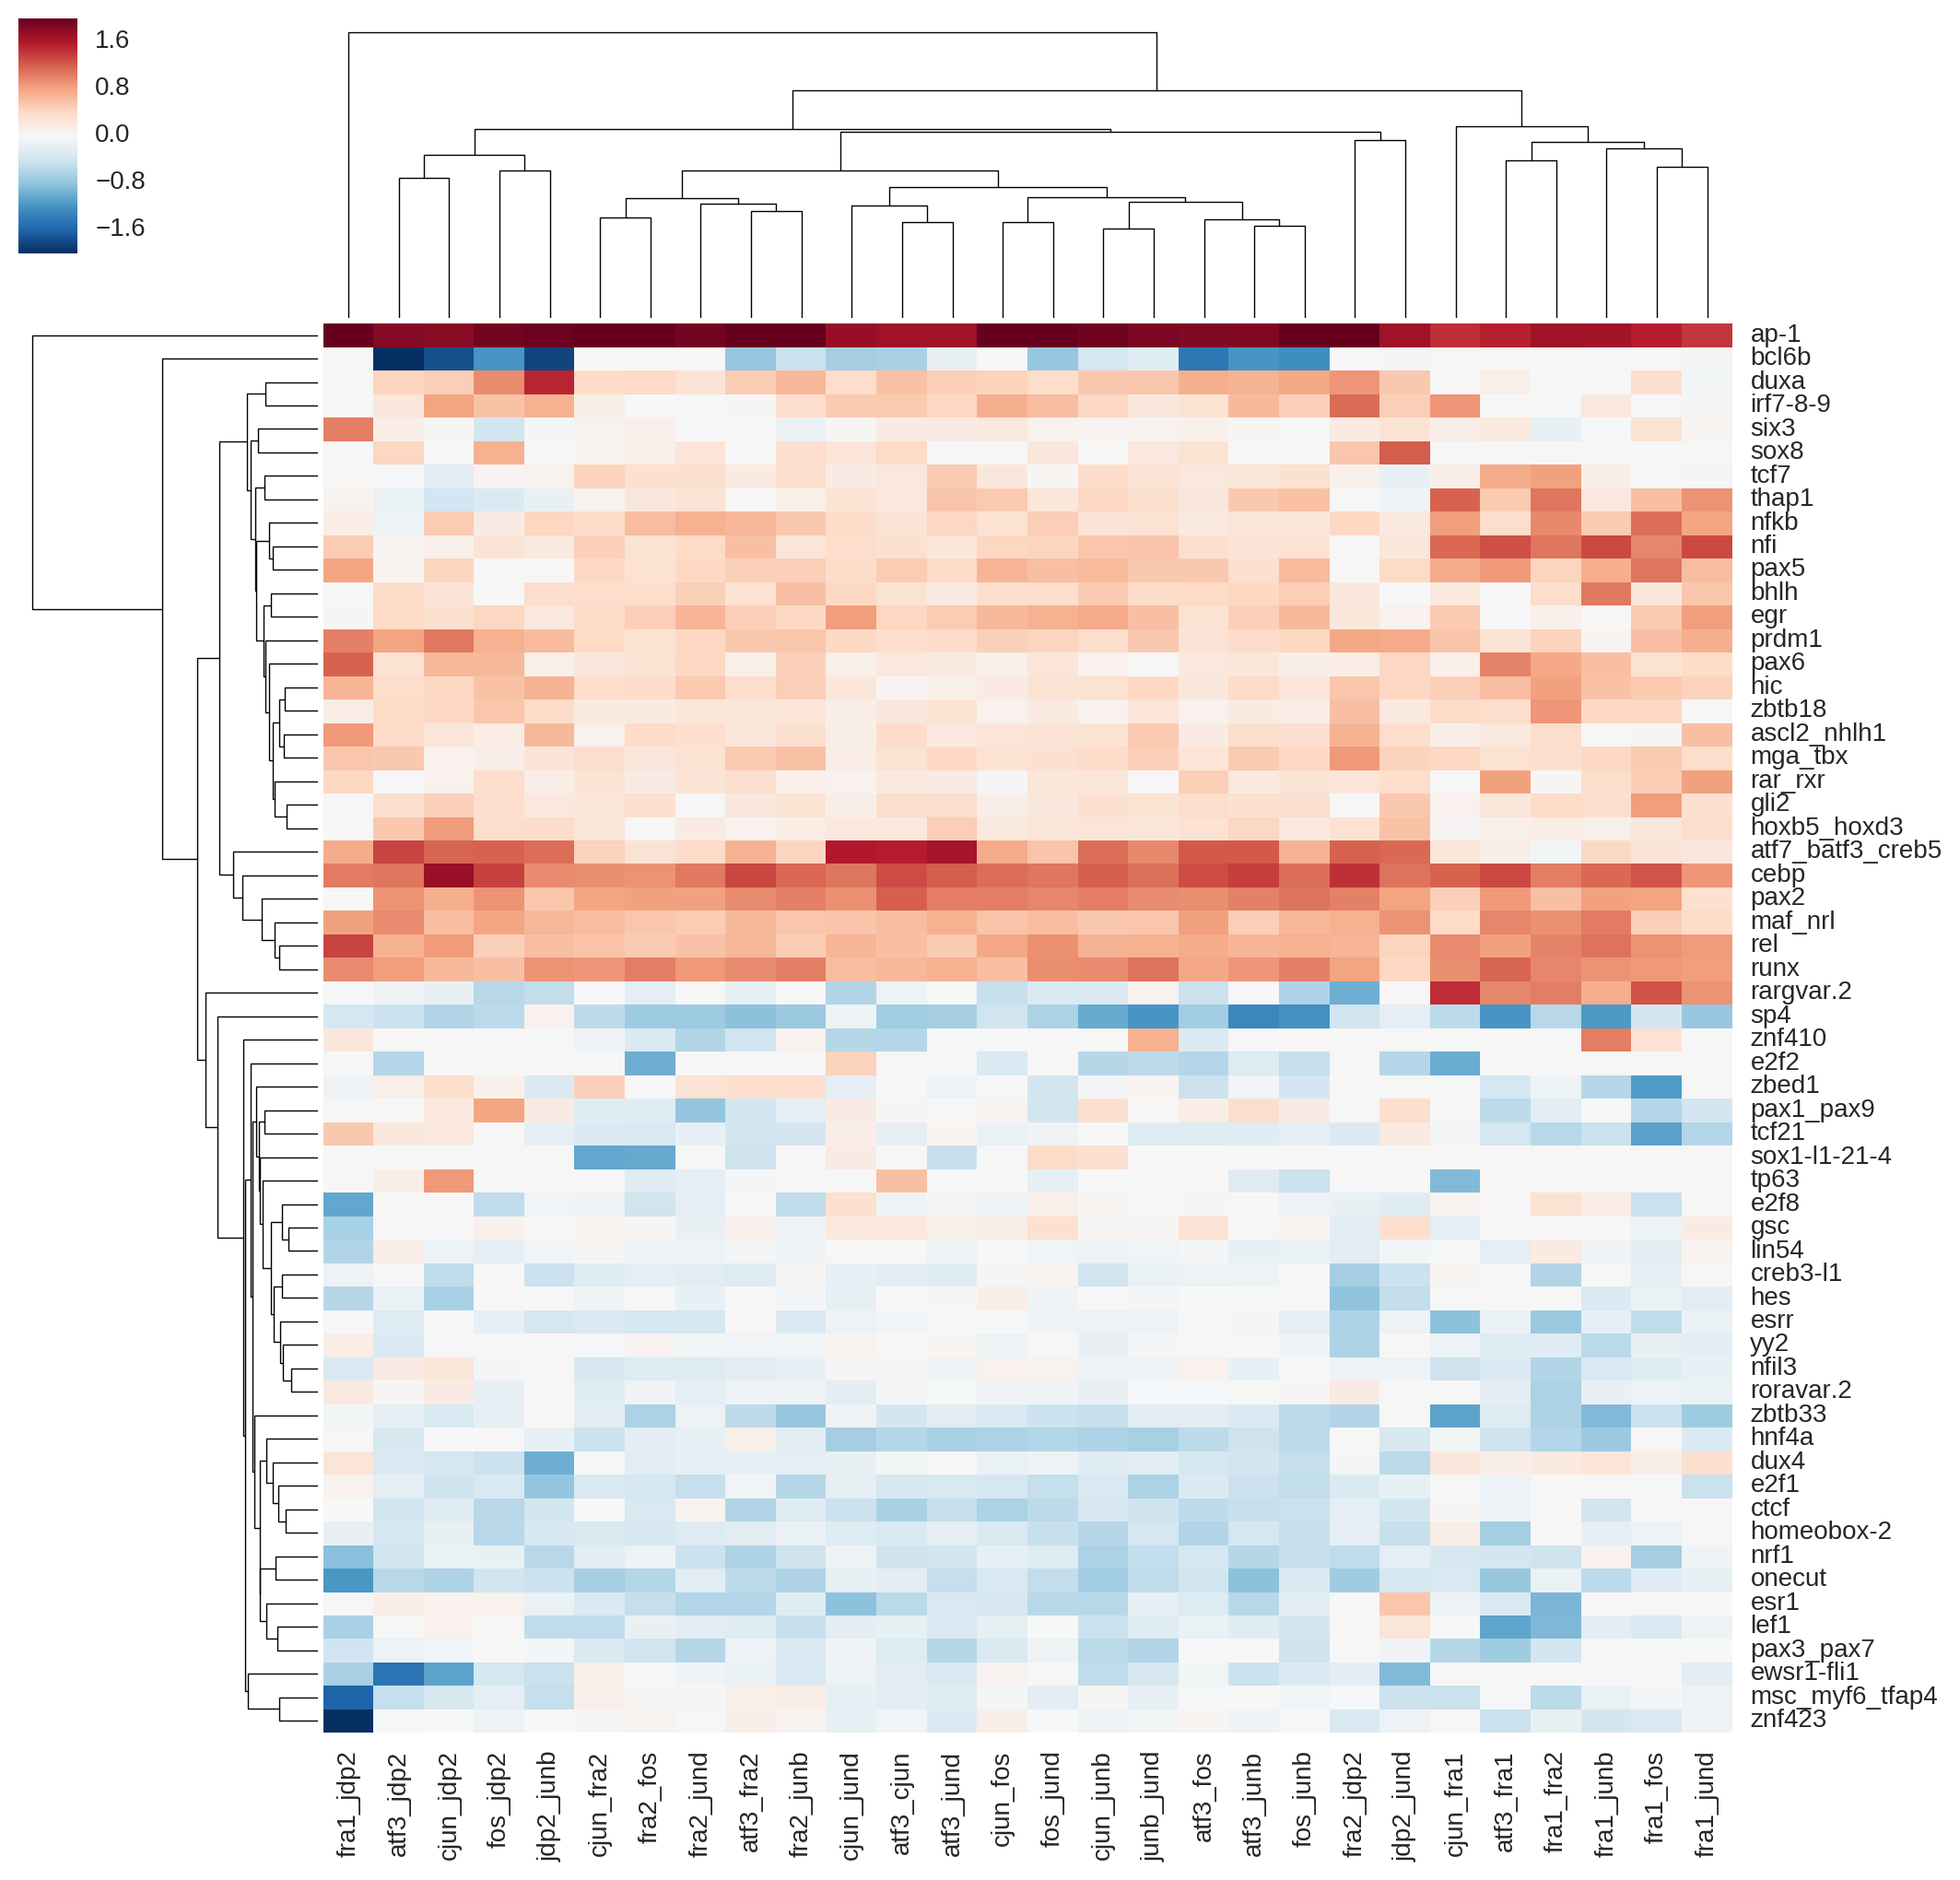

In [33]:
### plot coefficents for both vehicle and kla
threshold = 2.0
coeff_std = np.std(coefficients_frame_all_pairs.values.flatten())
coeff_mean = np.mean(coefficients_frame_all_pairs.values.flatten())

cg = sns.clustermap(coefficients_frame_all_pairs[(coefficients_frame_all_pairs.max(axis=1) > coeff_mean + threshold* coeff_std) |
                                       (coefficients_frame_all_pairs.min(axis=1) < coeff_mean - threshold* coeff_std)
                                      ],
                   vmax=-2,
                   vmin=2,
                   center = 0.0,
#                    annot=True,annot_kws={"size": 4},
                   figsize=(12,12),
                   xticklabels=[x.replace('c57bl6_','') for x in coefficients_frame_all_pairs.columns.values])
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), fontsize=10, rotation=0);

plt.savefig('/home/jenhan/analysis/scratch/Figure 12 - Signficant Dimer Motifs.pdf', bbox_inches='tight')


In [13]:
### for all peaks in vehicle and KLA for top motifs
factor_coeff_dict = {}
factor_auc_dict_pairs_top = {}
# motifs = ['ap-1','cebp','rel','spi1-c']
motifs = ['ap-1']
c57bl6_indices = summary_frame[summary_frame['Factors'].str.contains('c57bl6')].index.values  
 
for factorPair in factorPairs:
    features = normed_motif_frame[normed_motif_frame.index.isin(c57bl6_indices)][motifs]

    
    labels = summary_frame[summary_frame.index.isin(c57bl6_indices)]['Factors'].str.contains(
        factorPair[0] + '_kla') & summary_frame['Factors'].str.contains(factorPair[1]+'_kla')

    training_features, test_features, training_labels, test_labels = get_GC_matched_split(
        features, labels, test_size = 0.5, tolerance = 0.01)
    
    #  Run classifier
    lr_classifier = sklearn.linear_model.LogisticRegression(penalty='l1')
    
    lr_classifier.fit(training_features, training_labels)
    # retreive probabilities for each classifier
    probas_lr = lr_classifier.predict_proba(test_features)
    # retrieve predictions for each classifier
    
    fpr, tpr, thresholds_roc_lr = sklearn.metrics.roc_curve(test_labels, probas_lr[:, 1])
    roc_auc = auc(fpr, tpr)
    factor_auc_dict_pairs_top['_'.join(factorPair).replace('c57bl6_','')]= roc_auc
    coefficients = lr_classifier.coef_
    
    factor_coeff_dict['_'.join(factorPair)] = coefficients.flatten()
    print(factorPair, roc_auc)


coefficients_frame_all_pairs_top = pd.DataFrame(factor_coeff_dict)
coefficients_frame_all_pairs_top.index = motifs

total: 81822 filtered: 67008 true gc: 0.47512 false gc: 0.48512 difference: 0.01
('c57bl6_atf3', 'c57bl6_cjun') 0.720271275884
total: 81822 filtered: 81822 true gc: 0.49653 false gc: 0.49938 difference: 0.00286
('c57bl6_atf3', 'c57bl6_fra1') 0.726187453863
total: 81822 filtered: 79121 true gc: 0.48767 false gc: 0.49767 difference: 0.01
('c57bl6_atf3', 'c57bl6_fra2') 0.753204739507
total: 81822 filtered: 68184 true gc: 0.47639 false gc: 0.48639 difference: 0.01
('c57bl6_atf3', 'c57bl6_fos') 0.742149773637
total: 81822 filtered: 68384 true gc: 0.47556 false gc: 0.48556 difference: 0.00999
('c57bl6_atf3', 'c57bl6_jdp2') 0.746864271969
total: 81822 filtered: 74509 true gc: 0.48308 false gc: 0.49308 difference: 0.01
('c57bl6_atf3', 'c57bl6_junb') 0.743805868795
total: 81822 filtered: 66122 true gc: 0.47396 false gc: 0.48396 difference: 0.01
('c57bl6_atf3', 'c57bl6_jund') 0.716070068535
total: 81822 filtered: 81822 true gc: 0.5049 false gc: 0.49918 difference: 0.00572
('c57bl6_cjun', 'c57bl6

In [14]:
### for all peaks in vehicle and KLA using significant motifs

threshold  = 2.0
factor_motifs_dict = {}
significant_motifs = set()
# std = np.std(coefficients_frame_all_pairs.values)
# mean = np.mean(coefficients_frame_all_pairs.values)

for factor in coefficients_frame_all_pairs.columns.values:
    weights = coefficients_frame_all_pairs[factor]
    std = np.std(weights)
    mean = np.mean(weights)
    positive_hits = list(weights[weights >= mean + threshold*std].index.values)
    negative_hits = list(weights[weights <= mean - threshold*std].index.values)
    motif_hits = negative_hits + positive_hits
    for m in motif_hits:
        significant_motifs.add(m)
    print(factor, mean-threshold*std, mean+threshold*std)

    factor_motifs_dict[factor] = motif_hits
significant_motifs = sorted(significant_motifs)
    
factor_coeff_dict = {}
factor_auc_dict_all_pairs_best = {}
c57bl6_indices = summary_frame[summary_frame['Factors'].str.contains('c57bl6')].index.values

for factorPair in factorPairs:
    features = normed_motif_frame[normed_motif_frame.index.isin(c57bl6_indices)][significant_motifs]
    labels = summary_frame[summary_frame.index.isin(c57bl6_indices)]['Factors'].str.contains(
        factorPair[0] + '_kla') & summary_frame['Factors'].str.contains(factorPair[1] +'_kla')

    training_features, test_features, training_labels, test_labels = get_GC_matched_split(
        features, labels, test_size = 0.5, tolerance = 0.01)
    
    #  Run classifier
    lr_classifier = sklearn.linear_model.LogisticRegression(penalty='l1')
    
    lr_classifier.fit(training_features, training_labels)
    # retreive probabilities for each classifier
    probas_lr = lr_classifier.predict_proba(test_features)
    # retrieve predictions for each classifier
    
    fpr, tpr, thresholds_roc_lr = sklearn.metrics.roc_curve(test_labels, probas_lr[:, 1])
    roc_auc = auc(fpr, tpr)
    factor_auc_dict_all_pairs_best['_'.join(factorPair).replace('c57bl6_','')]= roc_auc
    coefficients = lr_classifier.coef_
    
    factor_coeff_dict['_'.join(factorPair)] = coefficients.flatten()
    print(factorPair, roc_auc)
coefficients_frame_all_pairs_best = pd.DataFrame(factor_coeff_dict)
coefficients_frame_all_pairs_best.index = significant_motifs




c57bl6_atf3_c57bl6_cjun -0.525267491329 0.720928941744
c57bl6_atf3_c57bl6_fos -0.568447181195 0.748322031292
c57bl6_atf3_c57bl6_fra1 -0.646591866187 0.845371088114
c57bl6_atf3_c57bl6_fra2 -0.563642241017 0.730424339664
c57bl6_atf3_c57bl6_jdp2 -0.654174289517 0.808022114899
c57bl6_atf3_c57bl6_junb -0.611952802198 0.795610371737
c57bl6_atf3_c57bl6_jund -0.512748248213 0.709570043398
c57bl6_cjun_c57bl6_fos -0.478269239044 0.694412569789
c57bl6_cjun_c57bl6_fra1 -0.595901803106 0.806048194721
c57bl6_cjun_c57bl6_fra2 -0.48758718731 0.672835897709
c57bl6_cjun_c57bl6_jdp2 -0.633943114483 0.821550950521
c57bl6_cjun_c57bl6_junb -0.597105796257 0.782349112732
c57bl6_cjun_c57bl6_jund -0.479313860132 0.696301795274
c57bl6_fos_c57bl6_jdp2 -0.579060691409 0.773250121638
c57bl6_fos_c57bl6_junb -0.612979126777 0.77110402033
c57bl6_fos_c57bl6_jund -0.530196095437 0.736448856991
c57bl6_fra1_c57bl6_fos -0.622772805597 0.842526331578
c57bl6_fra1_c57bl6_fra2 -0.658122952326 0.842406527936
c57bl6_fra1_c57bl6

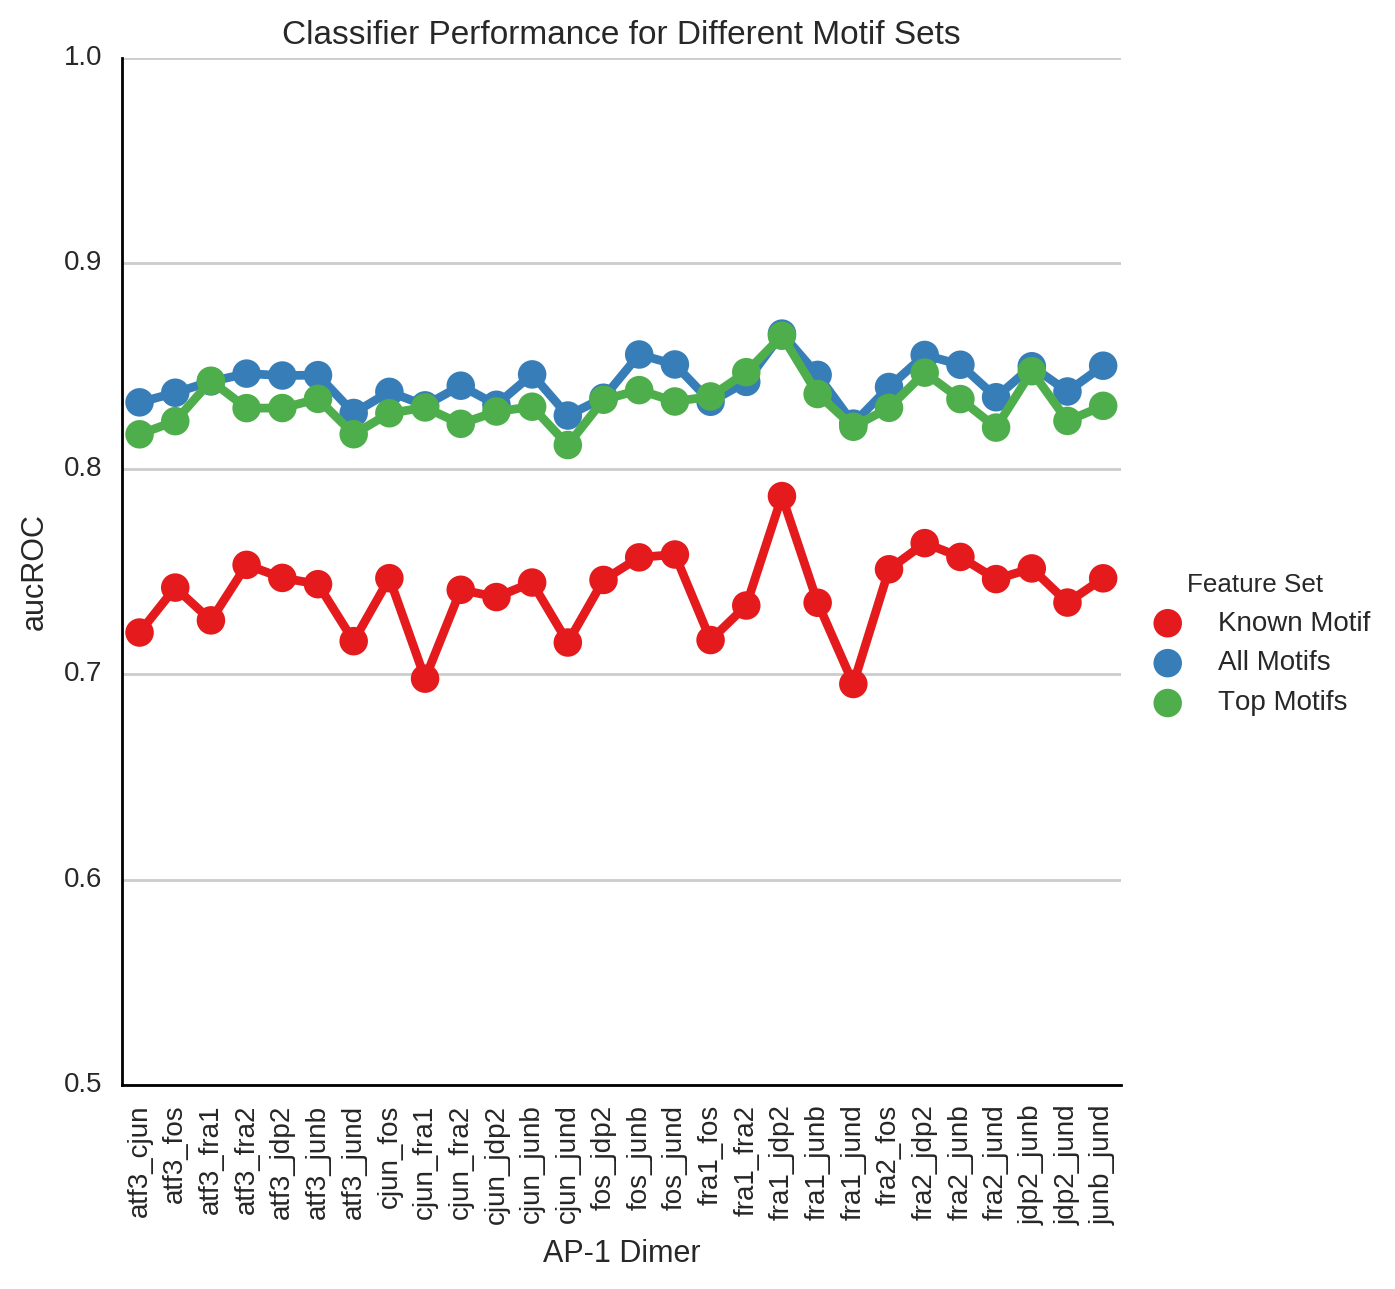

In [22]:
factors = []
aucs = []
features = []
for factor in sorted(factor_auc_dict_pairs.keys()):
#     if factor.split('_')[0] in ap1_members and factor.split('_')[1] in ap1_members:
    if True:
        factors = factors + 3 * [factor]
        features = features + ['Known Motif', 'All Motifs', 'Top Motifs']
        aucs.append(factor_auc_dict_pairs_top[factor])
        aucs.append(factor_auc_dict_pairs[factor])
        aucs.append(factor_auc_dict_all_pairs_best[factor])
with sns.axes_style('whitegrid', {'axes.edgecolor': 'black'}):
    plottingFrame = sns.factorplot(data = pd.DataFrame({'Factor':factors,
                                                         'AUC':aucs,
                                                         'Feature Set':features}),
                                x='Factor',
                                y='AUC',
                                hue='Feature Set',
                                palette='Set1',
                                size=6)
    sns.despine()
    plt.xticks(rotation=90)
    plt.ylabel('aucROC')
    plt.xlabel('AP-1 Dimer')
    plt.ylim(0.5,1)
    plt.title('Classifier Performance for Different Motif Sets')
    plt.savefig('/home/jenhan/analysis/scratch/Figure 11 - Classifier Performance for Dimers.pdf', bbox_inches='tight')

In [ ]:
### for all peaks in vehicle for all motifs
factor_coeff_dict = {}
factor_auc_dict_pairs = {}
c57bl6_indices = summary_frame[summary_frame['Factors'].str.contains('c57bl6')].index.values  
 
for factorPair in factorPairs:
    features = normed_motif_frame[normed_motif_frame.index.isin(c57bl6_indices)]
    labels = summary_frame[summary_frame.index.isin(c57bl6_indices)]['Factors'].str.contains(
        factorPair[0] + '_veh') & summary_frame['Factors'].str.contains(factorPair[1] + '_veh')

    training_features, test_features, training_labels, test_labels = get_GC_matched_split(
        features, labels, test_size = 0.5, tolerance = 0.01)
    
    #  Run classifier
    lr_classifier = sklearn.linear_model.LogisticRegression(penalty='l1')
    
    lr_classifier.fit(training_features, training_labels)
    # retreive probabilities for each classifier
    probas_lr = lr_classifier.predict_proba(test_features)
    # retrieve predictions for each classifier
    
    fpr, tpr, thresholds_roc_lr = sklearn.metrics.roc_curve(test_labels, probas_lr[:, 1])
    roc_auc = auc(fpr, tpr)
    factor_auc_dict_pairs['_'.join(factorPair).replace('c57bl6_','')]= roc_auc
    coefficients = lr_classifier.coef_
    
    factor_coeff_dict['_'.join(factorPair)] = coefficients.flatten()
    print(factorPair, roc_auc)
coefficients_frame_veh_pairs = pd.DataFrame(factor_coeff_dict)
coefficients_frame_veh_pairs.index = motif_score_frame.columns.values[3:]

In [ ]:
### for all peaks in KLA for all motifs
factor_coeff_dict = {}
factor_auc_dict_pairs = {}
c57bl6_indices = summary_frame[summary_frame['Factors'].str.contains('c57bl6')].index.values  
 
for factorPair in factorPairs:
    features = normed_motif_frame[normed_motif_frame.index.isin(c57bl6_indices)]
    labels = summary_frame[summary_frame.index.isin(c57bl6_indices)]['Factors'].str.contains(
        factorPair[0] + '_kla') & summary_frame['Factors'].str.contains(factorPair[1] + '_kla')

    training_features, test_features, training_labels, test_labels = get_GC_matched_split(
        features, labels, test_size = 0.5, tolerance = 0.01)
    
    #  Run classifier
    lr_classifier = sklearn.linear_model.LogisticRegression(penalty='l1')
    
    lr_classifier.fit(training_features, training_labels)
    # retreive probabilities for each classifier
    probas_lr = lr_classifier.predict_proba(test_features)
    # retrieve predictions for each classifier
    
    fpr, tpr, thresholds_roc_lr = sklearn.metrics.roc_curve(test_labels, probas_lr[:, 1])
    roc_auc = auc(fpr, tpr)
    factor_auc_dict_pairs['_'.join(factorPair).replace('c57bl6_','')]= roc_auc
    coefficients = lr_classifier.coef_
    
    factor_coeff_dict['_'.join(factorPair)] = coefficients.flatten()
    print(factorPair, roc_auc)
coefficients_frame_kla_pairs = pd.DataFrame(factor_coeff_dict)
coefficients_frame_kla_pairs.index = motif_score_frame.columns.values[3:]

## Visualization of Overlaps

In [ ]:
import networkx as nx
current_palette = sns.color_palette()


In [ ]:
### create network representation for VEH ###
cols = [x for x in bool_frame.columns if 'veh' in x]
veh_frame = bool_frame[cols]
network = nx.Graph()
for g in cols:
    factor = g.split('_')[0]
    network.add_node(factor, factor=factor)
#     network.add_node(g, environment=environmentDict[g], expression_veh=expressionDict_veh[g], expression_kla = expressionDict_kla[g])

for i in range(len(cols)-1):
    for j in range(i+1, len(cols)):
        factor1 = cols[i].split('_')[0]
        factor2 = cols[j].split('_')[0]
        current_frame = bool_frame[[cols[i], cols[j]]]
        shared_motifs = current_frame[current_frame.sum(axis=1) == 2].index.values
        num_shared_motifs = float(len(shared_motifs)) + 1
        network.add_edge(factor1, factor2, sharedMotifs=num_shared_motifs)
# nx.draw_circular(network, edges=edges, width=weights)
edgewidth=[]
for (u,v,d) in network.edges(data=True):
    edgewidth.append(network.get_edge_data(u,v)['sharedMotifs'])
edgewidth = np.array(edgewidth)/15
  
nx.draw_circular(network, 
                node_size=2000, 
                node_color=current_palette[0],
                width=edgewidth,
                )

plt.gca().set_aspect('equal')
nx.write_graphml(network,'veh_graphml.xml')


In [ ]:
### create network representation for KLA ###
cols = [x for x in bool_frame.columns if 'kla' in x]
veh_frame = bool_frame[cols]
network = nx.Graph()
for g in cols:
    factor = g.split('_')[0]
    network.add_node(factor, factor=factor)
#     network.add_node(g, environment=environmentDict[g], expression_veh=expressionDict_veh[g], expression_kla = expressionDict_kla[g])

for i in range(len(cols)-1):
    for j in range(i+1, len(cols)):
        factor1 = cols[i].split('_')[0]
        factor2 = cols[j].split('_')[0]
        current_frame = bool_frame[[cols[i], cols[j]]]
        shared_motifs = current_frame[current_frame.sum(axis=1) == 2].index.values
        num_shared_motifs = float(len(shared_motifs)) + 1
        network.add_edge(factor1, factor2, sharedMotifs=num_shared_motifs)
# nx.draw_circular(network, edges=edges, width=weights)
edgewidth=[]
for (u,v,d) in network.edges(data=True):
    edgewidth.append(network.get_edge_data(u,v)['sharedMotifs'])
edgewidth = np.array(edgewidth)/25
  
nx.draw_circular(network, 
                node_size=2000, 
                node_color=current_palette[1],
                width=edgewidth,
                )

plt.gca().set_aspect('equal')
nx.write_graphml(network,'kla_graphml.xml')



In [ ]:
### plot how significant motifs overlap with one another

cols = [x for x in bool_motif_frame.columns if 'veh' in x]
matrix = np.zeros((len(cols), len(cols)))

for i in range(len(cols)-1):
    for j in range(i+1, len(cols)):
        factor1 = cols[i].split('_')[0]
        factor2 = cols[j].split('_')[0]
        current_frame = bool_motif_frame[[cols[i], cols[j]]]
        shared_motifs = current_frame[current_frame.sum(axis=1) == 2].index.values
        num_shared_motifs = float(len(shared_motifs))
        matrix[i][j] = num_shared_motifs
        matrix[j][i] = num_shared_motifs
mask = np.zeros_like(matrix)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
#     sns.heatmap(matrix, xticklabels = cols, yticklabels=cols, cmap='Blues', mask=mask, vmax=100)
    sns.heatmap(matrix, xticklabels = cols, yticklabels=cols, cmap='Blues', vmax=100)

    plt.xticks(rotation=90);
    plt.title('Overlap of Significant Motifs for Vehicle Peaks')
    plt.show()
    
# for KLA
cols = [x for x in bool_motif_frame.columns if 'kla' in x]
matrix = np.zeros((len(cols), len(cols)))

for i in range(len(cols)-1):
    for j in range(i+1, len(cols)):
        factor1 = cols[i].split('_')[0]
        factor2 = cols[j].split('_')[0]
        current_frame = bool_motif_frame[[cols[i], cols[j]]]
        shared_motifs = current_frame[current_frame.sum(axis=1) == 2].index.values
        num_shared_motifs = float(len(shared_motifs))
        matrix[i][j] = num_shared_motifs
        matrix[j][i] = num_shared_motifs
mask = np.zeros_like(matrix)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
#     sns.heatmap(matrix, xticklabels = cols, yticklabels=cols, cmap='Blues', mask=mask, vmax=100)
    sns.heatmap(matrix, xticklabels = cols, yticklabels=cols, cmap='Blues', vmax=100)
    plt.xticks(rotation=90);
    plt.title('Overlap of Significant Motifs for KLA Peaks')

In [ ]:
### plot how significant motifs overlap with one another

cols = [x for x in bool_frame.columns if 'veh' in x]
matrix = np.zeros((len(cols), len(cols)))

for i in range(len(cols)-1):
    for j in range(i+1, len(cols)):
        factor1 = cols[i].split('_')[0]
        factor2 = cols[j].split('_')[0]
        current_frame = bool_frame[[cols[i], cols[j]]]
        shared_motifs = current_frame[current_frame.sum(axis=1) == 2].index.values
        num_shared_motifs = float(len(shared_motifs))
        matrix[i][j] = num_shared_motifs
        matrix[j][i] = num_shared_motifs

with sns.axes_style("white"):
    sns.heatmap(np.log2(matrix+1), xticklabels = cols, yticklabels=cols, cmap='Greens', square=True)
    plt.xticks(rotation=90);
    plt.title('Overlap of Significant Motifs for Vehicle Peaks')
    plt.show()
    
# for KLA
cols = [x for x in bool_frame.columns if 'kla' in x]
matrix = np.zeros((len(cols), len(cols)))

for i in range(len(cols)-1):
    for j in range(i+1, len(cols)):
        factor1 = cols[i].split('_')[0]
        factor2 = cols[j].split('_')[0]
        current_frame = bool_frame[[cols[i], cols[j]]]
        shared_motifs = current_frame[current_frame.sum(axis=1) == 2].index.values
        num_shared_motifs = float(len(shared_motifs))
        matrix[i][j] = num_shared_motifs
        matrix[j][i] = num_shared_motifs
with sns.axes_style("white"):
    sns.heatmap(np.log2(matrix+1), xticklabels = cols, yticklabels=cols, cmap='Greens', square = True)
    plt.xticks(rotation=90);
    plt.title('Overlap of Significant Motifs for KLA Peaks')

## Strains Stuff

In [ ]:
### read in strains SNPs ###

# filter away SNPS that didn't pass all qc metrics
!grep PASS ./strains_snps/BALB_cJ.mgp.v5.snps.dbSNP142.vcf  > ./strains_snps/balbcj_passed_snps.txt
!grep PASS ./strains_snps/BALB_cJ.mgp.v5.snps.dbSNP142.vcf  > ./strains_snps/nod_passed_snps.txt

In [34]:
chrom_size_dict = {
    '1':196,
'2':182,
'3':160,
'4':157,
'5':152,
'6':150,
'7':145,
'8':129,
'9':125,
'10':131,
'11':122,
'12':120,
'13':120,
'14':125,
'15':104,
'16':91,
'17':95,
'18':91,
'19':61,
'X':10,
'Y':10,
'MT':10,
}

In [35]:
balbcj_chr_snp_dict = {}
for chr in [str(x) for x in range(1,20)] + ['X','Y','MT']:
#     balb_chr_snp_dict[chr] = np.array([False] * (chrom_size_dict[chr]*100000))
    balbcj_chr_snp_dict[chr] = np.array([False] * (200*1000000))

print('reading balbcj snps')
with open('./strains_snps/balbcj_passed_snps.txt') as f:
    data = f.readlines()
for line in data:

    tokens = line.split('\t')
    chr = tokens[0]
    position = int(tokens[1])
    
    balbcj_chr_snp_dict[chr][position] = True

    
motif_balbcj_snp_frame = motif_start_frame[['ID', 'Factors', 'chr']]
motif_balbcj_snp_frame.index = motif_balbcj_snp_frame['ID'].values
for motif in motif_start_frame.columns[3:]:
    print(motif)
    starts = motif_start_frame[motif]
    ends = motif_end_frame[motif]
    chromosomes = motif_balbcj_snp_frame['chr']
    num_snp_list =  []
    for i in range(len(starts)):
        current_start = starts[i]
        current_end = ends[i]
        current_chr = chromosomes[i].replace('chr','')
        if current_start * current_end > 0:
            num_snp_list.append(np.sum(balbcj_chr_snp_dict[current_chr][current_start:current_end+1]))
        else:
            num_snp_list.append(0)
    motif_balbcj_snp_frame[motif] = num_snp_list

motif_balbcj_snp_frame.to_pickle('./motif_balbcj_snp_frame.pickle')



reading balbcj snps
alx1_alx4_arx
ap-1
ar_nr3c1_nr3c2
arid3a
arid3b
arid5a
arnt_mycn
arntl_mitf
ascl2_nhlh1
atf7_batf3_creb5
bcl6
bcl6b
bhlh
bhlha15
bhlhe23
cdx
cebp
cenpb
creb3-l1
crem
ctcf
cux
dbp_hlf_tef
dmbx1
dmrt3
dux
dux4
duxa
e2f1
e2f2
e2f4_e2f6
e2f7
e2f8
ebf1
ebox
egr
elf
elk_etv
esr1
esr2
esrr
ewsr1-fli1
figla_id4_snai2_tcf3_tcf4
fox
gata
gcm
gfi1
gfi1b
gli2
glis
gmeb2
grhl1
gsc
hes
hic
hinfp
hltf
hnf1
hnf4a
hnf4g
homeobox-1
homeobox-2
homeobox-3
homeobox-4
homeobox-5
hoxa11
hoxa5
hoxa9
hoxb5_hoxd3
hoxc13
hoxc9
hoxd8
hsf
id2_mlxip
insm1
irf1
irf2
irf7-8-9
isl2_nkx3-1_nkx3-2
klf
lef1
lhx3
lin54
maf_nrl
mafg
mecom
mef2a-b-d
mef2c
meis
mga_tbx
msc_myf6_tfap4
mtf1
myb
mybl1
mybl2
myc
myog_tcf12
mzf1
mzf1var.2
nfat
nfi
nfil3
nfkb
nfya
nfyb
nkx2-3_nkx2-8
nkx2-5
nkx2-5var.2
nr2_rxr
nr2e1
nr2e3
nr2f1
nr4a2
nr5a2
nrf1
onecut
pax1_pax9
pax2
pax3_pax7
pax5
pax6
pbx1
phox2_prop
pknox_tgif
plag1
pou1f1
pou2-3-5
pou4
pou6f2
pparg
pparg_rxra
prdm1
prox1
rar
rar_rxr
rargvar.2
rel
rest
rfx
rho

In [37]:
nod_chr_snp_dict = {}
for chr in [str(x) for x in range(1,20)] + ['X','Y','MT']:

    nod_chr_snp_dict[chr] = np.array([False] * (200*1000000))

print('reading nod snps')
with open('./strains_snps/nod_passed_snps.txt') as f:
    data = f.readlines()
for line in data:
    tokens = line.split('\t')
    chr = tokens[0]
    position = int(tokens[1])
    
    nod_chr_snp_dict[chr][position] = True
    
motif_nod_snp_frame = motif_start_frame[['ID', 'Factors', 'chr']]
motif_nod_snp_frame.index = motif_balbcj_snp_frame['ID'].values
for motif in motif_start_frame.columns[3:]:
    print(motif)
    starts = motif_start_frame[motif]
    ends = motif_end_frame[motif]
    chromosomes = motif_nod_snp_frame['chr']
    num_snp_list =  []
    for i in range(len(starts)):
        current_start = starts[i]
        current_end = ends[i]
        current_chr = chromosomes[i].replace('chr','')
        if current_start * current_end > 0:
            num_snp_list.append(np.sum(nod_chr_snp_dict[current_chr][current_start:current_end+1]))
        else:
            num_snp_list.append(0)
    motif_nod_snp_frame[motif] = num_snp_list

reading nod snps
alx1_alx4_arx
ap-1
ar_nr3c1_nr3c2
arid3a
arid3b
arid5a
arnt_mycn
arntl_mitf
ascl2_nhlh1
atf7_batf3_creb5
bcl6
bcl6b
bhlh
bhlha15
bhlhe23
cdx
cebp
cenpb
creb3-l1
crem
ctcf
cux
dbp_hlf_tef
dmbx1
dmrt3
dux
dux4
duxa
e2f1
e2f2
e2f4_e2f6
e2f7
e2f8
ebf1
ebox
egr
elf
elk_etv
esr1
esr2
esrr
ewsr1-fli1
figla_id4_snai2_tcf3_tcf4
fox
gata
gcm
gfi1
gfi1b
gli2
glis
gmeb2
grhl1
gsc
hes
hic
hinfp
hltf
hnf1
hnf4a
hnf4g
homeobox-1
homeobox-2
homeobox-3
homeobox-4
homeobox-5
hoxa11
hoxa5
hoxa9
hoxb5_hoxd3
hoxc13
hoxc9
hoxd8
hsf
id2_mlxip
insm1
irf1
irf2
irf7-8-9
isl2_nkx3-1_nkx3-2
klf
lef1
lhx3
lin54
maf_nrl
mafg
mecom
mef2a-b-d
mef2c
meis
mga_tbx
msc_myf6_tfap4
mtf1
myb
mybl1
mybl2
myc
myog_tcf12
mzf1
mzf1var.2
nfat
nfi
nfil3
nfkb
nfya
nfyb
nkx2-3_nkx2-8
nkx2-5
nkx2-5var.2
nr2_rxr
nr2e1
nr2e3
nr2f1
nr4a2
nr5a2
nrf1
onecut
pax1_pax9
pax2
pax3_pax7
pax5
pax6
pbx1
phox2_prop
pknox_tgif
plag1
pou1f1
pou2-3-5
pou4
pou6f2
pparg
pparg_rxra
prdm1
prox1
rar
rar_rxr
rargvar.2
rel
rest
rfx
rhox11

In [38]:
motif_nod_snp_frame.to_pickle('./motif_nod_snp_frame.pickle')

In [ ]:
motif_1 = 'spi1-c'
motif_2 = 'ap-1'
factor_1 = 'c57bl6_pu1_veh'
factor_2 = 'c57bl6_cjun_veh'

motif_state_1s = []
motif_state_2s = []
peak_state_1s = []
peak_state_2s = []
counts = []
for peak_state_1 in [True, False]:
    for peak_state_2 in [True, False]:
        for motif_state_1 in [True, False]:
            for motif_state_2 in [True, False]:
#                 if np.sum([peak_state_1, peak_state_2]) > 0:
                if True:
                    motif_state_1s.append(motif_state_1)
                    motif_state_2s.append(motif_state_2)
                    peak_state_1s.append(peak_state_1)
                    peak_state_2s.append(peak_state_2)
                    peak_indices = summary_frame[(summary_frame['Factors'].str.contains(factor_1) == peak_state_1) &
                                                 (summary_frame['Factors'].str.contains(factor_2) == peak_state_2)].index.values
                    current_motif_frame = motif_score_frame[motif_score_frame.index.isin(peak_indices)]
                    motif_indices = current_motif_frame[((current_motif_frame[motif_1] > 0) == motif_state_1) &
                                                        ((current_motif_frame[motif_2] > 0) == motif_state_2)].index.values                   
                    count = len(motif_indices)
                    counts.append(count)
current_count_frame = pd.DataFrame({factor_1 +' binding':peak_state_1s,
                                   factor_2 +' binding':peak_state_2s,
                                   motif_1 + ' motif':motif_state_1s,
                                   motif_2 + ' motif':motif_state_2s,
                                   'num peaks': counts})               
current_count_frame = current_count_frame[[factor_1 +' binding',
                                   factor_2 +' binding',
                                   motif_1 + ' motif',
                                   motif_2 + ' motif',
                                   'num peaks']]